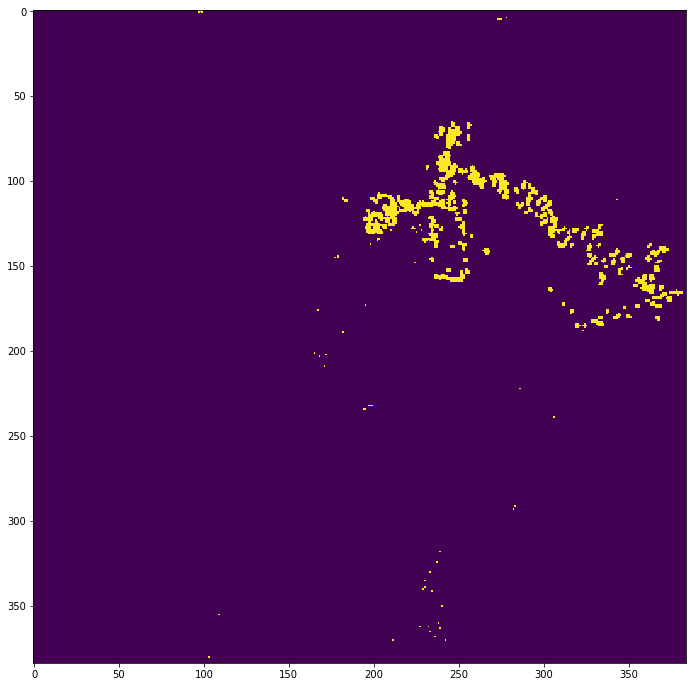

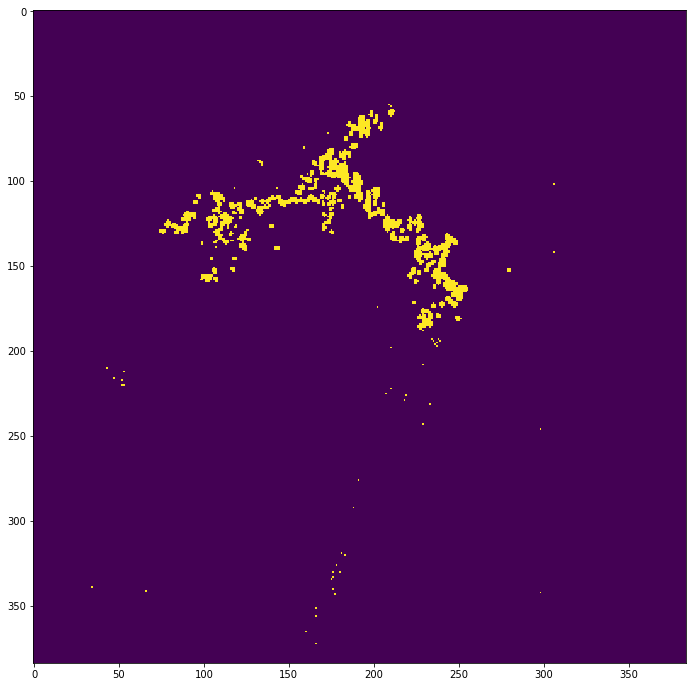

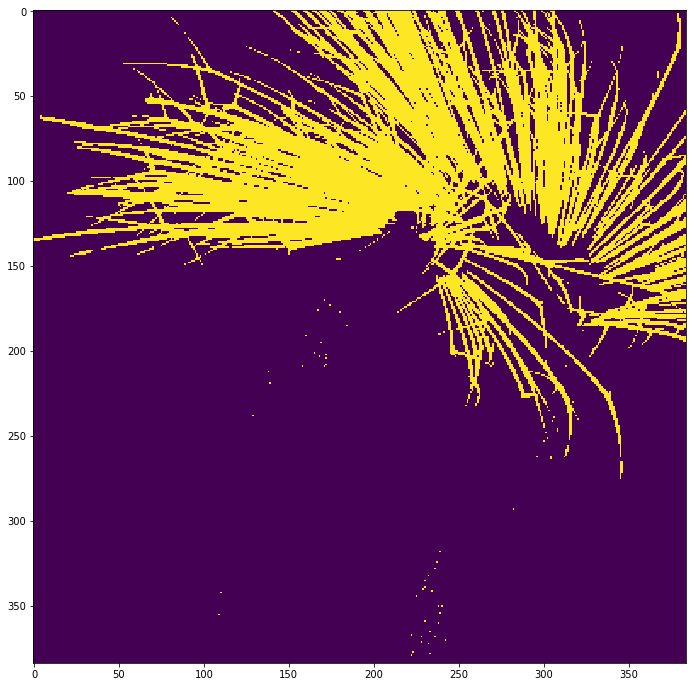

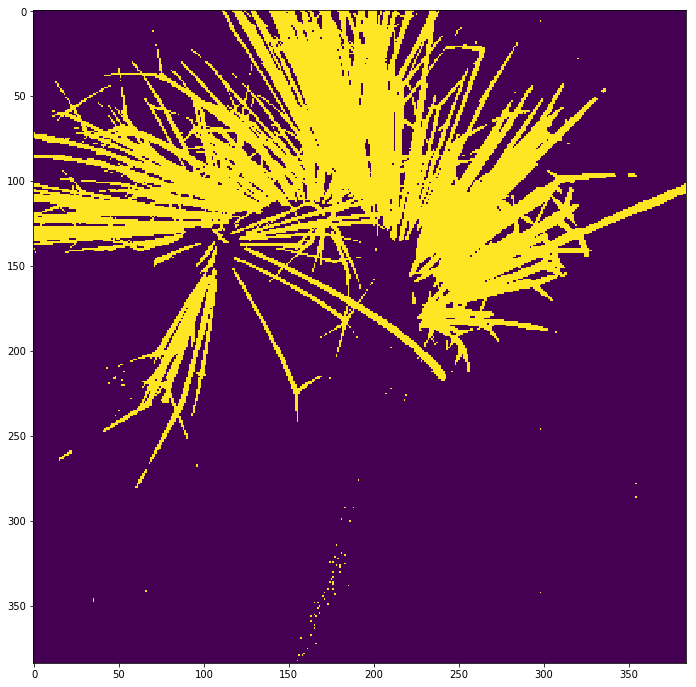

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picL))
picR = 18158
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picR))
FrameLSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picL,picL))
FrameRSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picR,picR))
picR = 18158
v0L = FrameL[0]
v0R = FrameR[0]
plt.figure()
plt.figure(figsize=(12,12))
plt.imshow(v0L)
plt.show()
plt.figure()
plt.figure(figsize=(12,12))
plt.imshow(v0R)
plt.show()
plt.figure()
plt.figure(figsize=(12,12))
plt.imshow(FrameLSum[0])
plt.show()
plt.figure()
plt.figure(figsize=(12,12))
plt.imshow(FrameRSum[0])
plt.show()

In [46]:
###################################
#Locate Features; single frame test
###################################
#plt.figure()
#plt.imshow(FrameL[100])
#plt.show()
print(np.max(FrameL[100]))
f = tp.locate(FrameL[100], 3, minmass=200) 
# 7 means the pixel of the size of the feature. It has to be odd. 
#minmass can be determined by the mass distribution below. 
#Since we already apply data-cleaning, it is not necessary to apply minmass here.
f.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,249.952510,1.094980,442.962778,0.852007,0.375701,121.409065,1275.0,0.000761,100
1,173.112740,3.055242,533.118025,0.871055,0.245171,128.621485,1275.0,0.000761,100
2,188.134703,2.865297,263.253320,0.846697,0.394904,74.528337,765.0,0.001269,100
3,157.062061,4.035129,513.283870,0.860940,0.287520,132.828730,1275.0,0.000761,100
4,212.898876,5.071629,427.936904,0.850479,0.392233,118.403890,1275.0,0.000761,100


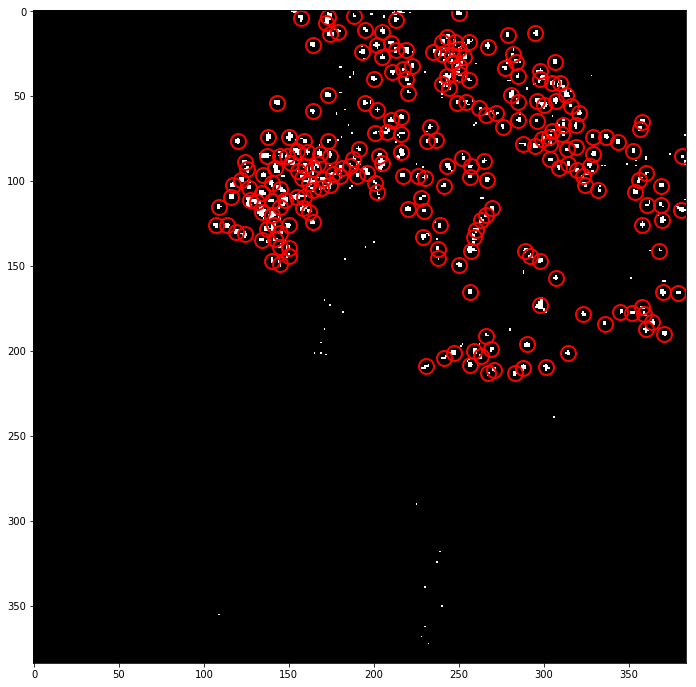

In [47]:
#Show points located. It will be better to have more points rather than missing points.
plt.figure()  # make a new figure
plt.figure(figsize=(12,12))
tp.annotate(f, FrameL[100]);

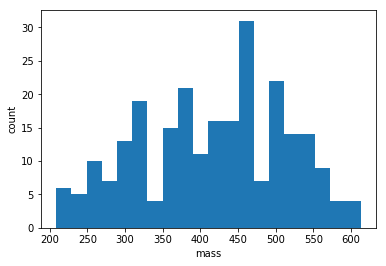

In [48]:
#Show 'mass' distribution
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');
plt.figure(figsize=(12,12))
#plt.imshow(FrameL[100])
plt.show()

In [49]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
fL = tp.batch(FrameL, 3, minmass=200);
tL = tp.link_df(fL, 5, memory=3)
#tL.head()

Frame 369: 11 trajectories present


In [51]:
tL1 = tp.filter_stubs(tL, 50)
print('Before:', tL['particle'].nunique())
print('After:', tL1['particle'].nunique())

('Before:', 1341)
('After:', 279)


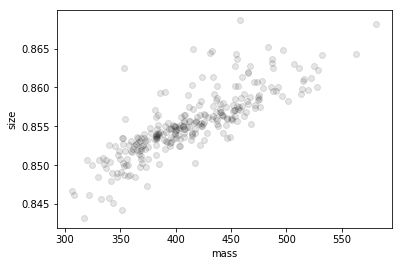

In [52]:
plt.figure()
tp.mass_size(tL1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

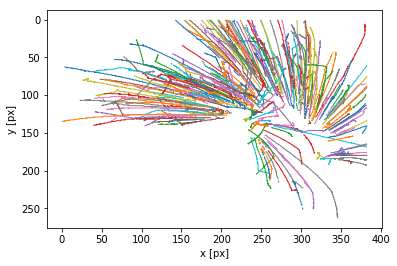

In [62]:
plt.figure()
tp.plot_traj(tL1);
tL1.to_csv('FrameL_white.csv')

In [55]:
for ip1 in tL1['particle'].unique():
    index = int(ip1)
    t1 = tL1[tL1['particle']==index]
    plt.figure(figsize=[12,12])
    plt.imshow(FrameLSum[0])
    for ip in range(len(t1)):
        x = t1['x'].iloc[ip]
        y = t1['y'].iloc[ip]
        plt.scatter(x,y,s=0.3,c='g')
    plt.savefig('frameL_white_{}.tif'.format(index))

4
5
6
7
8
9
12
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
47
48
50
51
52
55
56
57
58
59
61
63
64
65
66
67
68
69
70
71
72
74
75
76
78
79
80
81
82
84
86
87
89
92
94
95
97
98
103
104
105
106
108
119
121
122
123
126
127
128
129
133
134
135
136
138
143
144
147
148
149
150
151
152
153
154
155
156
158
159
162
163
164
167
168
169
170
172
174
175
179
180
181
183
186
189
190
191
193
196
197
202
203
204
207
208
209
211
213
214
216
220
222
224
225
227
228
229
230
231
232
233
234
235
236
238
239
240
241
242
243
245
246
247
248
249
250
252
254
258
259
260
262
263
265
266
267
268
269
270
272
275
276
277
278
279
280
281
282
285
287
288
295
297
298
300
301
304
305
307
309
310
311
314
317
320
321
324
325
326
327
328
330
332
333
334
335
336
338
340
341
343
344
347
348
349
350
351
352
354
357
359
361
363
368
370
377
378
379
380
383
387
388
390
392
393
394
400
401
402
409
420
423
427
428
430
431
433
442
459
463
473
479
482
491
507
510
513
543
566
586
601

In [59]:
# Left frame
fR = tp.batch(FrameR, 3, minmass=200);
tR = tp.link_df(fR, 5, memory=3)

Frame 369: 21 trajectories present


In [60]:
tR1 = tp.filter_stubs(tR, 50)
print('Before:', tR['particle'].nunique())
print('After:', tR1['particle'].nunique())

('Before:', 1570)
('After:', 312)


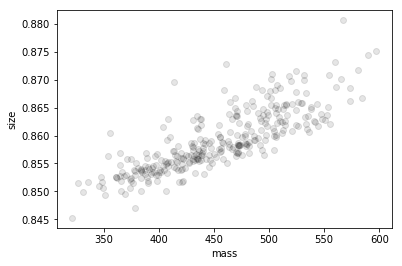

In [61]:
plt.figure()
tp.mass_size(tR1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

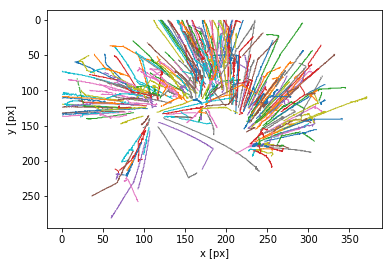

In [63]:
plt.figure()
tp.plot_traj(tR1);
tR1.to_csv('FrameR_white.csv')

In [65]:
for ip1 in tR1['particle'].unique():
    index = int(ip1)
    #print(index)
    t2 = tR1[tR1['particle']==index]
    plt.figure(figsize=[12,12])
    plt.imshow(FrameRSum[0])
    for ip in range(len(t2)):
        x = t2['x'].iloc[ip]
        y = t2['y'].iloc[ip]
        plt.scatter(x,y,s=0.3,c='g')
    plt.savefig('frameR_white_{}.tif'.format(index))

In [76]:
print(len(tR1))
plt.figure(figsize=[12,12])
plt.imshow(FrameRSum[0])
for ip in range(len(tR1)):
#for ip in range(1000,1200):
    x = tR1['x'].iloc[ip]
    y = tR1['y'].iloc[ip]
    plt.scatter(x,y,s=0.3,c='g')
plt.savefig('frameR_white.tif')

40209


In [74]:
print(len(tL1))
plt.figure(figsize=[12,12])
plt.imshow(FrameLSum[0])
for ip in range(len(tL1)):
#for ip in range(1000,2000):
    x = tL1['x'].iloc[ip]
    y = tL1['y'].iloc[ip]
    print(ip,x,y)
    plt.scatter(x,y,s=0.3,c='g')
#plt.show()
plt.savefig('frameL_white.tif')

36255
(0, 245.04347826086956, 70.977116704805496)
(1, 243.2049861495845, 67.0)
(2, 242.08227848101265, 69.995780590717303)
(3, 241.1875, 67.950000000000003)
(4, 240.1275, 66.049999999999997)
(5, 242.91717171717173, 67.973737373737379)
(6, 241.92649903288202, 65.063829787234042)
(7, 240.92612612612612, 63.888288288288287)
(8, 240.85159010600708, 62.853356890459366)
(9, 240.06730769230768, 60.910256410256409)
(10, 240.0186440677966, 59.979661016949152)
(11, 239.03338898163605, 58.861435726210352)
(12, 239.01607717041801, 57.051446945337624)
(13, 238.17247386759581, 55.857142857142854)
(14, 238.04202898550724, 54.982608695652175)
(15, 237.88595271210013, 54.023643949930459)
(16, 237.10192023633678, 52.870014771048744)
(17, 236.94281729428172, 51.967921896792191)
(18, 236.11428571428573, 50.874025974025976)
(19, 236.05374823196604, 49.864214992927863)
(20, 235.14398943196829, 47.926023778071333)
(21, 234.91280653950955, 46.123978201634877)
(22, 234.8721624850657, 46.086021505376344)
(23, 2

(207, 202.85225505443236, 20.944012441679625)
(208, 202.0, 20.0)
(209, 201.04663212435233, 19.046632124352332)
(210, 200.9453125, 18.853124999999999)
(211, 200.08513189448442, 18.0)
(212, 199.96158068057079, 17.038419319429199)
(213, 199.81818181818181, 16.818181818181817)
(214, 199.0, 16.0)
(215, 198.14598540145985, 15.055474452554744)
(216, 198.0, 14.914619883040936)
(217, 197.81805555555556, 14.0)
(218, 197.0, 13.084928229665072)
(219, 196.81805555555556, 13.0)
(220, 196.04743589743589, 12.047435897435898)
(221, 195.85225505443236, 11.944012441679627)
(222, 195.03841931942921, 10.961580680570801)
(223, 194.94401244167963, 10.852255054432348)
(224, 194.08513189448442, 10.0)
(225, 193.96153846153845, 9.0384615384615383)
(226, 193.81715893108299, 9.0)
(227, 192.96061269146608, 8.0393873085339163)
(228, 192.85267857142858, 7.9449404761904763)
(229, 192.0, 7.0)
(230, 191.94401244167963, 6.8522550544323479)
(231, 191.08492822966508, 6.0)
(232, 191.0, 5.0847457627118642)
(233, 190.91486810

(413, 233.08776266996293, 58.944375772558715)
(414, 232.95595238095237, 57.864285714285714)
(415, 232.90860927152318, 56.021192052980133)
(416, 232.02278177458032, 55.088729016786573)
(417, 231.89295392953929, 54.035230352303522)
(418, 231.90381895332391, 52.951909476661953)
(419, 230.98823529411766, 51.993464052287578)
(420, 230.93814432989691, 50.901325478645063)
(421, 229.93313953488371, 48.946220930232556)
(422, 229.9321357285429, 47.89421157684631)
(423, 229.08045977011494, 46.927203065134101)
(424, 228.9329268292683, 45.894308943089428)
(425, 228.72160356347439, 44.99554565701559)
(426, 228.01601423487546, 43.992882562277579)
(427, 227.18011257035647, 42.958724202626641)
(428, 227.04048582995952, 41.941295546558706)
(429, 226.69321533923303, 41.141592920353979)
(430, 225.19094488188978, 39.061023622047244)
(431, 225.00833333333333, 38.068333333333335)
(432, 224.06284658040664, 36.144177449168204)
(433, 223.06037151702787, 35.024767801857585)
(434, 221.9728813559322, 34.8694915254

(598, 245.95813953488371, 68.066279069767447)
(599, 245.04061470911086, 66.973655323819983)
(600, 244.19910846953937, 65.897473997028229)
(601, 243.9987244897959, 64.913265306122454)
(602, 243.05584415584417, 63.12077922077922)
(603, 242.88059701492537, 62.07587064676617)
(604, 241.96116504854368, 61.064724919093848)
(605, 241.03956043956043, 59.943956043956042)
(606, 240.95991091314031, 59.022271714922049)
(607, 240.03887688984881, 57.910367170626351)
(608, 239.82207792207791, 56.054545454545455)
(609, 238.96108108108109, 55.038918918918917)
(610, 238.04709748083243, 53.987951807228917)
(611, 237.96158068057079, 53.038419319429195)
(612, 237.0, 51.953216374269005)
(613, 236.11633663366337, 50.905940594059409)
(614, 235.95436766623206, 49.95567144719687)
(615, 235.11633663366337, 48.905940594059409)
(616, 234.82216142270863, 47.054719562243505)
(617, 233.96097046413502, 46.08122362869198)
(618, 233.09489916963227, 45.029655990510086)
(619, 232.9624060150376, 44.081632653061227)
(620, 2

(822, 267.04833512352309, 60.073039742212671)
(823, 266.96976241900649, 59.080993520518362)
(824, 266.83217753120664, 58.056865464632452)
(825, 266.0965770171149, 56.990220048899758)
(826, 265.97016574585638, 56.039779005524863)
(827, 265.92391304347825, 55.0)
(828, 265.81715893108299, 54.0)
(829, 265.04856512141282, 52.960264900662253)
(830, 264.96097046413502, 51.994725738396625)
(831, 264.91377245508983, 50.990419161676648)
(832, 264.81805359661496, 50.0)
(833, 264.03841931942918, 48.961580680570805)
(834, 263.96061269146611, 48.039387308533918)
(835, 263.81648936170211, 47.0)
(836, 263.81893004115227, 46.0)
(837, 263.03841931942918, 44.961580680570805)
(838, 262.96158068057082, 44.038419319429195)
(839, 262.81678321678322, 43.0)
(840, 262.03846153846155, 41.96153846153846)
(841, 261.96108108108109, 41.038918918918917)
(842, 261.88071065989845, 40.044416243654823)
(843, 261.81715893108299, 39.0)
(844, 261.14637904468412, 38.055469953775038)
(845, 261.0, 37.869815668202762)
(846, 260

(1036, 213.86649214659687, 74.086387434554979)
(1037, 213.04193138500636, 73.959339263024148)
(1038, 212.0995085995086, 73.003685503685503)
(1039, 211.98956975228162, 73.001303780964804)
(1040, 211.03054448871183, 72.038512616201857)
(1041, 210.02016129032259, 71.047043010752688)
(1042, 209.95538461538462, 71.07076923076923)
(1043, 209.03190013869624, 70.047156726768378)
(1044, 208.91594202898551, 70.05797101449275)
(1045, 209.04136947218259, 70.961483594864475)
(1046, 207.02000000000001, 68.099999999999994)
(1047, 207.94576719576719, 70.010582010582013)
(1048, 206.87374461979914, 68.058823529411768)
(1049, 206.03773584905662, 67.986163522012575)
(1050, 206.01453104359314, 68.033025099075303)
(1051, 205.93740458015267, 68.112977099236645)
(1052, 205.18113207547171, 68.030188679245285)
(1053, 203.91848617176129, 66.034934497816593)
(1054, 204.17877094972067, 67.02793296089385)
(1055, 202.9063400576369, 65.041786743515857)
(1056, 203.03853211009175, 66.135779816513761)
(1057, 201.8525280

(1236, 229.81818181818181, 71.181818181818187)
(1237, 229.05616224648986, 71.135725429017157)
(1238, 228.96116504854368, 70.951456310679617)
(1239, 228.19054652880354, 70.957163958641061)
(1240, 228.03404255319148, 70.018085106382983)
(1241, 228.0308370044053, 69.871145374449341)
(1242, 227.08974358974359, 67.983974358974365)
(1243, 227.10191082802547, 66.976114649681534)
(1244, 227.10207939508507, 65.994328922495271)
(1245, 227.01715686274511, 65.002450980392155)
(1246, 226.82524271844659, 64.174757281553397)
(1247, 226.81904761904761, 63.819047619047616)
(1248, 226.13181818181818, 62.868181818181817)
(1249, 225.86609071274299, 61.133909287257019)
(1250, 225.81818181818181, 60.81818181818182)
(1251, 277.89159292035396, 101.18362831858407)
(1252, 274.09018036072143, 103.98997995991984)
(1253, 273.06095238095236, 101.96190476190476)
(1254, 273.01795332136447, 100.87073608617594)
(1255, 271.9486356340289, 99.008025682182989)
(1256, 271.06686930091183, 98.019756838905778)
(1257, 270.87722

(1425, 209.02137767220901, 80.908551068883611)
(1426, 208.09079903147699, 80.978208232445525)
(1427, 208.02150537634409, 79.977299880525692)
(1428, 207.91428571428571, 79.974285714285713)
(1429, 206.94675925925927, 78.974537037037038)
(1430, 206.12232030264818, 77.987389659520801)
(1431, 206.03476482617586, 78.975460122699388)
(1432, 205.99699398797594, 77.966933867735477)
(1433, 205.08496732026143, 77.964052287581694)
(1434, 205.00968523002422, 77.066585956416461)
(1435, 204.02509410288582, 77.023839397741526)
(1436, 203.0389447236181, 75.96608040201005)
(1437, 202.93652561247217, 75.983296213808458)
(1438, 202.02287166454892, 75.058449809402802)
(1439, 201.99889012208658, 75.037735849056602)
(1440, 202.02432432432431, 75.037837837837841)
(1441, 201.9724880382775, 75.003588516746419)
(1442, 201.93922651933701, 74.082872928176798)
(1443, 199.98396501457725, 74.078717201166185)
(1444, 198.03278688524591, 71.978562421185373)
(1445, 198.09116409537168, 72.953716690042071)
(1446, 197.83128

(1646, 277.04580152671758, 65.097964376590326)
(1647, 277.0, 64.085131894484419)
(1648, 276.88025477707004, 63.954140127388534)
(1649, 276.91507177033492, 63.0)
(1650, 276.81648936170211, 62.0)
(1651, 276.81893004115227, 61.0)
(1652, 276.03763440860217, 60.005376344086024)
(1653, 275.96158068057082, 59.038419319429195)
(1654, 275.8845208845209, 58.093366093366093)
(1655, 275.8528072837633, 57.9453717754173)
(1656, 275.81805555555553, 57.0)
(1657, 275.81715893108299, 56.0)
(1658, 275.03938730853389, 54.960612691466082)
(1659, 274.96108108108109, 54.038918918918917)
(1660, 274.88292682926829, 53.09390243902439)
(1661, 274.85312499999998, 52.9453125)
(1662, 274.81805359661496, 52.0)
(1663, 274.08513189448439, 51.0)
(1664, 274.08492822966508, 50.0)
(1665, 274.0, 49.084928229665074)
(1666, 273.95432692307691, 48.902644230769234)
(1667, 273.81680440771351, 48.0)
(1668, 273.08480565371025, 47.0)
(1669, 273.81715893108299, 46.0)
(1670, 273.0, 45.869815668202762)
(1671, 272.95380774032458, 44.9

(1892, 220.06164383561645, 91.979452054794521)
(1893, 219.87469879518073, 91.204819277108427)
(1894, 218.84109589041097, 91.169863013698631)
(1895, 217.05954465849388, 90.942206654991239)
(1896, 216.93741109530583, 90.066856330014218)
(1897, 216.13612565445027, 91.928446771378702)
(1898, 215.96491228070175, 90.988304093567251)
(1899, 215.95472186287193, 90.934023285899087)
(1900, 215.90407358738503, 90.103810775295671)
(1901, 215.00248756218906, 89.03482587064677)
(1902, 213.97806215722122, 87.963436928702009)
(1903, 215.80673758865248, 88.943262411347519)
(1904, 212.07213114754097, 87.062295081967207)
(1905, 211.21065375302663, 86.75060532687651)
(1906, 211.02723146747351, 86.05597579425114)
(1907, 210.81643356643357, 85.93531468531468)
(1908, 210.0, 85.810773480662988)
(1909, 209.77003484320556, 85.104529616724733)
(1910, 208.9743935309973, 84.952830188679243)
(1911, 208.81818181818181, 84.818181818181813)
(1912, 208.01934703748489, 84.087061668681983)
(1913, 207.22269503546099, 84.0

(2118, 102.93451143451144, 34.058212058212057)
(2119, 102.9214501510574, 34.002014098690836)
(2120, 102.00842105263158, 34.933684210526316)
(2121, 102.06218905472637, 33.008706467661689)
(2122, 101.00126262626263, 34.883838383838381)
(2123, 101.01000000000001, 34.032499999999999)
(2124, 100.05294117647058, 34.101470588235294)
(2125, 100.0, 34.112090680100756)
(2126, 99.151125401929264, 34.085209003215432)
(2127, 99.048322147651007, 34.069798657718124)
(2128, 98.818053596614945, 34.0)
(2129, 98.817158931082986, 34.0)
(2130, 97.953825857519789, 33.953825857519789)
(2131, 97.852255054432348, 33.944012441679625)
(2132, 97.047682119205291, 33.952317880794702)
(2133, 96.853125000000006, 33.9453125)
(2134, 96.818181818181813, 33.81818181818182)
(2135, 96.0, 33.820547945205476)
(2136, 95.818181818181813, 33.81818181818182)
(2137, 95.055987558320368, 33.147744945567652)
(2138, 94.819066147859928, 33.819066147859921)
(2139, 94.817325800376651, 33.817325800376651)
(2140, 94.0, 33.818941504178269)

(2338, 198.0, 41.870023419203747)
(2339, 197.91486810551558, 41.0)
(2340, 197.08492822966508, 41.0)
(2341, 197.03870967741935, 40.961290322580645)
(2342, 197.0, 40.870478413068845)
(2343, 196.96061269146608, 40.039387308533918)
(2344, 196.87002341920373, 40.0)
(2345, 196.08492822966508, 40.0)
(2346, 196.03841931942921, 39.961580680570805)
(2347, 196.0, 39.870478413068845)
(2348, 195.9154616240267, 39.011123470522804)
(2349, 195.08492822966508, 39.0)
(2350, 195.03863134657837, 38.961368653421637)
(2351, 195.0, 38.870023419203747)
(2352, 194.96145610278373, 38.08029978586724)
(2353, 194.08480565371025, 38.0)
(2354, 194.03841931942921, 38.038419319429195)
(2355, 194.0, 38.0)
(2356, 193.96120689655172, 37.919181034482762)
(2357, 193.91251271617497, 37.104781281790437)
(2358, 193.0831381733021, 37.046838407494143)
(2359, 193.0, 37.0)
(2360, 192.96319663512094, 36.963196635120923)
(2361, 192.96335078534031, 36.962303664921464)
(2362, 192.91157894736841, 36.10526315789474)
(2363, 192.03664921

(2549, 189.88925081433226, 101.06406080347449)
(2550, 188.97497393117831, 100.90719499478624)
(2551, 187.98398398398399, 99.991991991991995)
(2552, 186.98372329603257, 99.975584944048833)
(2553, 186.00799200799202, 99.062937062937067)
(2554, 185.8896833503575, 98.958120531154236)
(2555, 184.94520547945206, 98.10853530031612)
(2556, 184.0, 98.0)
(2557, 183.0, 97.941473259334003)
(2558, 182.00787401574803, 97.064960629921259)
(2559, 181.91182572614107, 96.89419087136929)
(2560, 180.99212598425197, 96.064960629921259)
(2561, 180.0, 96.0)
(2562, 179.04710920770879, 95.107066381156315)
(2563, 178.92660550458714, 94.987767584097853)
(2564, 177.99212598425197, 94.935039370078741)
(2565, 177.00799200799202, 94.063936063936069)
(2566, 176.0, 93.960278053624634)
(2567, 175.12075029308323, 93.91559202813599)
(2568, 174.97651663405088, 93.007827788649706)
(2569, 174.0, 93.0)
(2570, 173.0923976608187, 92.923976608187132)
(2571, 172.98432908912829, 92.0)
(2572, 172.0, 91.951783992285442)
(2573, 171.

(2737, 258.96108108108109, 71.038918918918924)
(2738, 258.81818181818181, 70.818181818181813)
(2739, 258.81805359661496, 70.0)
(2740, 258.0, 69.818941504178269)
(2741, 257.91507177033492, 69.0)
(2742, 257.14774494556764, 68.055987558320368)
(2743, 257.14598540145988, 68.055474452554748)
(2744, 256.95366795366795, 67.95366795366796)
(2745, 256.81805555555553, 67.0)
(2746, 256.81818181818181, 66.818181818181813)
(2747, 256.14637904468412, 66.055469953775045)
(2748, 255.95256410256411, 65.952564102564097)
(2749, 255.81818181818181, 65.818181818181813)
(2750, 255.81805359661496, 65.0)
(2751, 255.05598755832037, 64.147744945567652)
(2752, 254.95294117647057, 63.951633986928101)
(2753, 254.81732580037664, 63.817325800376651)
(2754, 254.81715893108299, 63.0)
(2755, 254.0, 62.820584144645338)
(2756, 254.0, 62.084474885844749)
(2757, 253.85276073619633, 61.944785276073617)
(2758, 253.14774494556764, 61.055987558320375)
(2759, 253.04730617608411, 61.047306176084099)
(2760, 252.95386533665837, 60

(2925, 212.18948824343016, 102.01106500691563)
(2926, 212.09875, 101.95125)
(2927, 212.06896551724137, 100.03448275862068)
(2928, 211.95078299776287, 98.985458612975393)
(2929, 211.94201183431952, 98.036686390532537)
(2930, 211.09876543209876, 98.923456790123453)
(2931, 210.94483734087694, 97.975954738330969)
(2932, 210.21799307958477, 97.996539792387537)
(2933, 213.24752475247524, 98.888613861386133)
(2934, 212.21158129175947, 98.859688195991097)
(2935, 211.94634873323398, 98.050670640834582)
(2936, 210.90235081374323, 97.860759493670884)
(2937, 210.02363367799114, 97.093057607090103)
(2938, 208.97428571428571, 96.825714285714284)
(2939, 208.02917341977309, 96.183144246353322)
(2940, 207.19584055459273, 95.899480069324085)
(2941, 206.97072419106317, 95.801232665639446)
(2942, 206.01203208556149, 95.05080213903743)
(2943, 204.97615708274895, 94.816269284712476)
(2944, 204.02879999999999, 94.152000000000001)
(2945, 203.19512195121951, 93.897212543554005)
(2946, 202.90509666080843, 93.83

(3131, 285.95092693565977, 72.109051254089422)
(3132, 285.97305699481865, 72.0)
(3133, 285.94396551724139, 71.082974137931032)
(3134, 285.88493475682088, 70.951364175563469)
(3135, 285.17261055634805, 70.0)
(3136, 285.1881868131868, 69.910714285714292)
(3137, 285.88271604938274, 69.0)
(3138, 285.88676996424317, 68.922526817640048)
(3139, 285.16874135546334, 67.944674965421854)
(3140, 285.15879265091866, 67.056430446194227)
(3141, 285.02956705385429, 66.918690601900735)
(3142, 284.9442658092176, 66.082529474812432)
(3143, 284.98218527315913, 65.868171021377677)
(3144, 284.94279427942791, 65.039603960396036)
(3145, 284.82242990654208, 64.943925233644862)
(3146, 284.18284106891701, 64.0)
(3147, 284.18194640338504, 64.0)
(3148, 284.18284106891701, 63.0)
(3149, 284.14285714285717, 62.887537993920972)
(3150, 284.08508158508158, 62.0)
(3151, 284.0, 61.870478413068845)
(3152, 284.0, 61.0)
(3153, 284.0, 60.870535714285715)
(3154, 283.91705069124424, 60.047235023041473)
(3155, 283.82216142270863

(3322, 170.98588490770902, 100.93811074918567)
(3323, 171.02348066298342, 100.92265193370166)
(3324, 171.01700680272108, 99.984693877551024)
(3325, 171.03468208092485, 99.044315992292866)
(3326, 171.83768656716418, 98.93843283582089)
(3327, 171.8543897216274, 98.184154175588858)
(3328, 171.84199584199584, 98.195426195426194)
(3329, 171.84090909090909, 98.805785123966942)
(3330, 171.84024896265561, 98.804979253112037)
(3331, 171.81, 98.811999999999998)
(3332, 171.81294964028777, 98.0)
(3333, 171.79960707269154, 97.815324165029466)
(3334, 171.79960707269154, 97.184675834970534)
(3335, 171.20039292730846, 97.815324165029466)
(3336, 171.20039292730846, 97.815324165029466)
(3337, 171.79960707269154, 97.184675834970534)
(3338, 171.86313868613138, 97.0)
(3339, 171.82505910165486, 96.860520094562645)
(3340, 171.79960707269154, 96.815324165029466)
(3341, 171.18181818181819, 96.818181818181813)
(3342, 171.18181818181819, 96.818181818181813)
(3343, 171.82505910165486, 96.139479905437355)
(3344, 1

(3516, 240.18181818181819, 87.818181818181813)
(3517, 240.0, 87.103202846975094)
(3518, 239.89734513274337, 87.0)
(3519, 239.81818181818181, 86.818181818181813)
(3520, 239.81818181818181, 86.181818181818187)
(3521, 239.81818181818181, 86.818181818181813)
(3522, 238.86529680365297, 86.134703196347033)
(3523, 238.86818181818182, 85.868181818181824)
(3524, 238.81818181818181, 85.818181818181813)
(3525, 238.81906614785993, 85.819066147859928)
(3526, 238.13181818181818, 85.131818181818176)
(3527, 237.86529680365297, 84.865296803652967)
(3528, 237.81818181818181, 84.818181818181813)
(3529, 237.13470319634703, 84.134703196347033)
(3530, 303.04804270462631, 113.14590747330961)
(3531, 302.92775041050902, 112.86371100164203)
(3532, 303.05783582089555, 111.98880597014926)
(3533, 303.01541095890411, 110.96061643835617)
(3534, 304.0119581464873, 109.08968609865471)
(3535, 304.06709265175721, 108.14696485623003)
(3536, 303.91875923190548, 107.90546528803544)
(3537, 303.90985915492956, 106.9084507042

(3698, 309.00600961538464, 18.967548076923077)
(3699, 308.95324675324673, 18.98831168831169)
(3700, 308.97951807228918, 18.926506024096387)
(3701, 308.90190735694824, 18.14850136239782)
(3702, 308.93020304568529, 17.979695431472081)
(3703, 308.92939666238766, 17.967907573812582)
(3704, 308.03370786516854, 17.783707865168541)
(3705, 308.92608695652171, 17.77391304347826)
(3706, 308.01190476190476, 17.08779761904762)
(3707, 308.04413619167718, 17.011349306431274)
(3708, 308.03993855606757, 16.801843317972349)
(3709, 307.96570644718793, 16.130315500685871)
(3710, 307.97968936678615, 16.034647550776583)
(3711, 307.97129735935704, 15.951779563719862)
(3712, 307.96508379888269, 15.854748603351956)
(3713, 307.90497737556564, 15.114630467571644)
(3714, 307.83870967741933, 14.989247311827956)
(3715, 307.1908256880734, 14.924770642201835)
(3716, 307.18772563176896, 14.938628158844764)
(3717, 307.18530884808013, 14.101836393989984)
(3718, 307.18664383561645, 13.996575342465754)
(3719, 307.1841216

(3892, 150.91507177033492, 74.0)
(3893, 150.08492822966508, 74.0)
(3894, 149.91507177033492, 74.0)
(3895, 149.87047841306884, 74.0)
(3896, 149.0, 73.914868105515581)
(3897, 148.88366336633663, 73.094059405940598)
(3898, 148.0, 73.084928229665067)
(3899, 148.0, 73.084928229665067)
(3900, 147.08513189448442, 73.0)
(3901, 147.03938730853392, 72.960612691466082)
(3902, 146.95269382391589, 72.952693823915894)
(3903, 146.0, 72.914868105515581)
(3904, 146.0, 72.085131894484419)
(3905, 145.87002341920373, 72.0)
(3906, 145.04699738903395, 72.046997389033947)
(3907, 144.91486810551558, 72.0)
(3908, 144.08513189448442, 72.0)
(3909, 144.0, 71.914868105515581)
(3910, 143.94327176781002, 71.920844327176781)
(3911, 143.0, 71.085131894484419)
(3912, 142.96158068057079, 71.038419319429195)
(3913, 142.08513189448442, 71.0)
(3914, 142.03938730853392, 70.960612691466082)
(3915, 142.0, 70.915690866510545)
(3916, 141.0, 70.870478413068838)
(3917, 141.0, 70.870478413068838)
(3918, 140.91836734693877, 70.0375

(4106, 93.131818181818176, 26.868181818181817)
(4107, 93.818996415770613, 26.818996415770609)
(4108, 231.00132978723406, 114.01329787234043)
(4109, 231.02911208151383, 113.93304221251819)
(4110, 231.9830747531735, 112.94640338504936)
(4111, 230.98482549317148, 112.93930197268588)
(4112, 231.94485842026825, 111.87630402384501)
(4113, 231.04072398190044, 111.0422322775264)
(4114, 230.01513067400276, 111.0)
(4115, 230.00840336134453, 110.06442577030812)
(4116, 229.02949438202248, 110.00421348314607)
(4117, 228.98784194528875, 109.04407294832826)
(4118, 228.14142857142858, 108.98714285714286)
(4119, 226.99587912087912, 110.97802197802197)
(4120, 227.89857142857142, 106.94714285714285)
(4121, 227.96734059097977, 105.08242612752721)
(4122, 225.99435028248587, 108.97881355932203)
(4123, 224.85133020344287, 105.02816901408451)
(4124, 224.08006042296071, 105.09667673716012)
(4125, 224.01530612244898, 104.10331632653062)
(4126, 223.1146408839779, 105.0317679558011)
(4127, 222.03945578231293, 106

(4286, 166.00968523002422, 79.085956416464896)
(4287, 165.85225505443236, 79.055987558320368)
(4288, 165.00970873786409, 79.084951456310677)
(4289, 165.00968523002422, 79.085956416464896)
(4290, 164.91507177033492, 79.0)
(4291, 164.81805555555556, 79.0)
(4292, 164.0956416464891, 79.0)
(4293, 163.97016574585635, 78.960220994475137)
(4294, 163.93382352941177, 79.0)
(4295, 163.82967959527824, 78.935919055649236)
(4296, 162.92512077294685, 78.904589371980677)
(4297, 162.1378555798687, 79.085339168490151)
(4298, 162.90661938534279, 79.027186761229316)
(4299, 162.07303370786516, 78.061797752808985)
(4300, 162.0808383233533, 78.080838323353291)
(4301, 161.97093023255815, 78.082558139534882)
(4302, 161.90945406125167, 78.097203728362189)
(4303, 161.02604756511892, 77.960362400906007)
(4304, 160.98045602605862, 77.933767643865366)
(4305, 160.89618138424822, 77.97374701670644)
(4306, 160.94993581514763, 78.064184852374837)
(4307, 161.85958904109589, 78.049657534246577)
(4308, 161.80840336134455,

(4478, 200.06481481481481, 113.93518518518519)
(4479, 199.11038107752955, 113.11038107752957)
(4480, 198.88766788766787, 112.94871794871794)
(4481, 197.97936726272351, 112.10178817056396)
(4482, 196.89211136890953, 112.04640371229698)
(4483, 195.93303064699205, 111.96367763904654)
(4484, 194.91931540342298, 111.90464547677261)
(4485, 194.03530895334174, 111.08448928121059)
(4486, 193.0231425091352, 111.03288672350791)
(4487, 191.95897435897436, 110.98358974358975)
(4488, 190.99559471365637, 110.88546255506608)
(4489, 190.04794520547946, 110.07762557077625)
(4490, 189.05408388520971, 109.99448123620309)
(4491, 188.05016357688115, 109.94438386041439)
(4492, 187.05633802816902, 109.91046277665995)
(4493, 186.02328042328043, 109.90899470899471)
(4494, 185.93870967741935, 108.03548387096774)
(4495, 184.89968321013728, 108.03907074973601)
(4496, 183.95261599210266, 108.00493583415597)
(4497, 182.91236611489776, 107.96786757546251)
(4498, 181.98378378378379, 107.09081081081081)
(4499, 181.035

(4677, 70.976635514018696, 81.949766355140184)
(4678, 70.081807081807085, 82.006105006105003)
(4679, 70.060115606936421, 81.929479768786123)
(4680, 69.957823129251707, 81.941496598639461)
(4681, 69.083612040133772, 81.878483835005568)
(4682, 69.0, 81.113425925925924)
(4683, 68.030681818181819, 81.967045454545456)
(4684, 67.961997828447338, 81.970684039087942)
(4685, 67.886075949367083, 81.94514767932489)
(4686, 67.909626719056973, 81.062868369351676)
(4687, 67.001043841336113, 81.04070981210856)
(4688, 66.071193866374585, 81.040525739320927)
(4689, 65.99211045364892, 81.0)
(4690, 65.087084148727982, 81.039138943248531)
(4691, 65.0, 81.039461020211746)
(4692, 64.94345238095238, 81.05952380952381)
(4693, 64.05670103092784, 80.994845360824741)
(4694, 63.974874371859293, 80.989949748743712)
(4695, 63.969837587006964, 80.929234338747094)
(4696, 63.921083627797408, 80.888103651354541)
(4697, 63.016987542468854, 80.932049830124569)
(4698, 62.970114942528738, 80.939080459770111)
(4699, 62.9404

(4858, 200.80538302277432, 92.875776397515523)
(4859, 200.10357142857143, 92.828571428571422)
(4860, 199.94712286158631, 92.122861586314158)
(4861, 199.79126213592232, 92.07119741100324)
(4862, 199.11683168316833, 92.073267326732676)
(4863, 198.19144602851324, 91.861507128309569)
(4864, 198.80085653104925, 91.852248394004278)
(4865, 198.05775577557756, 91.900990099009903)
(4866, 197.8089430894309, 91.859756097560975)
(4867, 197.81200000000001, 91.846000000000004)
(4868, 197.81200000000001, 91.846000000000004)
(4869, 196.81532416502947, 91.831041257367389)
(4870, 196.81818181818181, 91.818181818181813)
(4871, 196.81818181818181, 91.818181818181813)
(4872, 195.81692913385828, 91.830708661417319)
(4873, 195.81818181818181, 91.818181818181813)
(4874, 195.81818181818181, 91.818181818181813)
(4875, 195.0, 91.15584415584415)
(4876, 194.86288416075649, 91.177304964539005)
(4877, 194.13981042654029, 91.177725118483409)
(4878, 247.82641509433961, 116.05283018867925)
(4879, 247.06229508196722, 11

(5050, 211.01063829787233, 90.989361702127653)
(5051, 210.89986824769434, 90.953886693017125)
(5052, 210.06065573770491, 90.837704918032784)
(5053, 210.0, 90.169491525423723)
(5054, 209.96443812233287, 90.184921763869127)
(5055, 209.05747126436782, 90.834154351395725)
(5056, 209.0, 90.820584144645338)
(5057, 209.0, 90.181058495821731)
(5058, 208.94252873563218, 90.142857142857139)
(5059, 208.81906614785993, 90.180933852140072)
(5060, 208.14687499999999, 90.0546875)
(5061, 208.04718217562254, 90.044560943643518)
(5062, 207.95348837209303, 90.049095607235145)
(5063, 207.81805359661496, 90.0)
(5064, 207.14774494556764, 90.055987558320368)
(5065, 207.0, 90.0)
(5066, 206.81855388813096, 90.0)
(5067, 206.85312500000001, 89.9453125)
(5068, 206.0546875, 89.853125000000006)
(5069, 206.0, 89.897345132743368)
(5070, 205.09869646182494, 89.824953445065177)
(5071, 205.10093457943924, 89.824299065420561)
(5072, 205.09869646182494, 89.824953445065177)
(5073, 204.94401244167963, 89.852255054432348)
(5

(5244, 90.0, 97.870478413068838)
(5245, 89.072110286320253, 97.080593849416758)
(5246, 89.056435643564356, 97.031683168316832)
(5247, 88.08163265306122, 97.037593984962399)
(5248, 87.951219512195124, 97.038802660753873)
(5249, 87.08163265306122, 96.962406015037601)
(5250, 87.0, 97.0)
(5251, 86.107066381156315, 96.952890792291214)
(5252, 86.0, 97.0)
(5253, 85.107066381156315, 96.952890792291214)
(5254, 85.065861690450049, 96.952799121844123)
(5255, 84.104821802935007, 96.912997903563948)
(5256, 84.070749736008452, 96.080253431890185)
(5257, 83.107066381156315, 96.047109207708786)
(5258, 82.951219512195124, 96.038802660753873)
(5259, 82.107066381156315, 96.047109207708786)
(5260, 82.0, 96.0)
(5261, 81.908196721311469, 96.046994535519133)
(5262, 81.039761431411534, 96.0)
(5263, 80.949392712550605, 96.009109311740886)
(5264, 80.039721946375366, 96.0)
(5265, 79.107526881720432, 95.953763440860214)
(5266, 79.037593984962399, 95.91836734693878)
(5267, 78.88559322033899, 95.88559322033899)
(52

(5439, 244.04557291666666, 105.04557291666667)
(5440, 243.95269382391589, 104.95269382391589)
(5441, 243.9538258575198, 104.95382585751979)
(5442, 243.85312500000001, 104.9453125)
(5443, 243.9453125, 104.85312500000001)
(5444, 243.81818181818181, 104.81818181818181)
(5445, 243.0546875, 104.14687499999999)
(5446, 243.04718217562254, 104.04587155963303)
(5447, 243.0, 104.08492822966507)
(5448, 242.95394736842104, 104.04868421052632)
(5449, 242.91486810551558, 104.0)
(5450, 242.85312500000001, 103.9453125)
(5451, 242.81818181818181, 103.81818181818181)
(5452, 242.81818181818181, 103.81818181818181)
(5453, 242.05598755832037, 103.14774494556765)
(5454, 242.04724409448818, 103.0485564304462)
(5455, 242.05598755832037, 103.14774494556765)
(5456, 242.0, 103.81894150417827)
(5457, 241.95269382391589, 103.04730617608411)
(5458, 241.91486810551558, 103.0)
(5459, 241.81715893108299, 103.0)
(5460, 241.85312500000001, 102.9453125)
(5461, 241.0546875, 102.85312500000001)
(5462, 241.05598755832037, 1

(5649, 281.81818181818181, 83.818181818181813)
(5650, 281.08492822966508, 83.0)
(5651, 281.05547445255473, 82.854014598540147)
(5652, 281.04633204633205, 82.04633204633204)
(5653, 280.94478527607362, 81.852760736196316)
(5654, 280.85225505443236, 81.055987558320368)
(5655, 280.81805555555553, 81.0)
(5656, 280.81732580037664, 80.817325800376651)
(5657, 280.81715893108299, 80.0)
(5658, 280.81818181818181, 79.818181818181813)
(5659, 280.14774494556764, 79.055987558320368)
(5660, 279.9453125, 78.853125000000006)
(5661, 279.81732580037664, 78.817325800376651)
(5662, 279.81715893108299, 78.0)
(5663, 279.81818181818181, 77.818181818181813)
(5664, 279.14732142857144, 77.055059523809518)
(5665, 279.04663212435236, 76.953367875647672)
(5666, 279.81818181818181, 76.818181818181813)
(5667, 279.0357698289269, 75.944012441679632)
(5668, 278.94395280235989, 75.853982300884951)
(5669, 278.85312499999998, 75.0546875)
(5670, 278.81715893108299, 75.0)
(5671, 278.81818181818181, 74.818181818181813)
(5672,

(5854, 133.92508513053349, 126.01702610669693)
(5855, 133.89855072463769, 125.96574440052702)
(5856, 132.89171122994654, 126.91711229946524)
(5857, 132.04807692307693, 126.97115384615384)
(5858, 131.94582881906825, 126.9750812567714)
(5859, 131.95547073791349, 125.95801526717557)
(5860, 131.99306518723995, 125.90429958391124)
(5861, 132.01918158567776, 125.11253196930946)
(5862, 131.82298136645963, 124.97670807453416)
(5863, 131.10196078431372, 124.97908496732026)
(5864, 131.00889453621346, 124.89072426937739)
(5865, 131.008547008547, 124.9035409035409)
(5866, 130.95590551181101, 124.14960629921259)
(5867, 130.16229508196722, 124.06065573770492)
(5868, 130.05313351498637, 124.04904632152588)
(5869, 129.95504087193461, 123.95367847411444)
(5870, 129.85197368421052, 123.94407894736842)
(5871, 129.81818181818181, 123.81818181818181)
(5872, 129.94401244167963, 123.14774494556765)
(5873, 129.04730617608411, 123.04730617608411)
(5874, 128.95665171898355, 122.99701046337817)
(5875, 128.852255

(6044, 198.05732484076432, 120.0031847133758)
(6045, 199.01769911504425, 118.95044247787611)
(6046, 200.87183811129847, 120.10455311973018)
(6047, 200.0134128166915, 120.02235469448584)
(6048, 198.93962264150943, 119.10754716981133)
(6049, 197.97321428571428, 119.01428571428572)
(6050, 197.98727272727274, 119.96363636363637)
(6051, 196.91652754590984, 119.0016694490818)
(6052, 195.95374800637958, 118.07814992025519)
(6053, 195.0099173553719, 118.07603305785123)
(6054, 194.84267631103074, 118.95660036166365)
(6055, 193.90746268656716, 117.99104477611941)
(6056, 192.92261001517451, 117.98027314112291)
(6057, 191.95821325648416, 117.09654178674351)
(6058, 190.98809523809524, 117.05952380952381)
(6059, 189.90825688073394, 119.89296636085626)
(6060, 189.93571428571428, 116.96142857142857)
(6061, 188.92857142857142, 116.09203296703296)
(6062, 187.99304589707927, 116.04589707927677)
(6063, 187.02380952380952, 116.98544973544973)
(6064, 186.86944818304173, 116.02960969044415)
(6065, 185.927160

(6231, 91.988358556460994, 100.09778812572759)
(6232, 91.147878787878781, 100.9260606060606)
(6233, 91.038338658146969, 101.0010649627263)
(6234, 90.913652275379235, 100.87631271878647)
(6235, 90.10556844547564, 100.91879350348027)
(6236, 90.029475982532745, 100.93122270742359)
(6237, 89.914675767918084, 100.88737201365188)
(6238, 89.026258205689274, 100.00984682713347)
(6239, 88.902380952380952, 100.88214285714285)
(6240, 88.116607773851584, 100.08009422850412)
(6241, 88.027180067950169, 100.01812004530011)
(6242, 87.896629213483152, 100.89550561797753)
(6243, 87.038551401869157, 100.01168224299066)
(6244, 86.975027144408259, 100.05103148751357)
(6245, 86.083805209513031, 100.05436013590034)
(6246, 86.098887515451167, 98.995055624227447)
(6247, 86.00920598388953, 98.959723820483319)
(6248, 85.988650693568729, 98.973518284993702)
(6249, 84.86977299880526, 99.988052568697725)
(6250, 84.085787451984629, 100.96414852752881)
(6251, 83.92926829268292, 98.067073170731703)
(6252, 83.955688622

(6429, 320.95400788436268, 61.047306176084099)
(6430, 320.91507177033492, 61.0)
(6431, 321.0, 60.085131894484412)
(6432, 320.95388669301713, 60.044795783926219)
(6433, 321.0, 59.915071770334926)
(6434, 321.0, 59.084928229665074)
(6435, 321.04730617608408, 58.952693823915901)
(6436, 321.0, 58.084928229665074)
(6437, 321.0461741424802, 57.953825857519789)
(6438, 321.81818181818181, 57.81818181818182)
(6439, 321.81893004115227, 57.0)
(6440, 321.14687500000002, 56.9453125)
(6441, 321.81805359661496, 56.0)
(6442, 321.81715893108299, 56.0)
(6443, 321.81906614785993, 55.819066147859921)
(6444, 321.81805359661496, 55.0)
(6445, 321.91486810551561, 55.0)
(6446, 321.85225505443236, 54.055987558320375)
(6447, 321.81843971631207, 54.0)
(6448, 321.85312499999998, 53.9453125)
(6449, 321.95442708333331, 53.045572916666664)
(6450, 321.91507177033492, 53.0)
(6451, 322.0, 52.870478413068845)
(6452, 321.9538258575198, 52.046174142480211)
(6453, 322.0, 51.870478413068845)
(6454, 322.0, 51.870023419203747)


(6622, 160.07183908045977, 117.90948275862068)
(6623, 160.08631921824104, 117.20846905537459)
(6624, 159.90043290043289, 117.80952380952381)
(6625, 159.09734513274336, 117.11504424778761)
(6626, 158.95995288574795, 117.90341578327444)
(6627, 158.97636815920399, 118.01492537313433)
(6628, 157.98899587345255, 116.03163686382393)
(6629, 157.93718166383701, 116.0848896434635)
(6630, 158.79715302491104, 118.0355871886121)
(6631, 158.1792618629174, 118.06854130052724)
(6632, 158.15309446254071, 118.07328990228012)
(6633, 158.80816326530612, 118.17346938775511)
(6634, 158.18799999999999, 118.154)
(6635, 158.18799999999999, 118.154)
(6636, 158.0, 118.1583452211127)
(6637, 157.89703315881326, 118.19371727748691)
(6638, 157.85213032581453, 118.81453634085213)
(6639, 157.90591397849462, 118.20698924731182)
(6640, 157.90277777777777, 118.96626984126983)
(6641, 157.13114754098362, 119.83401639344262)
(6642, 157.83482142857142, 119.79241071428571)
(6643, 157.85805084745763, 119.18008474576271)
(6644

(6811, 170.03012048192772, 119.11897590361446)
(6812, 169.1051094890511, 119.12846715328467)
(6813, 168.10697674418606, 119.08062015503876)
(6814, 167.88122605363984, 118.99616858237547)
(6815, 166.93814432989691, 118.87039764359352)
(6816, 165.94991652754592, 118.86644407345575)
(6817, 164.94930875576037, 118.9047619047619)
(6818, 163.10628019323673, 119.085346215781)
(6819, 162.98248407643311, 118.98726114649682)
(6820, 162.9499263622975, 118.8939617083947)
(6821, 163.02212389380531, 118.06194690265487)
(6822, 160.95471014492753, 118.00181159420291)
(6823, 160.01883561643837, 118.01369863013699)
(6824, 158.89341692789969, 117.93103448275862)
(6825, 157.02867383512546, 117.87275985663082)
(6826, 156.9304347826087, 117.72173913043478)
(6827, 154.92875989445909, 117.72823218997361)
(6828, 206.1432584269663, 126.93539325842697)
(6829, 205.15503875968992, 127.02842377260981)
(6830, 204.92265193370164, 127.03867403314918)
(6831, 203.17777777777778, 126.93333333333334)
(6832, 202.1140529531

(6995, 121.95542635658914, 130.81782945736435)
(6996, 121.81782945736434, 130.95542635658916)
(6997, 121.81782945736434, 130.95542635658916)
(6998, 121.13470319634703, 131.13470319634703)
(6999, 120.86859688195992, 131.86859688195992)
(7000, 120.86818181818182, 131.86818181818182)
(7001, 120.13470319634703, 131.86529680365297)
(7002, 332.8594890510949, 126.88868613138686)
(7003, 333.15960912052117, 126.01465798045602)
(7004, 334.04297520661157, 124.99173553719008)
(7005, 335.04173913043479, 123.92173913043479)
(7006, 335.97637795275591, 122.87139107611549)
(7007, 336.98730964467006, 121.8756345177665)
(7008, 337.06515151515151, 120.87727272727273)
(7009, 338.00973574408903, 119.91794158553546)
(7010, 339.0, 118.93580246913581)
(7011, 339.95982142857144, 117.93303571428571)
(7012, 340.8116788321168, 116.96496350364964)
(7013, 341.0, 115.98041615667074)
(7014, 342.0, 114.98953488372094)
(7015, 342.95300261096605, 114.04699738903395)
(7016, 343.81805359661496, 113.0)
(7017, 344.0389189189

(7192, 220.0, 116.08513189448442)
(7193, 219.85225505443236, 116.05598755832037)
(7194, 219.81818181818181, 116.81818181818181)
(7195, 219.04730617608411, 116.04730617608411)
(7196, 219.0, 116.82058414464534)
(7197, 218.85312500000001, 116.0546875)
(7198, 218.81818181818181, 116.81818181818181)
(7199, 218.04743589743589, 116.0474358974359)
(7200, 218.0, 116.08513189448442)
(7201, 218.0, 116.08513189448442)
(7202, 217.95287958115182, 116.04581151832461)
(7203, 217.0546875, 116.14687499999999)
(7204, 217.04712041884818, 116.04450261780104)
(7205, 217.0, 116.08513189448442)
(7206, 216.95275590551182, 116.0485564304462)
(7207, 216.85312500000001, 116.0546875)
(7208, 216.14687499999999, 116.0546875)
(7209, 216.0, 116.08086560364465)
(7210, 216.01007838745801, 116.02239641657334)
(7211, 215.88556566970092, 115.98439531859557)
(7212, 214.96124031007753, 116.04761904761905)
(7213, 214.91507177033492, 116.0)
(7214, 214.87002341920373, 116.0)
(7215, 214.03841931942921, 115.9615806805708)
(7216, 

(7395, 335.10265486725666, 54.0)
(7396, 335.81818181818181, 53.81818181818182)
(7397, 335.85312499999998, 53.0546875)
(7398, 335.81818181818181, 52.81818181818182)
(7399, 335.81818181818181, 52.81818181818182)
(7400, 336.81818181818181, 51.81818181818182)
(7401, 336.81818181818181, 51.81818181818182)
(7402, 336.81818181818181, 50.81818181818182)
(7403, 336.80497925311204, 50.172199170124479)
(7404, 336.90706319702605, 50.040892193308551)
(7405, 337.0, 49.820584144645338)
(7406, 337.134703196347, 49.134703196347033)
(7407, 337.81818181818181, 48.81818181818182)
(7408, 337.18762475049903, 48.844311377245511)
(7409, 337.86818181818182, 47.868181818181817)
(7410, 338.10424028268551, 47.0)
(7411, 338.13181818181818, 46.868181818181817)
(7412, 338.134703196347, 46.134703196347033)
(7413, 338.865296803653, 45.865296803652967)
(7414, 338.865296803653, 45.865296803652967)
(7415, 339.134703196347, 44.134703196347033)
(7416, 339.81818181818181, 43.81818181818182)
(7417, 339.865296803653, 43.13470

(7585, 360.0, 60.116751269035532)
(7586, 360.09354413702238, 60.025032938076414)
(7587, 361.0, 58.116751269035532)
(7588, 361.04186602870811, 58.063397129186605)
(7589, 361.89564068692204, 58.059445178335537)
(7590, 361.93820224719099, 57.113764044943821)
(7591, 361.94827586206895, 57.020689655172411)
(7592, 362.04697986577179, 57.013422818791945)
(7593, 362.20138888888891, 57.0)
(7594, 362.86381842456609, 56.034712950600799)
(7595, 362.95449735449733, 55.988359788359787)
(7596, 363.0, 56.0)
(7597, 363.19345238095241, 54.046130952380949)
(7598, 363.80507343124168, 55.002670226969293)
(7599, 363.99873737373736, 53.116161616161619)
(7600, 364.03995433789953, 53.082191780821915)
(7601, 364.05687830687833, 53.039682539682538)
(7602, 364.80378890392421, 53.0)
(7603, 364.80378890392421, 53.0)
(7604, 364.99053254437871, 51.944378698224853)
(7605, 365.03858875413454, 51.083792723263507)
(7606, 365.18315508021391, 51.967914438502675)
(7607, 365.80458221024259, 51.0)
(7608, 365.80378890392421, 5

(7790, 379.86780383795309, 7.1321961620469079)
(7791, 379.86624203821657, 6.8662420382165603)
(7792, 379.86818181818182, 6.8681818181818182)
(7793, 379.86780383795309, 6.8678038379530921)
(7794, 379.86780383795309, 6.8678038379530921)
(7795, 379.865296803653, 6.134703196347032)
(7796, 379.86780383795309, 6.1321961620469079)
(7797, 197.10666666666665, 129.88666666666666)
(7798, 196.95148669796558, 129.9984350547731)
(7799, 195.0709219858156, 129.90602836879432)
(7800, 193.96381578947367, 128.99835526315789)
(7801, 192.08072487644151, 127.0)
(7802, 191.08978328173376, 126.97523219814242)
(7803, 190.09047619047618, 126.97301587301587)
(7804, 189.90721649484536, 126.03240058910163)
(7805, 188.92346938775509, 126.00637755102041)
(7806, 187.94528043775651, 125.98221614227086)
(7807, 186.90995907230558, 125.95361527967258)
(7808, 185.92377260981911, 125.95090439276485)
(7809, 184.04075691411936, 126.06550218340611)
(7810, 184.02124833997345, 125.07702523240371)
(7811, 183.03012912482066, 125.

(7977, 154.04441453566622, 138.92059219380889)
(7978, 154.00498132004981, 138.92154420921545)
(7979, 150.99406528189911, 137.96587537091989)
(7980, 150.06288532675708, 137.98643649815043)
(7981, 151.98561151079136, 137.9956834532374)
(7982, 151.98005319148936, 137.99202127659575)
(7983, 150.95053475935828, 137.07754010695186)
(7984, 151.01941747572815, 137.96723300970874)
(7985, 151.81153846153848, 140.03461538461539)
(7986, 151.05882352941177, 139.89743589743588)
(7987, 150.92550143266476, 139.03151862464185)
(7988, 150.08543417366946, 139.98179271708685)
(7989, 150.0, 139.08111888111887)
(7990, 149.82544861337684, 139.03915171288745)
(7991, 149.08053691275168, 138.03020134228188)
(7992, 149.072, 138.024)
(7993, 148.97280000000001, 137.91999999999999)
(7994, 148.13018867924529, 137.05471698113209)
(7995, 147.9948051948052, 136.95064935064934)
(7996, 147.06612685560054, 136.00944669365722)
(7997, 147.02571428571429, 136.07428571428571)
(7998, 146.98223350253807, 135.98350253807106)
(79

(8169, 266.81805359661496, 128.0)
(8170, 266.81715893108299, 128.0)
(8171, 266.81805359661496, 128.0)
(8172, 266.88025477707004, 127.95414012738854)
(8173, 266.95281782437746, 127.95412844036697)
(8174, 267.0, 127.91486810551558)
(8175, 267.0, 127.91486810551558)
(8176, 267.08146067415731, 127.9002808988764)
(8177, 267.08240223463685, 127.90083798882682)
(8178, 267.14774494556764, 127.94401244167963)
(8179, 267.14774494556764, 127.94401244167963)
(8180, 267.14687500000002, 127.9453125)
(8181, 267.14774494556764, 127.94401244167963)
(8182, 267.9440124416796, 127.85225505443235)
(8183, 267.14774494556764, 127.94401244167963)
(8184, 267.81818181818181, 127.81818181818181)
(8185, 268.0559875583204, 127.14774494556765)
(8186, 268.0559875583204, 127.14774494556765)
(8187, 268.0546875, 127.14687499999999)
(8188, 268.0546875, 127.14687499999999)
(8189, 268.81818181818181, 127.81818181818181)
(8190, 268.81818181818181, 127.81818181818181)
(8191, 268.81818181818181, 127.81818181818181)
(8192, 26

(8368, 304.96766743648959, 83.993071593533486)
(8369, 304.99558011049726, 83.097237569060781)
(8370, 304.97811059907832, 82.993087557603687)
(8371, 304.95022624434387, 82.097285067873301)
(8372, 304.95833333333331, 82.055555555555557)
(8373, 304.94306418219463, 81.092132505175982)
(8374, 304.91289198606273, 81.00813008130082)
(8375, 305.03229665071768, 80.885167464114829)
(8376, 304.91077257889009, 80.054406964091399)
(8377, 304.9545945945946, 79.962162162162159)
(8378, 304.91921397379912, 79.082969432314414)
(8379, 304.94890510948903, 78.966631908237744)
(8380, 304.92025862068965, 78.089439655172413)
(8381, 304.95204081632653, 77.998979591836729)
(8382, 304.90938864628822, 77.889737991266372)
(8383, 304.95914198161387, 77.00612870275792)
(8384, 304.91017316017314, 76.916666666666671)
(8385, 304.93592436974791, 76.038865546218489)
(8386, 304.90978260869565, 75.951086956521735)
(8387, 304.91666666666669, 75.881578947368425)
(8388, 304.89210233592883, 75.047830923248057)
(8389, 304.90107

(8571, 294.81818181818181, 23.818181818181817)
(8572, 294.81818181818181, 23.818181818181817)
(8573, 294.81818181818181, 23.818181818181817)
(8574, 294.0, 23.104240282685513)
(8575, 294.0, 23.0)
(8576, 293.86818181818182, 22.868181818181817)
(8577, 293.81647940074907, 22.816479400749063)
(8578, 293.94528875379939, 22.854103343465045)
(8579, 293.81818181818181, 22.818181818181817)
(8580, 293.81818181818181, 22.818181818181817)
(8581, 293.81818181818181, 22.818181818181817)
(8582, 293.14723926380367, 22.05521472392638)
(8583, 293.134703196347, 21.865296803652967)
(8584, 293.13181818181818, 21.868181818181817)
(8585, 293.81818181818181, 21.818181818181817)
(8586, 292.81818181818181, 21.818181818181817)
(8587, 292.81818181818181, 21.818181818181817)
(8588, 292.81730769230768, 21.817307692307693)
(8589, 292.89667250437827, 21.0)
(8590, 292.86279069767443, 21.155813953488373)
(8591, 292.81620553359681, 20.83201581027668)
(8592, 292.81532416502949, 20.831041257367389)
(8593, 292.8162055335968

(8761, 252.89266737513285, 125.97024442082891)
(8762, 252.99675675675675, 125.91351351351351)
(8763, 253.07814269535675, 125.99660249150622)
(8764, 253.90254237288136, 125.90254237288136)
(8765, 253.90170940170941, 125.8931623931624)
(8766, 254.10680628272252, 125.07225130890052)
(8767, 254.10531803962462, 125.07194994786235)
(8768, 254.96252927400468, 124.99063231850117)
(8769, 255.0, 125.0)
(8770, 255.89473684210526, 124.92842105263158)
(8771, 255.90021691973971, 124.89913232104121)
(8772, 255.90254237288136, 124.90254237288136)
(8773, 255.94532803180914, 124.91153081510934)
(8774, 256.09730848861284, 124.09730848861284)
(8775, 256.95365853658535, 124.04634146341463)
(8776, 256.99771689497715, 124.08447488584474)
(8777, 257.08062827225132, 124.0806282722513)
(8778, 257.09814049586777, 124.09814049586777)
(8779, 257.91732729331824, 124.00339750849378)
(8780, 257.93340732519425, 123.96892341842397)
(8781, 258.03875968992247, 124.03875968992249)
(8782, 258.00628930817612, 123.9937106918

(8945, 350.81597717546362, 85.988587731811691)
(8946, 350.85103011093503, 85.930269413629162)
(8947, 351.0, 85.085131894484419)
(8948, 351.09263657957246, 85.932304038004744)
(8949, 351.05300859598856, 84.957020057306593)
(8950, 351.83104125736736, 84.815324165029466)
(8951, 351.82645803698438, 84.0)
(8952, 351.85225505443236, 83.944012441679632)
(8953, 351.91910739191076, 83.900976290097631)
(8954, 351.99033816425123, 83.085748792270536)
(8955, 352.13666666666666, 82.939999999999998)
(8956, 352.14774494556764, 82.944012441679632)
(8957, 352.81805359661496, 82.0)
(8958, 352.81805359661496, 82.0)
(8959, 352.9440124416796, 81.852255054432348)
(8960, 352.9440124416796, 81.147744945567652)
(8961, 352.95275590551182, 81.048556430446197)
(8962, 353.05913978494624, 80.963709677419359)
(8963, 353.0546875, 80.853125000000006)
(8964, 353.81818181818181, 80.818181818181813)
(8965, 353.81893004115227, 80.0)
(8966, 353.81906614785993, 79.819066147859928)
(8967, 353.9538258575198, 79.046174142480211

(9140, 339.81805359661496, 65.0)
(9141, 339.81818181818181, 64.818181818181813)
(9142, 339.9453125, 64.146874999999994)
(9143, 339.81805359661496, 64.0)
(9144, 339.81818181818181, 63.81818181818182)
(9145, 339.85312499999998, 63.0546875)
(9146, 339.85225505443236, 63.055987558320375)
(9147, 339.9538258575198, 62.953825857519789)
(9148, 340.0, 62.818941504178269)
(9149, 340.0, 62.084905660377359)
(9150, 340.04730617608408, 61.952693823915901)
(9151, 340.0, 61.915071770334926)
(9152, 340.0, 61.869815668202762)
(9153, 340.04730617608408, 61.047306176084099)
(9154, 340.81805359661496, 61.0)
(9155, 340.0, 60.915071770334926)
(9156, 340.14395099540582, 60.885145482388971)
(9157, 340.08492822966508, 60.0)
(9158, 340.81805359661496, 60.0)
(9159, 340.81732580037664, 59.817325800376651)
(9160, 340.9538258575198, 59.046174142480211)
(9161, 340.91507177033492, 59.0)
(9162, 340.91486810551561, 59.0)
(9163, 340.95501285347046, 58.902313624678662)
(9164, 340.95501285347046, 58.097686375321338)
(9165,

(9332, 238.82763532763533, 126.0)
(9333, 238.92391304347825, 126.0)
(9334, 238.8639240506329, 125.94462025316456)
(9335, 238.86435331230285, 125.94321766561514)
(9336, 239.01060070671377, 125.91401648998823)
(9337, 239.0, 125.91486810551558)
(9338, 239.01641414141415, 125.91035353535354)
(9339, 239.0, 125.87047841306884)
(9340, 239.0, 125.86971830985915)
(9341, 239.0, 125.91486810551558)
(9342, 239.0, 125.08513189448442)
(9343, 239.0, 125.08492822966507)
(9344, 239.0, 125.86971830985915)
(9345, 239.0, 125.08513189448442)
(9346, 239.04724409448818, 125.0485564304462)
(9347, 239.04569190600523, 125.04830287206266)
(9348, 239.87047841306884, 125.0)
(9349, 239.08392434988178, 125.05673758865248)
(9350, 239.08492822966508, 125.0)
(9351, 239.08513189448442, 125.0)
(9352, 239.08513189448442, 125.0)
(9353, 239.08492822966508, 125.0)
(9354, 239.08492822966508, 125.0)
(9355, 239.08513189448442, 125.0)
(9356, 239.08513189448442, 125.0)
(9357, 239.08513189448442, 125.0)
(9358, 239.08513189448442, 

(9524, 237.18093385214007, 112.81906614785993)
(9525, 237.81818181818181, 112.81818181818181)
(9526, 237.81904761904761, 112.81904761904762)
(9527, 237.81644359464627, 112.81644359464627)
(9528, 237.13406593406594, 112.13406593406593)
(9529, 237.13247863247864, 112.13247863247864)
(9530, 245.97486033519553, 138.18435754189943)
(9531, 246.89763779527559, 138.84094488188975)
(9532, 247.02685624012639, 138.84834123222748)
(9533, 247.97037037037038, 138.91234567901233)
(9534, 248.88205128205129, 138.83760683760684)
(9535, 249.02812499999999, 138.84999999999999)
(9536, 250.01465798045604, 138.84690553745929)
(9537, 250.88336192109776, 138.83876500857633)
(9538, 251.15572232645403, 138.81238273921201)
(9539, 252.02857142857144, 138.84920634920636)
(9540, 252.89655172413794, 138.95802098950526)
(9541, 253.13929313929313, 138.82328482328484)
(9542, 254.01219512195121, 138.87630662020905)
(9543, 254.87603305785123, 138.85743801652893)
(9544, 255.21810699588477, 138.93621399176953)
(9545, 255.90

(9709, 272.06595092024537, 140.81748466257667)
(9710, 272.11821086261983, 140.94728434504793)
(9711, 273.05057803468208, 140.84826589595374)
(9712, 273.88713910761157, 140.97506561679791)
(9713, 274.03950338600453, 140.97968397291197)
(9714, 274.89947089947088, 140.97354497354496)
(9715, 275.04748982360923, 141.0719131614654)
(9716, 275.89460784313724, 140.98039215686273)
(9717, 276.10841836734693, 141.10586734693877)
(9718, 276.85434782608695, 141.18478260869566)
(9719, 277.06232294617564, 141.86118980169971)
(9720, 277.8480620155039, 141.9860465116279)
(9721, 278.04891304347825, 141.87907608695653)
(9722, 278.83448275862071, 141.98758620689654)
(9723, 278.99057714958775, 142.02944640753827)
(9724, 279.83503649635037, 141.98832116788321)
(9725, 280.01975308641977, 142.07777777777778)
(9726, 280.10355029585799, 142.03846153846155)
(9727, 280.98901098901098, 142.03956043956043)
(9728, 281.05642633228842, 142.20376175548589)
(9729, 282.02567760342367, 142.18402282453638)
(9730, 282.04229

(9901, 312.93425076452598, 109.02905198776759)
(9902, 312.92388059701494, 108.93582089552238)
(9903, 312.93353474320242, 108.03021148036254)
(9904, 312.99067909454061, 107.89347536617844)
(9905, 312.99864314789687, 107.07327001356852)
(9906, 313.10057471264366, 106.97413793103448)
(9907, 312.99213630406291, 106.12319790301441)
(9908, 313.09358288770051, 105.9879679144385)
(9909, 313.06367041198502, 105.80711610486891)
(9910, 313.22390317700456, 104.99848714069591)
(9911, 313.20879120879118, 104.93223443223444)
(9912, 313.20626151012891, 104.06445672191529)
(9913, 313.22419354838712, 103.9983870967742)
(9914, 313.79354838709679, 103.16989247311828)
(9915, 313.23885350318471, 102.99840764331211)
(9916, 313.7913043478261, 102.16739130434783)
(9917, 313.79907975460122, 101.9739263803681)
(9918, 313.79515828677842, 101.90316573556797)
(9919, 313.94729344729348, 101.02706552706553)
(9920, 313.89646464646466, 100.97853535353535)
(9921, 313.90825688073397, 100.08256880733946)
(9922, 313.948936

(10092, 321.81818181818181, 128.81818181818181)
(10093, 321.8657187993681, 128.0568720379147)
(10094, 321.83104125736736, 127.81532416502947)
(10095, 322.07228915662648, 127.04953145917001)
(10096, 322.81818181818181, 126.81818181818181)
(10097, 322.86461538461538, 126.05538461538461)
(10098, 322.96701846965698, 125.95382585751979)
(10099, 323.06803797468353, 125.14873417721519)
(10100, 323.16149068322983, 124.94409937888199)
(10101, 323.81644359464627, 124.81644359464627)
(10102, 323.85276073619633, 123.94478527607362)
(10103, 324.0, 123.82058414464534)
(10104, 324.16220472440943, 122.94330708661417)
(10105, 324.81734317343171, 122.81734317343174)
(10106, 324.85276073619633, 122.05521472392638)
(10107, 324.81818181818181, 121.81818181818181)
(10108, 325.06084656084658, 121.04761904761905)
(10109, 325.14687500000002, 120.9453125)
(10110, 325.81818181818181, 120.81818181818181)
(10111, 325.81715893108299, 120.0)
(10112, 325.9440124416796, 119.14774494556765)
(10113, 326.04569190600523, 

(10289, 381.0, 91.870478413068838)
(10290, 381.81715893108299, 91.0)
(10291, 381.88313413014606, 91.0)
(10292, 381.93922651933701, 90.762430939226519)
(10293, 382.19634703196346, 90.020547945205479)
(10294, 382.17701149425289, 90.036781609195401)
(10295, 326.93569844789357, 138.96674057649668)
(10296, 327.10945945945946, 138.05945945945945)
(10297, 327.91983695652175, 137.96467391304347)
(10298, 328.15147625160461, 137.05391527599485)
(10299, 329.07173601147775, 136.07747489239597)
(10300, 329.98091603053433, 135.07633587786259)
(10301, 330.08194444444445, 135.04444444444445)
(10302, 330.97663551401871, 134.00311526479751)
(10303, 331.07858048162228, 133.98859315589354)
(10304, 331.13430851063828, 134.02260638297872)
(10305, 332.21379310344827, 131.19080459770115)
(10306, 332.98790322580646, 131.00672043010752)
(10307, 333.20556745182012, 130.16488222698072)
(10308, 334.03134328358209, 129.97761194029852)
(10309, 334.8116760828625, 129.02448210922788)
(10310, 335.03790613718411, 128.86

(10477, 344.03938730853389, 158.96061269146608)
(10478, 344.96061269146611, 159.03938730853392)
(10479, 345.91905737704917, 159.03790983606558)
(10480, 346.95348837209303, 159.89323467230443)
(10481, 347.8929336188437, 159.95289079229121)
(10482, 348.87047841306884, 160.0)
(10483, 349.89238578680204, 160.04670050761422)
(10484, 350.89247311827955, 160.04623655913977)
(10485, 351.08029978586723, 160.96145610278373)
(10486, 352.08029978586723, 160.96145610278373)
(10487, 353.04008016032066, 161.00901803607215)
(10488, 353.96208017334777, 161.09100758396534)
(10489, 354.92008412197686, 161.07991587802314)
(10490, 355.92807192807192, 161.96703296703296)
(10491, 356.96027805362462, 162.0)
(10492, 357.89247311827955, 162.04623655913977)
(10493, 358.08700209643604, 162.89517819706498)
(10494, 359.07991587802314, 162.92008412197686)
(10495, 360.03972194637538, 163.0)
(10496, 361.03972194637538, 163.0)
(10497, 361.92050209205019, 163.07949790794979)
(10498, 362.88559322033899, 163.8855932203389

(10660, 351.04665959703073, 126.98833510074232)
(10661, 351.9531914893617, 126.96808510638297)
(10662, 352.02925809822364, 126.89237199582027)
(10663, 352.07225130890055, 125.99685863874346)
(10664, 352.9528403001072, 125.96891747052518)
(10665, 353.00934579439252, 125.07593457943925)
(10666, 353.88481675392671, 125.09842931937173)
(10667, 353.9524838012959, 125.01187904967603)
(10668, 354.02903225806449, 124.89247311827957)
(10669, 354.88559322033899, 124.09745762711864)
(10670, 354.89473684210526, 124.07157894736842)
(10671, 355.02997858672376, 123.89293361884368)
(10672, 355.96090534979425, 123.91872427983539)
(10673, 355.90268123138031, 123.09731876861966)
(10674, 356.09033613445376, 122.98529411764706)
(10675, 356.00223713646534, 122.08501118568233)
(10676, 356.9977194982896, 122.91448118586089)
(10677, 357.0091116173121, 122.02847380410023)
(10678, 357.07508532423208, 122.00910125142207)
(10679, 357.95195530726255, 121.9173184357542)
(10680, 358.00935828877004, 121.1096256684492)

(10859, 261.81805359661496, 172.0)
(10860, 261.81893004115227, 172.0)
(10861, 261.82777036048066, 172.0)
(10862, 262.0, 172.08492822966508)
(10863, 262.0, 172.08513189448442)
(10864, 262.0, 172.87002341920373)
(10865, 261.99408983451536, 172.92198581560282)
(10866, 262.0461741424802, 172.9538258575198)
(10867, 262.08513189448439, 173.0)
(10868, 262.08492822966508, 173.0)
(10869, 262.08492822966508, 173.0)
(10870, 262.08492822966508, 173.0)
(10871, 262.85225505443236, 173.05598755832037)
(10872, 262.95501285347046, 173.90231362467867)
(10873, 262.95269382391592, 173.95269382391589)
(10874, 262.95269382391592, 173.95269382391589)
(10875, 262.95269382391592, 173.95269382391589)
(10876, 263.0, 174.08513189448442)
(10877, 263.0, 174.08492822966508)
(10878, 263.0, 174.08492822966508)
(10879, 263.0, 174.87002341920373)
(10880, 263.0461741424802, 174.9538258575198)
(10881, 263.0461741424802, 174.9538258575198)
(10882, 263.08513189448439, 175.0)
(10883, 263.08513189448439, 175.0)
(10884, 263.91

(11073, 299.0461741424802, 180.0461741424802)
(11074, 299.0461741424802, 180.9538258575198)
(11075, 299.08492822966508, 181.0)
(11076, 299.81906614785993, 181.81906614785993)
(11077, 299.81805359661496, 182.0)
(11078, 299.81818181818181, 182.81818181818181)
(11079, 299.85225505443236, 183.05598755832037)
(11080, 299.81818181818181, 183.81818181818181)
(11081, 299.85312499999998, 184.0546875)
(11082, 299.81818181818181, 184.81818181818181)
(11083, 300.0, 185.0)
(11084, 300.0546875, 185.14687499999999)
(11085, 300.10424028268551, 186.0)
(11086, 300.81818181818181, 186.81818181818181)
(11087, 300.10265486725666, 187.0)
(11088, 300.81818181818181, 187.81818181818181)
(11089, 300.81818181818181, 187.81818181818181)
(11090, 300.81818181818181, 188.81818181818181)
(11091, 300.81818181818181, 188.81818181818181)
(11092, 300.06990291262139, 189.93009708737864)
(11093, 300.14687500000002, 189.9453125)
(11094, 300.81818181818181, 190.81818181818181)
(11095, 300.81818181818181, 190.81818181818181)

(11266, 356.81818181818181, 127.81818181818181)
(11267, 356.81818181818181, 127.81818181818181)
(11268, 356.85312499999998, 127.0546875)
(11269, 356.91507177033492, 127.0)
(11270, 356.95269382391592, 126.95269382391589)
(11271, 357.0559875583204, 126.85225505443235)
(11272, 357.81818181818181, 126.81818181818181)
(11273, 357.81818181818181, 126.81818181818181)
(11274, 357.81818181818181, 126.81818181818181)
(11275, 357.81818181818181, 126.81818181818181)
(11276, 357.85312499999998, 126.0546875)
(11277, 358.0, 126.0)
(11278, 358.03759398496243, 125.91836734693878)
(11279, 358.0, 125.87002341920375)
(11280, 357.96061269146611, 125.03938730853392)
(11281, 358.06842105263161, 125.02500000000001)
(11282, 358.0673886883273, 124.98315282791818)
(11283, 358.07710843373496, 125.0132530120482)
(11284, 358.07487922705315, 125.01086956521739)
(11285, 358.99265785609396, 125.18208516886931)
(11286, 360.01408450704224, 125.91862284820031)
(11287, 360.0015243902439, 125.92225609756098)
(11288, 360.08

(11453, 291.86981566820276, 181.0)
(11454, 292.0, 181.91519434628975)
(11455, 292.87002341920373, 182.0)
(11456, 293.0, 182.87002341920373)
(11457, 293.96158068057082, 183.03841931942921)
(11458, 294.0, 183.08492822966508)
(11459, 294.96061269146611, 184.03938730853392)
(11460, 295.0, 184.08520179372198)
(11461, 296.0, 185.0)
(11462, 296.08480565371025, 185.0)
(11463, 297.0, 185.91507177033492)
(11464, 297.86981566820276, 186.0)
(11465, 298.0, 186.87045454545455)
(11466, 298.87047841306884, 187.0)
(11467, 299.0, 187.87002341920373)
(11468, 299.08492822966508, 188.0)
(11469, 300.0, 188.08856088560884)
(11470, 300.87980173482032, 188.95539033457248)
(11471, 301.03938730853389, 189.03938730853392)
(11472, 301.85779122541601, 189.88502269288955)
(11473, 302.0, 190.0)
(11474, 302.95336787564764, 190.95336787564767)
(11475, 303.0, 191.0)
(11476, 303.14774494556764, 191.05598755832037)
(11477, 304.0, 191.91525423728814)
(11478, 304.08513189448439, 192.0)
(11479, 304.9440124416796, 192.8522550

(11655, 343.9440124416796, 248.85225505443236)
(11656, 344.0, 249.0)
(11657, 344.0, 249.10234899328859)
(11658, 344.05438066465257, 249.1465256797583)
(11659, 344.81818181818181, 249.81818181818181)
(11660, 344.10327022375213, 250.0)
(11661, 344.81647940074907, 250.81647940074907)
(11662, 344.81818181818181, 250.81818181818181)
(11663, 344.81818181818181, 250.81818181818181)
(11664, 344.14687500000002, 251.0546875)
(11665, 344.81732580037664, 251.81732580037664)
(11666, 344.81647940074907, 251.81647940074907)
(11667, 344.81818181818181, 251.81818181818181)
(11668, 344.14564564564563, 252.05555555555554)
(11669, 344.81818181818181, 252.81818181818181)
(11670, 344.81818181818181, 252.81818181818181)
(11671, 344.8669623059867, 252.8669623059867)
(11672, 344.86818181818182, 253.13181818181818)
(11673, 344.81818181818181, 253.81818181818181)
(11674, 344.81647940074907, 253.81647940074907)
(11675, 344.89583333333331, 254.0)
(11676, 344.8669623059867, 254.1330376940133)
(11677, 344.8181818181

(11846, 246.0, 194.91507177033492)
(11847, 245.91486810551558, 195.0)
(11848, 246.0, 195.08513189448442)
(11849, 246.0, 195.91486810551558)
(11850, 245.91507177033492, 196.0)
(11851, 246.0, 196.08513189448442)
(11852, 246.0, 196.91486810551558)
(11853, 245.91507177033492, 197.0)
(11854, 246.0, 197.08513189448442)
(11855, 246.0, 197.91486810551558)
(11856, 246.0, 198.0)
(11857, 246.0, 198.08492822966508)
(11858, 246.0, 198.82058414464535)
(11859, 246.03938730853392, 198.96061269146608)
(11860, 246.0, 199.08492822966508)
(11861, 246.0, 199.91507177033492)
(11862, 246.0, 199.91486810551558)
(11863, 246.0, 200.08492822966508)
(11864, 246.10867052023121, 200.09364161849712)
(11865, 247.0158536585366, 200.09390243902439)
(11866, 246.96122994652407, 200.93850267379679)
(11867, 246.96993987975952, 201.00100200400803)
(11868, 247.89293361884367, 200.97002141327624)
(11869, 247.96891747052518, 201.04715969989283)
(11870, 248.05960264900662, 201.04856512141279)
(11871, 249.0206561360875, 201.0097

(12033, 260.00389105058366, 188.14526588845655)
(12034, 260.01232876712328, 188.90136986301371)
(12035, 260.07210031347961, 189.05485893416929)
(12036, 260.06686046511629, 189.05232558139534)
(12037, 260.7723704866562, 190.0)
(12038, 260.80180180180179, 190.79054054054055)
(12039, 260.95888399412627, 190.94713656387665)
(12040, 260.91758241758242, 190.99862637362637)
(12041, 261.01408450704224, 191.20657276995306)
(12042, 261.06855439642322, 191.94634873323398)
(12043, 261.20708955223881, 192.0652985074627)
(12044, 261.24719101123594, 192.22022471910111)
(12045, 261.77314814814815, 193.0)
(12046, 261.81588447653428, 193.06498194945848)
(12047, 262.0, 193.90966921119593)
(12048, 261.94849785407723, 193.94563662374821)
(12049, 262.01302083333331, 194.09244791666666)
(12050, 262.02713704206241, 194.90230664857532)
(12051, 262.77115987460814, 195.0)
(12052, 262.75621890547262, 194.98673300165837)
(12053, 262.78219395866455, 196.0)
(12054, 262.79341317365271, 196.0)
(12055, 262.816417910447

(12227, 309.81733333333335, 160.0)
(12228, 309.14687500000002, 159.9453125)
(12229, 309.14774494556764, 159.94401244167963)
(12230, 309.14774494556764, 159.94401244167963)
(12231, 309.08333333333331, 159.89971751412429)
(12232, 309.0, 159.08513189448442)
(12233, 308.9538258575198, 159.0461741424802)
(12234, 308.95269382391592, 159.04730617608411)
(12235, 308.9538258575198, 158.9538258575198)
(12236, 308.9453125, 158.85312500000001)
(12237, 308.81818181818181, 158.81818181818181)
(12238, 308.81818181818181, 158.81818181818181)
(12239, 308.81818181818181, 158.81818181818181)
(12240, 308.0546875, 158.14687499999999)
(12241, 308.04730617608408, 158.04730617608411)
(12242, 308.0, 158.0)
(12243, 307.85225505443236, 157.94401244167963)
(12244, 307.85225505443236, 157.94401244167963)
(12245, 307.81818181818181, 157.81818181818181)
(12246, 307.81818181818181, 157.81818181818181)
(12247, 307.81818181818181, 157.81818181818181)
(12248, 307.81818181818181, 157.81818181818181)
(12249, 307.047306176

(12419, 365.11314475873542, 179.95673876871879)
(12420, 365.91107382550337, 179.8724832214765)
(12421, 366.12794612794613, 179.97138047138048)
(12422, 366.91318864774627, 179.87312186978298)
(12423, 366.97331460674155, 179.83426966292134)
(12424, 367.81045751633985, 179.97058823529412)
(12425, 367.97979797979798, 179.93181818181819)
(12426, 368.16732283464569, 179.81496062992127)
(12427, 368.97877652933835, 179.93133583021225)
(12428, 369.12745098039215, 179.97058823529412)
(12429, 369.97205882352944, 179.83382352941177)
(12430, 370.06918238993711, 180.02138364779873)
(12431, 370.88789237668163, 179.91928251121075)
(12432, 370.97205882352944, 179.83382352941177)
(12433, 371.16827852998068, 179.81624758220502)
(12434, 371.97164179104476, 179.83432835820895)
(12435, 372.04272151898732, 179.8512658227848)
(12436, 372.88639760837071, 179.91778774289986)
(12437, 372.97861635220124, 179.93081761006289)
(12438, 373.16895874263264, 179.81532416502947)
(12439, 373.97350069735006, 179.8354253835

(12604, 352.95124851367422, 177.10463733650417)
(12605, 352.09517766497464, 177.13959390862945)
(12606, 351.99374217772214, 177.12765957446808)
(12607, 351.96854663774405, 177.05639913232105)
(12608, 352.0070671378092, 177.0188457008245)
(12609, 351.01344743276286, 177.11491442542788)
(12610, 351.84577114427861, 177.06135986733003)
(12611, 351.05111821086263, 177.07028753993609)
(12612, 351.05344585091422, 177.0506329113924)
(12613, 350.85197368421052, 177.05921052631578)
(12614, 350.83104125736736, 177.81532416502947)
(12615, 350.1611842105263, 177.05921052631578)
(12616, 350.01436265709157, 177.10412926391382)
(12617, 349.83104125736736, 177.81532416502947)
(12618, 349.83104125736736, 177.81532416502947)
(12619, 349.06929133858267, 177.14960629921259)
(12620, 348.88425925925924, 177.13425925925927)
(12621, 348.81818181818181, 177.81818181818181)
(12622, 348.81818181818181, 177.81818181818181)
(12623, 348.13181818181818, 177.13181818181818)
(12624, 347.86818181818182, 177.131818181818

(12786, 371.81805555555553, 184.0)
(12787, 371.91507177033492, 184.0)
(12788, 371.95388669301713, 183.95520421607378)
(12789, 372.08492822966508, 184.0)
(12790, 372.81805359661496, 184.0)
(12791, 372.81715893108299, 184.0)
(12792, 372.81805359661496, 184.0)
(12793, 372.91491841491842, 184.0)
(12794, 372.9538258575198, 184.0461741424802)
(12795, 373.0, 184.08492822966508)
(12796, 373.0461741424802, 184.0461741424802)
(12797, 373.14687500000002, 184.0546875)
(12798, 373.81805359661496, 184.0)
(12799, 373.85312499999998, 184.0546875)
(12800, 373.85312499999998, 184.0546875)
(12801, 374.0, 184.08492822966508)
(12802, 374.0, 184.82058414464535)
(12803, 374.0, 184.08492822966508)
(12804, 374.04730617608408, 184.04730617608411)
(12805, 374.81818181818181, 184.81818181818181)
(12806, 374.81818181818181, 184.81818181818181)
(12807, 374.95269382391592, 184.04730617608411)
(12808, 375.0, 184.08492822966508)
(12809, 375.0, 184.81894150417827)
(12810, 375.0, 184.87047841306884)
(12811, 375.08298171

(12990, 323.0, 178.0)
(12991, 323.0, 178.0)
(12992, 323.0, 178.0)
(12993, 323.0, 178.0)
(12994, 323.0, 178.0)
(12995, 322.95269382391592, 177.95269382391589)
(12996, 322.95256410256411, 177.95256410256411)
(12997, 322.9538258575198, 177.9538258575198)
(12998, 322.9538258575198, 177.9538258575198)
(12999, 323.0, 177.91507177033492)
(13000, 322.95231788079468, 177.95231788079471)
(13001, 322.9453125, 177.85312500000001)
(13002, 322.9538258575198, 177.9538258575198)
(13003, 322.85225505443236, 177.94401244167963)
(13004, 322.81906614785993, 177.81906614785993)
(13005, 322.81906614785993, 177.81906614785993)
(13006, 322.81818181818181, 177.81818181818181)
(13007, 322.85225505443236, 177.05598755832037)
(13008, 322.85225505443236, 177.05598755832037)
(13009, 322.81818181818181, 177.81818181818181)
(13010, 322.85225505443236, 177.05598755832037)
(13011, 322.81818181818181, 177.81818181818181)
(13012, 322.85312499999998, 177.0546875)
(13013, 322.85225505443236, 177.05598755832037)
(13014, 322

(13187, 336.18181818181819, 183.81818181818181)
(13188, 336.14687500000002, 183.9453125)
(13189, 336.81906614785993, 183.81906614785993)
(13190, 336.18181818181819, 183.81818181818181)
(13191, 336.14774494556764, 183.94401244167963)
(13192, 336.81818181818181, 183.81818181818181)
(13193, 336.14687500000002, 183.9453125)
(13194, 336.81818181818181, 183.81818181818181)
(13195, 336.81818181818181, 183.81818181818181)
(13196, 336.81818181818181, 183.81818181818181)
(13197, 336.85312499999998, 183.9453125)
(13198, 336.85312499999998, 183.9453125)
(13199, 336.85225505443236, 183.94401244167963)
(13200, 336.85312499999998, 183.9453125)
(13201, 336.81805359661496, 184.0)
(13202, 336.85362095531588, 183.94453004622497)
(13203, 336.85225505443236, 183.94401244167963)
(13204, 336.85225505443236, 183.94401244167963)
(13205, 336.95448634590377, 183.95448634590377)
(13206, 336.95269382391592, 183.95269382391589)
(13207, 336.9538258575198, 183.9538258575198)
(13208, 336.95269382391592, 183.9526938239

(13375, 352.95448634590377, 101.04551365409623)
(13376, 353.04743589743589, 100.9525641025641)
(13377, 353.14774494556764, 100.05598755832037)
(13378, 353.86498855835242, 99.982837528604122)
(13379, 353.94845360824741, 99.125184094256255)
(13380, 353.99128268991285, 99.115815691158161)
(13381, 354.08086253369271, 99.066037735849051)
(13382, 354.230198019802, 97.839108910891085)
(13383, 354.91440501043843, 96.99791231732776)
(13384, 355.18508997429308, 96.141388174807204)
(13385, 355.90322580645159, 95.884408602150543)
(13386, 355.84651162790698, 95.239534883720935)
(13387, 356.12806539509535, 94.217983651226163)
(13388, 356.80188679245282, 93.85849056603773)
(13389, 356.84281842818427, 92.905149051490511)
(13390, 334.00156985871274, 160.82888540031396)
(13391, 334.87946428571428, 160.06919642857142)
(13392, 334.98819561551431, 160.87183811129847)
(13393, 335.78066037735852, 160.8820754716981)
(13394, 336.09236234458257, 160.81172291296625)
(13395, 336.89739130434782, 160.80347826086955

(13566, 256.91125, 208.01249999999999)
(13567, 256.90243902439022, 207.99614890885752)
(13568, 257.0, 208.08492822966508)
(13569, 257.0, 208.91507177033492)
(13570, 256.96061269146611, 209.03938730853392)
(13571, 257.0, 209.87047841306884)
(13572, 257.0, 209.91486810551558)
(13573, 257.03938730853389, 210.03938730853392)
(13574, 257.0, 210.87045454545455)
(13575, 257.03841931942918, 210.96158068057079)
(13576, 257.03841931942918, 211.03841931942921)
(13577, 257.0, 211.87047841306884)
(13578, 257.08413461538464, 212.0)
(13579, 257.07627118644069, 212.0)
(13580, 257.03759398496243, 212.91836734693877)
(13581, 257.12952158693116, 213.0)
(13582, 257.8898734177215, 213.02151898734178)
(13583, 257.18194640338504, 214.0)
(13584, 257.90161892901619, 214.0211706102117)
(13585, 257.89056603773582, 214.02138364779873)
(13586, 258.0, 214.83215796897039)
(13587, 257.90137328339574, 215.01997503121098)
(13588, 257.8976683937824, 215.03108808290156)
(13589, 257.9895968790637, 215.12353706111833)
(135

(13748, 132.9957356076759, 114.06183368869937)
(13749, 131.11498257839722, 114.92102206736354)
(13750, 131.01231527093597, 114.96798029556651)
(13751, 130.08715596330276, 114.88532110091744)
(13752, 129.9367088607595, 114.10886075949367)
(13753, 129.0246768507638, 114.04465334900118)
(13754, 128.05976676384839, 114.13119533527697)
(13755, 128.96202531645571, 114.98481012658227)
(13756, 127.06626506024097, 113.93373493975903)
(13757, 127.04139433551198, 113.03376906318083)
(13758, 126.93569553805774, 111.04461942257218)
(13759, 125.95567867036011, 109.98891966759003)
(13760, 124.02363050483351, 108.92803437164339)
(13761, 123.11201079622133, 107.96491228070175)
(13762, 122.07670850767084, 105.99023709902372)
(13763, 121.05046480743692, 104.98937583001327)
(13764, 120.07972027972028, 103.08391608391608)
(13765, 118.99440559440559, 102.06153846153846)
(13766, 336.87547169811319, 150.24150943396228)
(13767, 337.80151228733462, 150.07939508506615)
(13768, 338.79906542056074, 149.78037383177

(13937, 119.96061269146608, 76.039387308533918)
(13938, 119.04780876494024, 76.037184594953516)
(13939, 118.86941176470589, 75.991764705882346)
(13940, 118.03969128996692, 75.952590959206177)
(13941, 117.16164817749603, 75.095087163232961)
(13942, 117.0, 75.084928229665067)
(13943, 116.08508158508158, 75.0)
(13944, 115.9615806805708, 75.038419319429195)
(13945, 115.08513189448442, 75.0)
(13946, 115.0, 74.915071770334933)
(13947, 114.0, 74.084134615384613)
(13948, 113.9615806805708, 74.038419319429195)
(13949, 113.0384193194292, 73.961580680570805)
(13950, 113.0, 73.915071770334933)
(13951, 112.0, 73.915865384615387)
(13952, 111.9615806805708, 73.038419319429195)
(13953, 111.0, 73.084928229665067)
(13954, 110.91507177033493, 73.0)
(13955, 110.03938730853392, 72.960612691466082)
(13956, 109.95382585751979, 72.953825857519789)
(13957, 109.0, 72.820584144645338)
(13958, 108.9615806805708, 72.038419319429195)
(13959, 108.0384193194292, 71.961580680570805)
(13960, 107.91507177033493, 72.0)
(

(14133, 252.02898550724638, 159.08300395256916)
(14134, 249.97793103448276, 160.93931034482759)
(14135, 251.9816513761468, 161.88859764089122)
(14136, 253.01224489795919, 162.08299319727891)
(14137, 251.00613496932516, 162.98895705521471)
(14138, 254.0, 163.89195678271309)
(14139, 252.97457627118644, 164.88276836158192)
(14140, 254.98286413708689, 165.06609547123622)
(14141, 256.01945525291831, 165.98443579766536)
(14142, 257.03307888040712, 166.94274809160305)
(14143, 257.05577689243029, 167.01460823373174)
(14144, 255.07091172214183, 167.92764109985529)
(14145, 255.95870967741936, 168.89290322580646)
(14146, 258.94484760522494, 169.1320754716981)
(14147, 259.04672897196264, 169.92990654205607)
(14148, 260.06942752740559, 170.90012180267965)
(14149, 260.06382978723406, 170.98372966207759)
(14150, 261.07726269315674, 171.89183222958059)
(14151, 261.88557213930346, 172.11940298507463)
(14152, 262.86104513064134, 173.09026128266032)
(14153, 263.00112485939258, 173.97300337457818)
(14154,

(14312, 262.0, 37.870454545454542)
(14313, 261.95390524967991, 36.903969270166456)
(14314, 261.81715893108299, 36.0)
(14315, 261.81854838709677, 35.0)
(14316, 261.14200298953665, 34.115097159940213)
(14317, 261.0, 33.915071770334926)
(14318, 260.91507177033492, 33.0)
(14319, 260.81733333333335, 32.0)
(14320, 260.81805359661496, 32.0)
(14321, 260.08492822966508, 31.0)
(14322, 260.0, 30.820584144645341)
(14323, 259.85312499999998, 29.9453125)
(14324, 259.91486810551561, 29.0)
(14325, 259.04705882352943, 28.048366013071895)
(14326, 259.03938730853389, 27.960612691466082)
(14327, 259.0, 27.085131894484412)
(14328, 258.85312499999998, 26.9453125)
(14329, 258.81715893108299, 26.0)
(14330, 258.14687500000002, 25.0546875)
(14331, 258.03841931942918, 24.961580680570801)
(14332, 258.0, 24.085131894484412)
(14333, 257.85225505443236, 23.944012441679625)
(14334, 257.91507177033492, 23.0)
(14335, 257.14774494556764, 22.055987558320375)
(14336, 257.03938730853389, 21.960612691466082)
(14337, 257.0, 

(14506, 348.90166028097065, 178.05363984674329)
(14507, 348.03513513513514, 176.99864864864864)
(14508, 348.09518348623851, 177.00229357798165)
(14509, 349.07782672540384, 177.90895741556534)
(14510, 349.90080428954423, 178.05361930294907)
(14511, 350.03658536585368, 178.08188153310104)
(14512, 349.03803486529318, 176.90966719492869)
(14513, 349.88091822094691, 177.04017216642754)
(14514, 349.96072931276296, 177.01963534361852)
(14515, 351.08670520231215, 178.03082851637765)
(14516, 351.08846153846156, 178.03076923076924)
(14517, 351.80575539568343, 177.99460431654677)
(14518, 351.93532338308455, 178.14096185737978)
(14519, 352.03962264150942, 178.11132075471698)
(14520, 350.96160877513711, 175.86471663619744)
(14521, 351.0015649452269, 175.15962441314554)
(14522, 352.90459363957598, 178.1095406360424)
(14523, 352.97545008183306, 178.14075286415712)
(14524, 353.04089219330854, 178.10780669144981)
(14525, 353.76243093922653, 178.80386740331491)
(14526, 353.90642201834862, 178.1100917431

(14680, 292.85895117540684, 95.996383363471978)
(14681, 292.8200636942675, 95.050955414012734)
(14682, 292.81991525423729, 94.858050847457633)
(14683, 292.8147013782542, 94.036753445635526)
(14684, 292.18230088495574, 93.122123893805309)
(14685, 292.0, 92.841654778887303)
(14686, 291.84929078014187, 91.996453900709213)
(14687, 291.85017421602788, 91.121951219512198)
(14688, 291.84896661367247, 90.972972972972968)
(14689, 291.20189274447949, 90.041009463722403)
(14690, 291.81200000000001, 89.846000000000004)
(14691, 291.81913303437966, 89.035874439461878)
(14692, 291.81598513011153, 88.832713754646846)
(14693, 291.15323854660346, 87.984202211690359)
(14694, 291.04774897680767, 87.081855388813096)
(14695, 291.0, 86.830508474576277)
(14696, 291.0, 86.106408706166874)
(14697, 290.84843749999999, 85.0859375)
(14698, 290.18607954545456, 85.022727272727266)
(14699, 290.81818181818181, 84.818181818181813)
(14700, 290.8129496402878, 84.023021582733818)
(14701, 290.81644359464627, 83.81644359464

(14860, 214.81294964028777, 26.023021582733811)
(14861, 214.04840940525588, 25.147994467496542)
(14862, 213.95320855614975, 24.974598930481285)
(14863, 213.81496062992127, 24.83267716535433)
(14864, 213.08669108669108, 24.020757020757021)
(14865, 212.94401244167963, 23.821150855365474)
(14866, 212.81886227544911, 23.037425149700599)
(14867, 212.0, 22.932926829268293)
(14868, 212.0, 22.119138149556399)
(14869, 211.81294964028777, 22.023021582733811)
(14870, 211.08238636363637, 21.910511363636363)
(14871, 210.91320293398533, 21.019559902200488)
(14872, 210.84800000000001, 20.9712)
(14873, 210.04979253112035, 20.095435684647303)
(14874, 209.95289367429339, 19.97577388963661)
(14875, 209.08179723502303, 20.025345622119815)
(14876, 209.12724757952975, 19.027662517289073)
(14877, 209.09090909090909, 18.116883116883116)
(14878, 209.0, 17.952671755725191)
(14879, 209.05569306930693, 16.992574257425744)
(14880, 209.02864583333334, 16.048177083333332)
(14881, 208.97519379844962, 15.7875968992248

(15041, 303.06865284974094, 88.979274611398964)
(15042, 303.07162921348316, 87.976123595505612)
(15043, 303.07755581668624, 86.06462984723855)
(15044, 303.06742857142859, 85.063999999999993)
(15045, 303.83031988873438, 84.986091794158554)
(15046, 303.82276657060521, 83.984149855907788)
(15047, 303.80959752321979, 83.964396284829718)
(15048, 303.80959752321979, 82.964396284829718)
(15049, 303.9688888888889, 82.024444444444441)
(15050, 303.82063492063492, 79.028571428571425)
(15051, 304.01004304160688, 80.988522238163554)
(15052, 303.96312056737588, 77.080851063829783)
(15053, 303.95121951219511, 77.006418485237489)
(15054, 304.05437665782495, 75.966843501326267)
(15055, 304.00602409638554, 75.01204819277109)
(15056, 304.15479452054797, 73.973972602739721)
(15057, 304.7987616099071, 72.973684210526315)
(15058, 304.79663608562691, 71.970948012232412)
(15059, 304.26829268292681, 70.96910569105691)
(15060, 304.28112449799198, 70.855421686746993)
(15061, 304.80944881889764, 69.97007874015747

(15234, 361.81805359661496, 99.0)
(15235, 361.85312499999998, 98.0546875)
(15236, 361.9538258575198, 98.046174142480211)
(15237, 362.16403785488961, 97.943217665615137)
(15238, 362.81818181818181, 97.818181818181813)
(15239, 363.04645476772617, 96.955990220048903)
(15240, 363.81818181818181, 96.818181818181813)
(15241, 363.85276073619633, 96.055214723926383)
(15242, 364.04718217562254, 95.955439056356482)
(15243, 364.81644359464627, 95.816443594646273)
(15244, 364.81893004115227, 95.0)
(15245, 365.0, 94.820584144645338)
(15246, 365.81818181818181, 94.818181818181813)
(15247, 365.81715893108299, 94.0)
(15248, 365.95727848101268, 93.148734177215189)
(15249, 366.0, 93.09375)
(15250, 366.19311377245509, 92.973053892215574)
(15251, 366.81818181818181, 92.818181818181813)
(15252, 366.95357590966125, 92.045169385194484)
(15253, 367.14723926380367, 91.944785276073617)
(15254, 367.81818181818181, 91.818181818181813)
(15255, 367.85225505443236, 91.055987558320368)
(15256, 368.0, 91.0)
(15257, 36

(15421, 313.86998087954112, 132.9923518164436)
(15422, 313.9406392694064, 132.98782343987824)
(15423, 312.97992471769135, 133.93601003764115)
(15424, 313.94282380396731, 132.03733955659277)
(15425, 313.96238651102465, 131.9727626459144)
(15426, 314.04353741496601, 131.06530612244899)
(15427, 313.96521739130435, 130.99378881987579)
(15428, 313.01918465227817, 130.99040767386091)
(15429, 314.06429548563614, 130.08071135430916)
(15430, 314.01374570446734, 129.95189003436425)
(15431, 314.96386946386946, 128.96037296037295)
(15432, 314.96199213630405, 128.05504587155963)
(15433, 314.99074074074076, 127.97685185185185)
(15434, 315.03328710124828, 127.08321775312066)
(15435, 315.0025, 126.995)
(15436, 315.9907621247113, 125.98845265588915)
(15437, 315.02029769959404, 125.92286874154263)
(15438, 315.93419506462988, 125.00235017626322)
(15439, 316.0081081081081, 124.90675675675676)
(15440, 316.03276539973785, 124.90694626474443)
(15441, 316.96310432569976, 123.91221374045801)
(15442, 316.952927

(15606, 318.81818181818181, 73.818181818181813)
(15607, 318.81906614785993, 73.819066147859928)
(15608, 318.81732580037664, 73.817325800376651)
(15609, 318.81818181818181, 73.818181818181813)
(15610, 318.81805359661496, 73.0)
(15611, 318.14687500000002, 72.9453125)
(15612, 318.81818181818181, 72.818181818181813)
(15613, 318.81818181818181, 72.818181818181813)
(15614, 318.0559875583204, 72.147744945567652)
(15615, 318.81818181818181, 72.818181818181813)
(15616, 318.13181818181818, 72.131818181818176)
(15617, 317.89734513274334, 72.0)
(15618, 317.86818181818182, 71.868181818181824)
(15619, 317.81818181818181, 71.818181818181813)
(15620, 317.81818181818181, 71.818181818181813)
(15621, 317.81818181818181, 71.818181818181813)
(15622, 317.81818181818181, 71.818181818181813)
(15623, 317.86547085201795, 71.134529147982065)
(15624, 317.13181818181818, 70.868181818181824)
(15625, 317.134703196347, 70.865296803652967)
(15626, 317.81818181818181, 70.818181818181813)
(15627, 317.81732580037664, 70.

(15787, 136.99056603773585, 72.915094339622641)
(15788, 136.8952802359882, 72.946902654867259)
(15789, 136.03999999999999, 72.915555555555557)
(15790, 135.96556122448979, 72.857142857142861)
(15791, 135.8641304347826, 72.0)
(15792, 134.99097938144331, 72.091494845360828)
(15793, 134.88031914893617, 71.998670212765958)
(15794, 134.12608158220024, 71.991347342398029)
(15795, 133.97428958051421, 71.902571041948576)
(15796, 133.95336076817557, 71.901234567901241)
(15797, 132.99116161616161, 71.140151515151516)
(15798, 132.97103448275863, 71.097931034482755)
(15799, 131.9330808080808, 71.032828282828277)
(15800, 130.97475455820478, 70.899018232819074)
(15801, 130.98628257887518, 70.89163237311385)
(15802, 305.08304498269894, 129.96712802768167)
(15803, 304.98435277382646, 128.98577524893315)
(15804, 304.04747320061256, 125.94946401225116)
(15805, 305.93911719939115, 126.89497716894977)
(15806, 305.96521739130435, 126.03652173913044)
(15807, 305.09982174688059, 124.95721925133689)
(15808, 30

(15968, 228.01048951048952, 93.068181818181813)
(15969, 227.88250652741513, 92.903394255874673)
(15970, 227.96454948301329, 92.988183161004429)
(15971, 227.10632183908046, 92.002873563218387)
(15972, 227.10549132947978, 91.99132947976878)
(15973, 227.89592760180994, 92.989441930618398)
(15974, 227.0143061516452, 92.048640915593708)
(15975, 226.10724637681159, 90.991304347826087)
(15976, 226.94117647058823, 91.983823529411765)
(15977, 226.92070484581498, 91.963289280469894)
(15978, 225.94380403458214, 91.092219020172905)
(15979, 224.03885135135135, 93.996621621621628)
(15980, 225.89944134078212, 91.034916201117312)
(15981, 225.89731437598735, 91.099526066350705)
(15982, 224.9116409537167, 90.037868162692845)
(15983, 224.97040498442368, 90.034267912772592)
(15984, 224.89627228525123, 90.100486223662884)
(15985, 224.11930926216641, 89.956043956043956)
(15986, 223.10090361445782, 88.912650602409641)
(15987, 223.0136476426799, 89.007444168734494)
(15988, 223.89333333333335, 89.1050000000000

(16147, 164.94087403598971, 81.944730077120823)
(16148, 162.02868852459017, 81.062841530054641)
(16149, 162.01320132013203, 81.040704070407045)
(16150, 162.94709677419354, 80.998709677419356)
(16151, 162.89806451612904, 80.896774193548382)
(16152, 160.99123767798466, 80.086527929901422)
(16153, 161.0, 79.933782267115603)
(16154, 160.96818181818182, 79.957954545454541)
(16155, 160.90288713910761, 79.111548556430449)
(16156, 159.94553881807647, 79.050984936268833)
(16157, 158.97544204322202, 78.992141453831039)
(16158, 157.99681190223166, 78.92773645058449)
(16159, 158.0367261280168, 78.054564533053508)
(16160, 157.93493493493494, 78.008008008008005)
(16161, 157.00786627335299, 77.976401179941007)
(16162, 156.04103671706264, 77.926565874730017)
(16163, 156.07218683651806, 77.106157112526546)
(16164, 155.93614931237721, 76.968565815324169)
(16165, 155.07314629258516, 76.967935871743492)
(16166, 154.92811158798284, 76.923819742489272)
(16167, 154.04487804878048, 76.986341463414632)
(16168,

(16334, 252.08992248062015, 85.051162790697674)
(16335, 253.03064066852369, 81.083565459610028)
(16336, 251.02021563342319, 83.932614555256066)
(16337, 252.03647798742139, 79.957232704402514)
(16338, 250.03333333333333, 81.995833333333337)
(16339, 251.04590570719603, 77.926799007444174)
(16340, 250.91612057667103, 76.944954128440372)
(16341, 250.04888268156424, 76.071229050279328)
(16342, 249.18370607028754, 74.939297124600643)
(16343, 248.95639534883722, 73.875)
(16344, 248.80834621329211, 72.950540958268931)
(16345, 247.96630565583635, 71.992779783393502)
(16346, 247.05116959064327, 71.013157894736835)
(16347, 247.00964187327824, 70.841597796143247)
(16348, 246.20094191522762, 69.959183673469383)
(16349, 246.01059602649008, 68.944370860927151)
(16350, 245.87808041504539, 68.023346303501938)
(16351, 245.04891304347825, 67.014945652173907)
(16352, 244.95845272206304, 66.902578796561599)
(16353, 244.81750741839764, 65.96290801186943)
(16354, 244.04819277108433, 65.025435073627847)
(1635

(16518, 299.98382749326146, 68.979784366576823)
(16519, 298.95784883720933, 70.007267441860463)
(16520, 299.89922480620157, 66.988372093023258)
(16521, 300.01276595744679, 66.019858156028363)
(16522, 299.92522179974651, 65.00506970849176)
(16523, 300.02949061662196, 64.0)
(16524, 300.02106969205835, 63.962722852512158)
(16525, 300.00149253731342, 62.961194029850745)
(16526, 299.95857307249713, 62.010356731875717)
(16527, 299.96674311926603, 61.038990825688074)
(16528, 299.96594778660614, 60.973893303064699)
(16529, 299.98982706002033, 59.945066124109864)
(16530, 300.00742311770944, 58.996818663838809)
(16531, 299.99890829694323, 58.068777292576421)
(16532, 300.00223713646534, 58.003355704697988)
(16533, 299.97502714440827, 57.976112920738331)
(16534, 299.99361702127658, 56.975531914893615)
(16535, 300.00760869565215, 56.032608695652172)
(16536, 299.98432250839863, 55.957446808510639)
(16537, 300.00754310344826, 55.040948275862071)
(16538, 299.98432250839863, 54.957446808510639)
(16539,

(16698, 314.98486932599724, 104.95048143053646)
(16699, 315.02914110429447, 104.79907975460122)
(16700, 315.83573487031703, 104.0)
(16701, 315.09457092819616, 103.16987740805604)
(16702, 315.8457059679767, 103.0)
(16703, 315.83537414965986, 102.0)
(16704, 315.8878357030016, 101.94312796208531)
(16705, 315.87640449438203, 101.0561797752809)
(16706, 315.88095238095241, 100.93877551020408)
(16707, 315.98556998557001, 100.05194805194805)
(16708, 316.0283600493218, 99.909987669543767)
(16709, 316.07539118065432, 99.05263157894737)
(16710, 316.80415944540727, 98.899480069324085)
(16711, 316.80415944540727, 98.100519930675915)
(16712, 316.83664772727275, 98.0)
(16713, 316.84479371316309, 97.813359528487226)
(16714, 316.83573487031703, 97.0)
(16715, 316.85975609756099, 96.808943089430898)
(16716, 316.83573487031703, 96.0)
(16717, 316.98379254457052, 95.15397082658022)
(16718, 316.9731543624161, 95.048322147651007)
(16719, 317.03648648648647, 94.813513513513513)
(16720, 317.08190224570671, 94.0

(16890, 208.81818181818181, 49.81818181818182)
(16891, 208.04613466334163, 49.046134663341647)
(16892, 207.81818181818181, 48.81818181818182)
(16893, 207.14774494556764, 48.055987558320375)
(16894, 207.0, 47.915071770334926)
(16895, 206.81818181818181, 47.81818181818182)
(16896, 206.81805359661496, 47.0)
(16897, 206.0, 46.818941504178269)
(16898, 205.81715893108299, 46.0)
(16899, 205.0461741424802, 45.953825857519789)
(16900, 205.0, 45.085131894484412)
(16901, 204.81715893108299, 45.0)
(16902, 204.0, 44.085131894484412)
(16903, 203.91486810551558, 44.0)
(16904, 203.81805359661496, 44.0)
(16905, 203.04730617608411, 43.047306176084099)
(16906, 202.95269382391589, 42.952693823915901)
(16907, 202.81818181818181, 42.81818181818182)
(16908, 202.0, 42.084928229665074)
(16909, 201.95269382391589, 41.952693823915901)
(16910, 201.9453125, 41.853124999999999)
(16911, 201.04730617608411, 41.047306176084099)
(16912, 200.9538258575198, 40.953825857519789)
(16913, 200.81818181818181, 40.8181818181818

(17078, 166.02022756005056, 110.04551201011378)
(17079, 165.07126168224298, 109.99182242990655)
(17080, 164.05802968960865, 109.85155195681511)
(17081, 163.10533707865167, 109.04915730337079)
(17082, 162.93735763097951, 109.05353075170842)
(17083, 161.96977025392988, 109.043530834341)
(17084, 161.07015130674003, 108.91609353507566)
(17085, 160.09285714285716, 108.91190476190476)
(17086, 159.1267973856209, 108.07973856209151)
(17087, 158.91794871794872, 108.00128205128205)
(17088, 158.00972053462939, 108.05467800729041)
(17089, 157.12307692307692, 107.89358974358974)
(17090, 156.12307692307692, 107.89358974358974)
(17091, 155.14114513981357, 107.07057256990679)
(17092, 154.98267326732673, 107.04455445544555)
(17093, 154.07331730769232, 106.99158653846153)
(17094, 153.12631578947369, 106.9421052631579)
(17095, 152.0440414507772, 106.90284974093264)
(17096, 151.9618696186962, 106.09471094710948)
(17097, 150.95864661654136, 106.04511278195488)
(17098, 150.01633605600932, 106.00700116686114

(17257, 375.1487341772152, 116.93196202531645)
(17258, 376.0, 116.0)
(17259, 376.14774494556764, 115.94401244167963)
(17260, 376.9453125, 115.14687499999999)
(17261, 377.81906614785993, 114.81906614785993)
(17262, 377.81818181818181, 114.81818181818181)
(17263, 378.18181818181819, 113.81818181818181)
(17264, 378.18181818181819, 113.81818181818181)
(17265, 379.16895874263264, 112.81532416502947)
(17266, 379.16895874263264, 112.81532416502947)
(17267, 379.815, 111.855)
(17268, 380.10370370370373, 111.12592592592593)
(17269, 381.11436170212767, 110.11436170212765)
(17270, 382.11830985915492, 109.16338028169014)
(17271, 239.00163398692811, 138.87581699346404)
(17272, 240.0016129032258, 138.86451612903227)
(17273, 240.79565217391306, 138.86739130434782)
(17274, 240.93870402802102, 138.91418563922943)
(17275, 241.06349206349208, 138.91358024691357)
(17276, 241.80000000000001, 138.85744680851064)
(17277, 241.94224422442244, 138.9009900990099)
(17278, 242.0583468395462, 138.88816855753646)
(17

(17434, 169.9038961038961, 130.07532467532468)
(17435, 168.87945879458795, 130.079950799508)
(17436, 167.97013142174433, 130.03106332138591)
(17437, 167.00116144018583, 129.98490127758421)
(17438, 166.88628370457209, 129.96483001172334)
(17439, 165.88694638694639, 129.99300699300699)
(17440, 164.98144104803492, 130.00873362445415)
(17441, 163.99046610169492, 130.05190677966101)
(17442, 163.00761697497279, 129.95647442872686)
(17443, 162.05183585313176, 129.99244060475161)
(17444, 161.91500524658971, 129.97481636935993)
(17445, 160.94004282655246, 130.01070663811564)
(17446, 160.02572016460906, 130.01646090534979)
(17447, 159.01750972762645, 129.99221789883268)
(17448, 158.89232303090728, 129.97507477567299)
(17449, 157.95789473684209, 130.01052631578946)
(17450, 156.9918200408998, 130.00920245398774)
(17451, 156.02551020408163, 130.01734693877552)
(17452, 155.04170804369414, 130.0248262164846)
(17453, 154.96000000000001, 130.0)
(17454, 154.00773694390716, 130.03868471953578)
(17455, 15

(17621, 61.0, 135.91507177033492)
(17622, 60.961580680570805, 135.96158068057079)
(17623, 60.084928229665074, 136.0)
(17624, 59.960612691466082, 135.96061269146608)
(17625, 59.915071770334926, 136.0)
(17626, 59.039387308533918, 136.03938730853392)
(17627, 58.961894953656028, 136.03810504634399)
(17628, 58.084928229665074, 136.0)
(17629, 58.0, 136.08492822966508)
(17630, 58.0, 136.82058414464535)
(17631, 57.0, 136.82058414464535)
(17632, 57.0, 136.81894150417827)
(17633, 56.81818181818182, 136.81818181818181)
(17634, 56.0, 136.91507177033492)
(17635, 55.9453125, 136.85312500000001)
(17636, 55.046174142480211, 136.9538258575198)
(17637, 55.0, 136.91486810551558)
(17638, 54.816489361702125, 137.0)
(17639, 54.084928229665074, 137.0)
(17640, 53.953575909661232, 137.04642409033877)
(17641, 53.817174515235457, 137.0)
(17642, 53.0, 137.82010582010582)
(17643, 52.945038167938932, 137.14656488549619)
(17644, 52.817325800376651, 137.81732580037664)
(17645, 52.0, 137.82058414464535)
(17646, 51.818

(17816, 312.0, 225.0)
(17817, 312.0, 225.0)
(17818, 312.03862212943631, 225.91858037578288)
(17819, 312.03841931942918, 225.96158068057079)
(17820, 312.90987124463521, 226.06437768240343)
(17821, 312.9537634408602, 226.89247311827958)
(17822, 313.0, 226.96027805362462)
(17823, 313.0, 227.03972194637538)
(17824, 313.0, 227.87002341920373)
(17825, 313.07991587802314, 227.92008412197686)
(17826, 313.87047841306884, 228.0)
(17827, 313.92050209205019, 228.07949790794979)
(17828, 313.97742238946375, 228.94637817497647)
(17829, 314.06893004115227, 228.96810699588477)
(17830, 315.0080831408776, 229.98845265588915)
(17831, 314.01043024771838, 229.96479791395046)
(17832, 313.97258771929825, 229.99013157894737)
(17833, 314.0, 230.0)
(17834, 314.03759398496243, 230.91836734693877)
(17835, 314.03938730853389, 230.96061269146608)
(17836, 314.03938730853389, 231.03938730853392)
(17837, 314.07991587802314, 231.07991587802314)
(17838, 314.87002341920373, 232.0)
(17839, 314.91486810551561, 232.0)
(17840

(18004, 239.01510574018127, 112.92296072507553)
(18005, 238.98273572377158, 112.13147410358566)
(18006, 238.91880341880341, 112.0042735042735)
(18007, 239.07523939808482, 111.89466484268125)
(18008, 238.14353312302839, 111.11829652996846)
(18009, 238.93612334801762, 110.98017621145374)
(18010, 238.04878048780489, 110.26829268292683)
(18011, 237.08067542213882, 110.21013133208255)
(18012, 236.98186889818689, 110.09902370990237)
(18013, 236.21840873634946, 110.0)
(18014, 236.14521452145215, 109.94059405940594)
(18015, 235.99020807833537, 109.09791921664626)
(18016, 235.82108626198084, 109.05750798722045)
(18017, 235.21181556195967, 109.0)
(18018, 235.02661596958174, 108.95183776932826)
(18019, 234.98079231692677, 108.91356542617046)
(18020, 234.82108626198084, 108.05750798722045)
(18021, 234.05858854860188, 108.04926764314247)
(18022, 233.98676470588236, 108.0)
(18023, 233.9323899371069, 107.85062893081761)
(18024, 233.18181818181819, 107.81818181818181)
(18025, 233.05598755832037, 107.1

(18200, 194.0, 84.10424028268551)
(18201, 193.89672977624784, 84.0)
(18202, 193.86818181818182, 83.868181818181824)
(18203, 193.81818181818181, 83.818181818181813)
(18204, 193.81818181818181, 83.818181818181813)
(18205, 193.13406593406594, 83.86593406593407)
(18206, 192.81818181818181, 83.818181818181813)
(18207, 192.81818181818181, 83.818181818181813)
(18208, 192.81818181818181, 83.818181818181813)
(18209, 192.13181818181818, 83.131818181818176)
(18210, 191.86818181818182, 82.868181818181824)
(18211, 191.86818181818182, 82.868181818181824)
(18212, 191.81818181818181, 82.818181818181813)
(18213, 191.81818181818181, 82.818181818181813)
(18214, 190.86818181818182, 82.131818181818176)
(18215, 190.81818181818181, 82.818181818181813)
(18216, 190.86818181818182, 82.131818181818176)
(18217, 189.86818181818182, 81.868181818181824)
(18218, 189.81818181818181, 81.818181818181813)
(18219, 189.13470319634703, 81.865296803652967)
(18220, 188.86818181818182, 81.131818181818176)
(18221, 184.970401691

(18400, 66.819047619047623, 110.81904761904762)
(18401, 66.818181818181813, 110.81818181818181)
(18402, 66.0, 110.89575971731449)
(18403, 65.819066147859928, 110.81906614785993)
(18404, 65.817325800376651, 110.81732580037665)
(18405, 64.818181818181813, 110.81818181818181)
(18406, 64.819066147859928, 110.81906614785993)
(18407, 64.818181818181813, 110.81818181818181)
(18408, 63.868181818181817, 110.13181818181818)
(18409, 63.81818181818182, 110.81818181818181)
(18410, 63.131818181818183, 110.13181818181818)
(18411, 62.868181818181817, 110.13181818181818)
(18412, 62.131818181818183, 110.13181818181818)
(18413, 62.134703196347033, 110.13470319634703)
(18414, 61.868181818181817, 110.13181818181818)
(18415, 300.24570024570022, 107.97788697788698)
(18416, 300.21553884711778, 106.9498746867168)
(18417, 300.20187793427232, 105.96009389671362)
(18418, 300.19512195121951, 104.98004434589801)
(18419, 300.70882352941175, 104.0764705882353)
(18420, 300.70882352941175, 103.0764705882353)
(18421, 30

(18581, 287.81893004115227, 71.0)
(18582, 287.81818181818181, 70.818181818181813)
(18583, 287.81805359661496, 70.0)
(18584, 287.04569190600523, 69.048302872062663)
(18585, 287.0, 68.914868105515581)
(18586, 287.0, 68.085081585081582)
(18587, 286.95287958115182, 67.954188481675388)
(18588, 286.81715893108299, 67.0)
(18589, 286.85267857142856, 66.944940476190482)
(18590, 286.81601123595505, 66.011235955056179)
(18591, 286.85225505443236, 65.944012441679632)
(18592, 286.81715893108299, 65.0)
(18593, 286.81901279707495, 64.819012797074947)
(18594, 286.81805359661496, 64.0)
(18595, 286.05834683954618, 63.196110210696922)
(18596, 286.08574879227052, 63.009661835748794)
(18597, 286.0, 62.818941504178269)
(18598, 285.91234567901233, 62.029629629629632)
(18599, 285.95351925630808, 61.134130146082335)
(18600, 285.91576086956519, 60.970108695652172)
(18601, 284.95656894679695, 60.968512486427798)
(18602, 285.82547169811323, 59.929245283018865)
(18603, 285.04539559014268, 59.900129701686119)
(1860

(18762, 188.09829619921362, 108.97903014416777)
(18763, 188.00864197530865, 109.11481481481482)
(18764, 187.90649942987457, 109.06157354618016)
(18765, 187.01347708894878, 109.02425876010781)
(18766, 186.88603351955308, 109.0268156424581)
(18767, 186.02447163515018, 108.90433815350389)
(18768, 185.93559718969556, 108.96955503512881)
(18769, 184.99657534246575, 108.8892694063927)
(18770, 184.89697648376259, 108.08622620380739)
(18771, 184.03174603174602, 108.90702947845806)
(18772, 183.8891402714932, 108.06221719457014)
(18773, 183.01104294478529, 107.9398773006135)
(18774, 182.92849035187288, 107.96140749148695)
(18775, 182.02997858672376, 107.90256959314775)
(18776, 181.91814159292036, 107.96128318584071)
(18777, 181.02063106796118, 107.01941747572816)
(18778, 180.10083036773429, 106.98813760379596)
(18779, 180.01740020470828, 107.01637666325486)
(18780, 179.92777777777778, 107.00666666666666)
(18781, 179.04177545691905, 106.12924281984334)
(18782, 178.91640211640211, 106.960846560846

(18943, 206.81715893108299, 3.0)
(18944, 206.0546875, 2.1468750000000001)
(18945, 205.85280728376327, 1.945371775417299)
(18946, 205.17059891107078, 1.0943738656987296)
(18947, 205.0, 0.96885813148788924)
(18948, 260.0, 141.91120218579235)
(18949, 261.06758832565282, 142.03379416282641)
(18950, 263.06902985074629, 142.92350746268656)
(18951, 264.00179533213645, 143.10951526032315)
(18952, 264.18725099601596, 143.79880478087648)
(18953, 265.0, 143.84724186704383)
(18954, 265.79874213836479, 143.85744234800839)
(18955, 266.00158227848101, 143.8512658227848)
(18956, 266.77227722772278, 143.85396039603961)
(18957, 267.05457227138641, 144.01179941002951)
(18958, 267.90287277701776, 144.06019151846786)
(18959, 268.0, 144.85085227272728)
(18960, 268.8089430894309, 144.85975609756099)
(18961, 269.0, 144.85137085137086)
(18962, 269.80813953488371, 144.85852713178295)
(18963, 270.0, 144.94949494949495)
(18964, 270.7968253968254, 145.05238095238096)
(18965, 270.95014245014244, 145.0954415954416)


(19123, 184.99842271293375, 90.837539432176655)
(19124, 184.81584158415842, 90.158415841584159)
(19125, 184.28438228438227, 90.139860139860133)
(19126, 183.99332220367279, 90.163606010016693)
(19127, 183.856884057971, 90.090579710144922)
(19128, 183.11419249592169, 90.008156606851543)
(19129, 183.02130492676432, 89.934753661784285)
(19130, 182.8843537414966, 89.984693877551024)
(19131, 182.22246220302375, 89.107991360691145)
(19132, 182.0569105691057, 89.819512195121945)
(19133, 181.96746575342465, 89.123287671232873)
(19134, 181.78413284132841, 89.053505535055351)
(19135, 181.00788643533124, 89.123028391167196)
(19136, 180.82608695652175, 88.994328922495271)
(19137, 179.96302521008403, 88.872268907563026)
(19138, 179.90767045454547, 88.83948863636364)
(19139, 179.0, 88.149350649350652)
(19140, 178.98750000000001, 88.143749999999997)
(19141, 178.94552058111381, 88.073849878934624)
(19142, 178.89839572192514, 88.036096256684488)
(19143, 178.07682926829267, 87.990243902439019)
(19144, 17

(19308, 165.0, 59.915071770334926)
(19309, 164.0461741424802, 59.046174142480211)
(19310, 163.9538258575198, 58.953825857519789)
(19311, 163.05598755832037, 58.852255054432348)
(19312, 163.0, 58.820584144645338)
(19313, 162.14774494556764, 58.055987558320375)
(19314, 161.95269382391589, 57.952693823915901)
(19315, 161.08333333333334, 57.899717514124291)
(19316, 161.0, 57.820584144645338)
(19317, 160.14719271623673, 57.0546282245827)
(19318, 159.9538258575198, 56.953825857519789)
(19319, 159.89971751412429, 56.916666666666664)
(19320, 159.0, 56.820584144645338)
(19321, 158.81843971631207, 56.0)
(19322, 158.0, 55.914868105515588)
(19323, 157.81818181818181, 55.81818181818182)
(19324, 156.96061269146608, 55.039387308533918)
(19325, 156.91918103448276, 55.038793103448278)
(19326, 155.97972972972974, 54.960585585585584)
(19327, 155.95441595441596, 54.185185185185183)
(19328, 155.12301587301587, 54.186507936507937)
(19329, 155.06836461126005, 54.048257372654156)
(19330, 154.85312500000001, 5

(19486, 225.01618705035972, 97.89568345323741)
(19487, 224.81818181818181, 97.818181818181813)
(19488, 224.81818181818181, 97.818181818181813)
(19489, 224.81532416502947, 97.831041257367389)
(19490, 224.13720930232557, 97.881395348837202)
(19491, 224.13720930232557, 97.881395348837202)
(19492, 223.86498855835239, 97.881006864988564)
(19493, 223.8660508083141, 97.88221709006929)
(19494, 223.13532110091742, 97.883027522935777)
(19495, 223.13425925925927, 97.884259259259252)
(19496, 340.20055710306406, 150.14484679665739)
(19497, 340.19847328244276, 150.12468193384223)
(19498, 341.16274089935763, 149.9271948608137)
(19499, 341.19543147208122, 149.12436548223351)
(19500, 342.19444444444446, 149.12626262626262)
(19501, 344.10090361445782, 152.05722891566265)
(19502, 345.08744038155805, 151.90779014308427)
(19503, 345.07774390243901, 151.82164634146341)
(19504, 346.03755868544602, 151.83255086071986)
(19505, 346.91604197901052, 151.81859070464768)
(19506, 347.03100775193798, 151.069767441860

(19670, 181.0, 103.02080624187256)
(19671, 180.01339285714286, 102.81547619047619)
(19672, 179.83298097251586, 102.20084566596195)
(19673, 178.96457765667574, 101.94959128065395)
(19674, 178.02706766917294, 101.21804511278195)
(19675, 177.07222222222222, 101.05972222222222)
(19676, 176.80925666199158, 100.97615708274895)
(19677, 175.94321766561515, 100.82018927444796)
(19678, 175.0, 100.19061583577712)
(19679, 174.04716981132074, 100.0256064690027)
(19680, 173.84690553745929, 99.900651465798049)
(19681, 173.0, 99.196050775740474)
(19682, 172.04891304347825, 99.036684782608702)
(19683, 171.10215827338129, 98.892086330935257)
(19684, 170.9416531604538, 98.803889789303085)
(19685, 170.0, 98.186177715091674)
(19686, 169.087061668682, 97.980652962515109)
(19687, 168.9430894308943, 97.806504065040656)
(19688, 168.0, 97.169491525423723)
(19689, 167.08658536585367, 96.980487804878052)
(19690, 166.95183776932825, 96.93155893536121)
(19691, 166.0, 96.180216802168019)
(19692, 165.05546751188589, 

(19861, 233.03938730853392, 16.960612691466082)
(19862, 232.94375857338821, 16.176954732510289)
(19863, 232.92397660818713, 16.092397660818712)
(19864, 232.09405940594058, 15.883663366336634)
(19865, 231.96804260985354, 15.816245006657789)
(19866, 231.95552147239263, 15.154907975460123)
(19867, 232.09065155807366, 14.988668555240793)
(19868, 232.83823529411765, 14.802521008403362)
(19869, 232.07917383820998, 14.160068846815834)
(19870, 231.90619136960601, 14.0)
(19871, 231.8443113772455, 13.812375249500999)
(19872, 231.8443113772455, 13.812375249500999)
(19873, 231.05890410958904, 13.049315068493151)
(19874, 231.01323529411764, 13.0)
(19875, 230.8443113772455, 12.812375249500999)
(19876, 230.81644359464627, 12.816443594646271)
(19877, 230.16403785488959, 12.056782334384858)
(19878, 230.15277777777777, 11.86574074074074)
(19879, 229.86711711711712, 11.132882882882884)
(19880, 229.81818181818181, 11.818181818181818)
(19881, 229.81782945736435, 11.044573643410853)
(19882, 229.818181818181

(20050, 348.01073985680193, 123.12410501193317)
(20051, 348.04966139954854, 123.02144469525959)
(20052, 349.0, 122.89524969549331)
(20053, 349.01036866359448, 122.07718894009217)
(20054, 349.81398601398604, 121.97762237762238)
(20055, 350.0, 121.08513189448442)
(20056, 350.81597717546362, 120.98858773181169)
(20057, 351.0, 120.89492753623189)
(20058, 351.81893004115227, 120.0)
(20059, 351.96074154852784, 119.95201744820065)
(20060, 352.0, 119.89524969549331)
(20061, 352.91507177033492, 119.0)
(20062, 353.0, 118.86981566820276)
(20063, 353.81805555555553, 118.0)
(20064, 353.96158068057082, 117.9615806805708)
(20065, 354.0, 117.81894150417827)
(20066, 354.81805359661496, 117.0)
(20067, 355.0, 116.91507177033493)
(20068, 355.08492822966508, 116.0)
(20069, 355.81770145310435, 116.0)
(20070, 356.0, 115.87001140250855)
(20071, 356.81805555555553, 115.0)
(20072, 356.96061269146611, 114.96061269146608)
(20073, 357.04551201011378, 114.90265486725664)
(20074, 357.81893004115227, 114.0)
(20075, 3

(20254, 328.95281782437746, 85.955439056356482)
(20255, 328.9453125, 85.146874999999994)
(20256, 328.95281782437746, 85.044560943643518)
(20257, 329.04611330698287, 84.955204216073781)
(20258, 329.0, 84.820584144645338)
(20259, 329.0, 84.085131894484419)
(20260, 329.08513189448439, 84.0)
(20261, 329.04724409448818, 83.951443569553803)
(20262, 329.0, 83.084928229665067)
(20263, 329.04563233376791, 83.044328552803123)
(20264, 329.08492822966508, 83.0)
(20265, 329.0546875, 82.853125000000006)
(20266, 329.81818181818181, 82.818181818181813)
(20267, 329.81893004115227, 82.0)
(20268, 329.14687500000002, 81.9453125)
(20269, 329.81818181818181, 81.181818181818187)
(20270, 329.81818181818181, 81.181818181818187)
(20271, 329.07368421052632, 81.059649122807016)
(20272, 329.95639097744362, 80.793984962406014)
(20273, 330.0, 80.085131894484419)
(20274, 330.03938730853389, 79.960612691466082)
(20275, 330.07632600258734, 79.858990944372579)
(20276, 330.9933847850055, 79.038588754134508)
(20277, 330.9

(20435, 175.90425531914894, 102.09270516717325)
(20436, 175.14467408585057, 101.97138314785374)
(20437, 174.07588075880759, 101.00813008130082)
(20438, 174.14501510574019, 101.92749244712991)
(20439, 173.09606299212598, 100.92913385826772)
(20440, 173.04401650618982, 101.06602475928473)
(20441, 171.99635036496349, 99.917883211678827)
(20442, 172.12841091492777, 101.00160513643659)
(20443, 172.04857621440536, 100.95477386934674)
(20444, 171.92060491493385, 101.12665406427222)
(20445, 171.0457627118644, 100.93898305084745)
(20446, 169.89734513274337, 99.130973451327435)
(20447, 169.9170579029734, 100.12363067292645)
(20448, 168.94548872180451, 99.08646616541354)
(20449, 169.90121317157713, 101.07452339688042)
(20450, 169.00321543408361, 100.05466237942122)
(20451, 168.15629322268327, 99.968188105117562)
(20452, 167.0133843212237, 98.912045889101336)
(20453, 167.94849023090586, 100.92007104795736)
(20454, 165.98581560283688, 97.994680851063833)
(20455, 167.00340715502554, 99.9352640545144

(20611, 381.0145719489982, 176.09107468123861)
(20612, 381.18855218855219, 176.02861952861952)
(20613, 381.86728395061726, 176.05555555555554)
(20614, 381.98627787307032, 175.98627787307032)
(20615, 382.13364055299542, 175.95852534562212)
(20616, 302.27345309381235, 105.05788423153693)
(20617, 302.29487179487177, 104.0448717948718)
(20618, 302.91193737769078, 103.14872798434442)
(20619, 302.95971978984238, 102.81961471103328)
(20620, 302.97251908396947, 101.94045801526718)
(20621, 303.0988372093023, 101.04505813953489)
(20622, 303.25396825396825, 100.07142857142857)
(20623, 303.21869782971618, 99.113522537562602)
(20624, 303.20153550863722, 98.980806142034552)
(20625, 303.21652892561985, 98.038016528925624)
(20626, 303.23702422145328, 97.044982698961931)
(20627, 303.25, 96.044217687074834)
(20628, 303.88552188552188, 95.122895622895626)
(20629, 303.97134670487105, 94.94555873925502)
(20630, 303.96473906911143, 93.944992947813816)
(20631, 304.01240694789084, 93.083126550868485)
(20632, 

(20794, 302.85197368421052, 23.059210526315788)
(20795, 302.82422451994091, 23.001477104874446)
(20796, 302.82738944365195, 23.0)
(20797, 302.8443113772455, 22.812375249500999)
(20798, 302.05636070853461, 22.848631239935589)
(20799, 302.05636070853461, 22.848631239935589)
(20800, 301.94174757281553, 22.84789644012945)
(20801, 301.09869646182494, 22.824953445065177)
(20802, 301.09869646182494, 22.824953445065177)
(20803, 301.83104125736736, 22.81532416502947)
(20804, 301.83104125736736, 22.81532416502947)
(20805, 301.15472312703582, 22.05700325732899)
(20806, 301.10669077757683, 22.0)
(20807, 300.99816176470586, 21.891544117647058)
(20808, 300.85851318944844, 21.860911270983213)
(20809, 300.09869646182494, 21.824953445065177)
(20810, 300.09963768115944, 21.82427536231884)
(20811, 300.83104125736736, 21.81532416502947)
(20812, 300.83104125736736, 21.81532416502947)
(20813, 300.83104125736736, 21.81532416502947)
(20814, 300.82889733840307, 21.813688212927758)
(20815, 299.99815837937388, 2

(20988, 318.8388157894737, 46.944078947368418)
(20989, 318.16895874263264, 46.815324165029466)
(20990, 318.81818181818181, 46.81818181818182)
(20991, 318.81805359661496, 46.0)
(20992, 318.14687500000002, 45.9453125)
(20993, 318.14687500000002, 45.9453125)
(20994, 318.1517128874388, 45.055464926590538)
(20995, 318.14774494556764, 45.055987558320375)
(20996, 318.04774193548388, 44.95225806451613)
(20997, 318.0, 44.915071770334926)
(20998, 317.9440124416796, 44.852255054432348)
(20999, 317.85312499999998, 44.0546875)
(21000, 317.81715893108299, 44.0)
(21001, 317.85312499999998, 43.9453125)
(21002, 317.81818181818181, 43.81818181818182)
(21003, 317.81818181818181, 43.81818181818182)
(21004, 317.81818181818181, 43.81818181818182)
(21005, 317.81843971631207, 43.0)
(21006, 317.81818181818181, 42.81818181818182)
(21007, 317.81818181818181, 42.81818181818182)
(21008, 317.81904761904764, 42.819047619047616)
(21009, 317.0546875, 42.146875000000001)
(21010, 317.10424028268551, 42.0)
(21011, 316.86

(21167, 225.0, 84.068354430379742)
(21168, 224.0218023255814, 83.963662790697668)
(21169, 224.05392912172573, 84.029275808936831)
(21170, 223.92465753424656, 84.0)
(21171, 221.923828125, 87.09375)
(21172, 221.91622103386808, 87.064171122994651)
(21173, 225.80386740331491, 85.975138121546962)
(21174, 225.85975609756099, 86.808943089430898)
(21175, 225.8082191780822, 86.904109589041099)
(21176, 225.26330532212884, 86.837535014005596)
(21177, 225.19711538461539, 87.13942307692308)
(21178, 225.19999999999999, 87.139759036144582)
(21179, 225.1745283018868, 87.863207547169807)
(21180, 225.13181818181818, 88.131818181818176)
(21181, 237.10773480662982, 117.73756906077348)
(21182, 237.11734693877551, 117.76020408163265)
(21183, 237.09684684684686, 116.77702702702703)
(21184, 237.10087719298247, 116.78728070175438)
(21185, 237.14024390243901, 116.1910569105691)
(21186, 237.8876712328767, 115.95342465753424)
(21187, 238.04958677685951, 115.78787878787878)
(21188, 238.1265560165975, 115.215767634

(21347, 182.95432692307693, 29.90264423076923)
(21348, 182.03769633507852, 28.91937172774869)
(21349, 181.03891891891891, 27.96108108108108)
(21350, 180.08492822966508, 27.0)
(21351, 179.96186440677965, 26.08156779661017)
(21352, 179.0, 25.914918414918414)
(21353, 178.03938730853392, 24.960612691466082)
(21354, 177.08163265306123, 23.962406015037594)
(21355, 176.96061269146608, 23.039387308533918)
(21356, 175.96158068057079, 22.038419319429199)
(21357, 175.03862212943633, 21.918580375782881)
(21358, 174.03938730853392, 20.960612691466082)
(21359, 173.81715893108299, 20.0)
(21360, 172.96125654450262, 19.038743455497382)
(21361, 172.0, 18.869815668202765)
(21362, 171.03938730853392, 17.960612691466082)
(21363, 170.91507177033492, 17.0)
(21364, 169.96165803108809, 16.038341968911919)
(21365, 169.03841931942921, 15.961580680570801)
(21366, 168.03938730853392, 14.960612691466084)
(21367, 167.95094760312151, 14.030100334448161)
(21368, 167.0, 13.129976580796253)
(21369, 166.02925243770315, 1

(21529, 169.0, 8.8205841446453412)
(21530, 168.08495145631068, 7.9902912621359228)
(21531, 168.0, 7.9148681055155876)
(21532, 167.08513189448442, 7.0)
(21533, 167.0, 6.0849282296650715)
(21534, 166.81843971631207, 6.0)
(21535, 166.0, 5.9148681055155876)
(21536, 165.83937007874016, 5.9055118110236222)
(21537, 165.03938730853392, 4.9606126914660829)
(21538, 164.85225505443236, 4.9440124416796269)
(21539, 164.0, 4.0)
(21540, 163.11695906432749, 3.1169590643274852)
(21541, 163.0461741424802, 3.0461741424802113)
(21542, 162.9538258575198, 2.9538258575197887)
(21543, 162.04730617608411, 2.0473061760841)
(21544, 161.95269382391589, 1.9526938239159002)
(21545, 161.0546875, 1.1468750000000001)
(21546, 160.95251017639077, 1.0949796472184532)
(21547, 160.87438016528927, 0.99834710743801658)
(21548, 160.0, 0.83111111111111113)
(21549, 174.91532258064515, 126.00940860215054)
(21550, 173.92875989445909, 126.02242744063325)
(21551, 172.92847682119205, 126.02384105960265)
(21552, 171.92287581699347, 1

(21718, 339.15885947046843, 124.84114052953157)
(21719, 340.03139717425432, 123.97331240188383)
(21720, 340.11971830985914, 123.93838028169014)
(21721, 340.78916827852998, 123.08704061895551)
(21722, 340.95924764890282, 122.80877742946709)
(21723, 341.15942028985506, 122.84057971014492)
(21724, 341.77695167286248, 121.9460966542751)
(21725, 341.97333333333336, 121.8474074074074)
(21726, 342.18702865761691, 121.03619909502262)
(21727, 342.17575757575759, 120.84242424242424)
(21728, 342.93821839080459, 120.09913793103448)
(21729, 343.17311608961302, 119.84317718940937)
(21730, 343.18799999999999, 119.846)
(21731, 343.93661060802071, 119.08279430789133)
(21732, 344.05624999999998, 118.878125)
(21733, 344.18503937007875, 118.83267716535433)
(21734, 344.9512855209743, 117.9851150202977)
(21735, 345.0, 117.84135977337111)
(21736, 345.04681404421325, 117.07152145643693)
(21737, 345.94312796208533, 116.87519747235388)
(21738, 346.0, 116.83215796897038)
(21739, 346.08669108669108, 116.020757020

(21898, 197.8963503649635, 1.1094890510948905)
(21899, 197.05521472392638, 1.0245398773006136)
(21900, 197.0, 0.83222958057395147)
(21901, 283.80185185185184, 95.981481481481481)
(21902, 283.8241206030151, 94.98659966499163)
(21903, 283.80303030303031, 94.191919191919197)
(21904, 283.76131687242798, 93.862139917695472)
(21905, 283.06187050359711, 92.985611510791372)
(21906, 282.90998043052838, 92.023483365949119)
(21907, 282.89199255121042, 91.919925512104285)
(21908, 282.81481481481484, 90.987117552334951)
(21909, 282.765625, 90.087890625)
(21910, 282.21428571428572, 89.847744360902254)
(21911, 282.0206022187005, 88.908082408874805)
(21912, 281.96930533117933, 88.088852988691443)
(21913, 281.84748427672957, 87.987421383647799)
(21914, 281.84639498432603, 86.987460815047015)
(21915, 281.85407725321886, 86.165236051502148)
(21916, 281.80695652173915, 85.899130434782606)
(21917, 281.10014727540499, 85.027982326951403)
(21918, 280.9965156794425, 84.817073170731703)
(21919, 280.84579439252

(22080, 185.01312335958005, 107.12729658792651)
(22081, 184.87381703470032, 107.09621451104101)
(22082, 184.11513157894737, 107.08881578947368)
(22083, 183.87770897832817, 107.08978328173374)
(22084, 183.1561119293078, 107.02356406480118)
(22085, 182.93864013266997, 107.02487562189054)
(22086, 182.18909090909091, 106.92727272727272)
(22087, 181.94736842105263, 106.81114551083591)
(22088, 181.13849287169043, 106.80855397148676)
(22089, 181.14606741573033, 106.24943820224719)
(22090, 180.95172413793102, 106.13379310344827)
(22091, 180.13849287169043, 106.80855397148676)
(22092, 179.99822695035462, 106.19680851063829)
(22093, 179.20034246575344, 106.13698630136986)
(22094, 179.11367380560131, 106.08896210873147)
(22095, 178.89434523809524, 105.95833333333333)
(22096, 178.1407867494824, 105.82194616977226)
(22097, 177.95310519645119, 105.91508238276299)
(22098, 177.13673469387754, 105.80816326530612)
(22099, 177.1103896103896, 105.94155844155844)
(22100, 176.95244755244755, 105.12167832167

(22270, 242.81805359661496, 158.0)
(22271, 242.0461741424802, 158.0461741424802)
(22272, 242.0, 158.81894150417827)
(22273, 241.81818181818181, 158.81818181818181)
(22274, 241.81818181818181, 158.81818181818181)
(22275, 241.14687499999999, 158.9453125)
(22276, 241.0, 159.0)
(22277, 240.94401244167963, 159.14774494556764)
(22278, 240.81818181818181, 159.81818181818181)
(22279, 240.81818181818181, 159.81818181818181)
(22280, 240.81818181818181, 159.81818181818181)
(22281, 240.0546875, 159.85312500000001)
(22282, 239.85225505443236, 159.94401244167963)
(22283, 239.85312500000001, 160.0546875)
(22284, 239.81818181818181, 160.81818181818181)
(22285, 239.81818181818181, 160.81818181818181)
(22286, 238.94401244167963, 160.14774494556764)
(22287, 238.81906614785993, 160.81906614785993)
(22288, 238.81818181818181, 160.81818181818181)
(22289, 238.10424028268551, 161.0)
(22290, 238.10434782608695, 161.0)
(22291, 238.0, 161.10265486725663)
(22292, 237.81818181818181, 161.81818181818181)
(22293, 23

(22460, 292.0, 226.0)
(22461, 292.0, 226.0)
(22462, 292.0461741424802, 225.9538258575198)
(22463, 292.14687500000002, 225.9453125)
(22464, 292.81818181818181, 225.81818181818181)
(22465, 292.81818181818181, 225.81818181818181)
(22466, 292.81818181818181, 225.81818181818181)
(22467, 292.14687500000002, 225.9453125)
(22468, 292.81818181818181, 225.81818181818181)
(22469, 292.81818181818181, 225.81818181818181)
(22470, 292.81818181818181, 225.81818181818181)
(22471, 292.81818181818181, 225.81818181818181)
(22472, 292.865296803653, 225.86529680365297)
(22473, 293.13181818181818, 225.86818181818182)
(22474, 293.134703196347, 225.86529680365297)
(22475, 293.81818181818181, 225.81818181818181)
(22476, 293.81818181818181, 225.81818181818181)
(22477, 293.81818181818181, 225.81818181818181)
(22478, 293.81906614785993, 225.81906614785993)
(22479, 293.81818181818181, 225.81818181818181)
(22480, 293.81818181818181, 225.81818181818181)
(22481, 293.81904761904764, 225.81904761904761)
(22482, 293.8181

(22639, 237.87962962962962, 6.8009259259259256)
(22640, 237.85805084745763, 6.8199152542372881)
(22641, 237.81852551984878, 6.1096408317580337)
(22642, 237.80628272251309, 5.8970331588132634)
(22643, 237.85805084745763, 5.8199152542372881)
(22644, 236.85560344827587, 5.8340517241379306)
(22645, 236.89165186500887, 5.0799289520426285)
(22646, 236.88552188552188, 4.9579124579124576)
(22647, 236.83267716535434, 4.8149606299212602)
(22648, 236.83267716535434, 4.8149606299212602)
(22649, 236.04961832061068, 4.1278625954198471)
(22650, 235.84262948207171, 3.8266932270916336)
(22651, 235.83104125736739, 3.8153241650294696)
(22652, 235.83104125736739, 3.8153241650294696)
(22653, 235.81818181818181, 3.8181818181818183)
(22654, 235.18796992481202, 2.8947368421052633)
(22655, 234.83201581027669, 2.8162055335968379)
(22656, 234.81818181818181, 2.8181818181818183)
(22657, 234.81818181818181, 2.8181818181818183)
(22658, 234.09905660377359, 1.8632075471698113)
(22659, 234.13470319634703, 1.8652968036

(22827, 268.0, 97.914868105515581)
(22828, 268.0, 97.870478413068838)
(22829, 268.0, 97.084134615384613)
(22830, 268.81805359661496, 97.0)
(22831, 268.81805359661496, 97.0)
(22832, 268.91507177033492, 97.0)
(22833, 268.95231788079468, 96.952317880794709)
(22834, 269.0, 96.818941504178269)
(22835, 269.0, 96.820584144645338)
(22836, 269.0, 96.084928229665067)
(22837, 269.03938730853389, 96.039387308533918)
(22838, 269.10962241169307, 96.040194884287459)
(22839, 269.10265700483092, 96.013285024154584)
(22840, 269.11253196930949, 96.076726342710998)
(22841, 269.08595641646491, 96.009685230024218)
(22842, 269.04730617608408, 96.047306176084106)
(22843, 269.14774494556764, 96.055987558320368)
(22844, 269.14687500000002, 96.0546875)
(22845, 269.81818181818181, 96.818181818181813)
(22846, 269.94462025316454, 96.838607594936704)
(22847, 270.0, 96.157099697885201)
(22848, 269.89220563847431, 96.86733001658375)
(22849, 269.9453125, 96.853125000000006)
(22850, 270.0, 96.085131894484419)
(22851, 27

(23022, 195.01313868613138, 124.84817518248175)
(23023, 194.81200000000001, 124.846)
(23024, 194.0, 124.85991678224688)
(23025, 193.81299212598427, 124.84645669291339)
(23026, 193.01377410468319, 124.13774104683196)
(23027, 192.21022727272728, 124.1344696969697)
(23028, 191.96005917159763, 124.09171597633136)
(23029, 191.81200000000001, 124.846)
(23030, 190.95555555555555, 124.2034188034188)
(23031, 190.06567164179106, 124.10597014925374)
(23032, 189.84067796610171, 124.10169491525424)
(23033, 189.04851752021563, 124.09433962264151)
(23034, 188.84033613445379, 124.10084033613445)
(23035, 188.04971590909091, 124.09943181818181)
(23036, 187.84911717495987, 124.08346709470305)
(23037, 187.0593220338983, 124.20169491525424)
(23038, 186.93996840442338, 124.18483412322274)
(23039, 186.04730617608411, 124.08015768725362)
(23040, 185.84911717495987, 124.08346709470305)
(23041, 185.04851752021563, 124.08086253369272)
(23042, 184.95244385733156, 124.06737120211361)
(23043, 184.04730617608411, 12

(23201, 155.18956043956044, 108.11263736263736)
(23202, 155.17857142857142, 108.16208791208791)
(23203, 155.17788461538461, 108.12019230769231)
(23204, 155.17789757412399, 108.07008086253369)
(23205, 155.17962466487936, 108.09383378016086)
(23206, 178.92731277533039, 131.95154185022025)
(23207, 178.04882154882154, 132.0)
(23208, 177.05360824742269, 131.89484536082475)
(23209, 176.1099099099099, 131.97297297297297)
(23210, 175.00366300366301, 132.06959706959708)
(23211, 174.03801169590642, 132.046783625731)
(23212, 173.10367892976589, 132.11204013377926)
(23213, 172.91385135135135, 132.04391891891891)
(23214, 172.07222222222222, 132.02361111111111)
(23215, 171.08524590163935, 132.10983606557377)
(23216, 170.12149532710279, 132.07289719626169)
(23217, 170.01485884101041, 132.0995542347697)
(23218, 168.9711375212224, 132.17487266553479)
(23219, 168.04379562043795, 132.88321167883211)
(23220, 167.95265423242466, 132.09899569583931)
(23221, 166.9620786516854, 132.87921348314606)
(23222, 166

(23382, 312.1640287769784, 96.0)
(23383, 312.15737051792831, 95.812749003984067)
(23384, 312.1954397394137, 95.100977198697066)
(23385, 312.79201331114808, 94.936772046589013)
(23386, 312.18095238095236, 94.819047619047623)
(23387, 312.18284106891701, 94.0)
(23388, 312.18355640535373, 93.816443594646273)
(23389, 312.93062827225128, 93.048429319371735)
(23390, 312.97044334975368, 92.912561576354676)
(23391, 312.97428571428571, 92.814285714285717)
(23392, 312.97337278106511, 92.0)
(23393, 313.01626016260161, 91.847154471544712)
(23394, 313.03260869565219, 91.150621118012424)
(23395, 313.01628222523743, 90.95115332428766)
(23396, 313.1232, 90.057599999999994)
(23397, 313.12385321100919, 90.056574923547402)
(23398, 313.12302839116717, 89.943217665615137)
(23399, 313.15737051792831, 89.187250996015933)
(23400, 313.17354196301562, 89.0)
(23401, 313.18098720292505, 88.819012797074947)
(23402, 313.18181818181819, 88.818181818181813)
(23403, 313.18284106891701, 88.0)
(23404, 313.18181818181819,

(23564, 277.16232464929863, 26.162324649298597)
(23565, 277.16814159292034, 25.976401179941004)
(23566, 277.07026348808029, 25.0)
(23567, 276.97643979057591, 24.895287958115183)
(23568, 276.98711340206188, 24.091494845360824)
(23569, 277.04600484261499, 23.865617433414045)
(23570, 276.96029776674936, 23.0)
(23571, 277.03963011889033, 22.941875825627477)
(23572, 276.99295774647885, 22.009389671361504)
(23573, 276.89361702127661, 21.153495440729483)
(23574, 276.98795180722891, 21.04709748083242)
(23575, 276.04555808656039, 20.873576309794988)
(23576, 276.8929336188437, 20.029978586723768)
(23577, 276.04571428571427, 19.873142857142856)
(23578, 275.96061269146611, 19.039387308533918)
(23579, 276.0, 18.953216374269005)
(23580, 275.96158068057082, 18.038419319429199)
(23581, 275.90563380281691, 17.964788732394368)
(23582, 275.08492822966508, 17.0)
(23583, 275.03759398496243, 16.918367346938776)
(23584, 275.04725274725274, 15.987912087912088)
(23585, 275.0, 15.914868105515588)
(23586, 274.91

(23749, 237.91335740072202, 64.020457280385074)
(23750, 237.81532416502947, 63.831041257367389)
(23751, 236.95212765957447, 62.964095744680854)
(23752, 236.81644359464627, 62.816443594646273)
(23753, 236.0, 61.915194346289752)
(23754, 235.18402282453638, 61.011412268188302)
(23755, 235.05537974683546, 60.161392405063289)
(23756, 235.0, 60.0)
(23757, 234.81818181818181, 59.81818181818182)
(23758, 234.0, 59.0)
(23759, 233.81818181818181, 58.81818181818182)
(23760, 233.08538011695907, 58.0)
(23761, 233.0, 57.820547945205476)
(23762, 232.81715893108299, 57.0)
(23763, 232.05546995377503, 56.146379044684132)
(23764, 231.85280728376327, 55.9453717754173)
(23765, 231.05598755832037, 55.147744945567652)
(23766, 230.9538258575198, 54.953825857519789)
(23767, 230.81818181818181, 54.81818181818182)
(23768, 230.0956416464891, 54.0)
(23769, 230.0, 53.819783197831981)
(23770, 229.81715893108299, 53.0)
(23771, 229.06929133858267, 52.1496062992126)
(23772, 228.81854838709677, 52.0)
(23773, 228.81904761

(23929, 292.0, 145.08492822966508)
(23930, 291.85376661742981, 144.9453471196455)
(23931, 291.04663212435236, 144.04663212435233)
(23932, 290.9440124416796, 143.85225505443236)
(23933, 290.81805359661496, 143.0)
(23934, 290.0, 142.81894150417827)
(23935, 289.81715893108299, 142.0)
(23936, 289.04730617608408, 141.04730617608411)
(23937, 289.0, 141.0)
(23938, 288.81715893108299, 140.0)
(23939, 288.03891891891891, 139.96108108108109)
(23940, 288.0, 139.08540925266905)
(23941, 287.81805359661496, 139.0)
(23942, 287.04718217562254, 138.04587155963301)
(23943, 286.95269382391592, 137.95269382391589)
(23944, 286.81648936170211, 137.0)
(23945, 286.0, 136.91491841491842)
(23946, 285.91486810551561, 136.0)
(23947, 285.81805359661496, 136.0)
(23948, 285.04663212435236, 135.04663212435233)
(23949, 284.95414012738854, 134.95286624203823)
(23950, 284.14637904468412, 134.05546995377503)
(23951, 284.03938730853389, 133.96061269146608)
(23952, 283.91771269177127, 133.0976290097629)
(23953, 283.08490566

(24119, 310.1643410852713, 76.012403100775188)
(24120, 313.15321252059306, 74.024711696869858)
(24121, 313.79151943462898, 72.973498233215551)
(24122, 313.833984375, 72.916015625)
(24123, 313.92473118279571, 71.989247311827953)
(24124, 314.039780521262, 71.890260631001368)
(24125, 313.97572815533982, 70.947815533980588)
(24126, 314.02380952380952, 70.179365079365084)
(24127, 314.0779220779221, 69.922077922077918)
(24128, 314.10443864229762, 68.968668407310702)
(24129, 314.09724238026126, 68.126269956458643)
(24130, 314.10561497326205, 67.957219251336895)
(24131, 314.07840236686388, 67.894970414201183)
(24132, 314.79906542056074, 66.96105919003115)
(24133, 314.90359712230213, 66.09064748201439)
(24134, 314.79615952732644, 65.988183161004429)
(24135, 314.83805031446542, 65.105345911949684)
(24136, 314.80057803468208, 64.988439306358387)
(24137, 314.91090629800306, 64.866359447004612)
(24138, 314.9510022271715, 63.951002227171493)
(24139, 314.99031476997578, 63.085956416464889)
(24140, 31

(24311, 181.94464285714287, 124.99821428571428)
(24312, 180.94386694386694, 125.96673596673597)
(24313, 179.92320534223705, 125.9983305509182)
(24314, 178.99671592775042, 125.98357963875205)
(24315, 178.9467889908257, 124.98532110091743)
(24316, 177.85836177474403, 124.00341296928327)
(24317, 176.95440729483283, 124.96352583586626)
(24318, 176.13307984790873, 123.9467680608365)
(24319, 175.89118198874297, 123.9906191369606)
(24320, 175.01022146507665, 123.95400340715503)
(24321, 173.12244897959184, 123.1799628942486)
(24322, 172.9071038251366, 123.1183970856102)
(24323, 172.14990512333966, 123.10626185958255)
(24324, 171.03463203463204, 123.0995670995671)
(24325, 170.91134289439375, 122.99217731421122)
(24326, 169.91093117408906, 122.97300944669365)
(24327, 170.00543478260869, 120.97010869565217)
(24328, 168.90188172043011, 122.94086021505376)
(24329, 167.96752368064952, 122.93775372124493)
(24330, 167.88346883468836, 122.00542005420054)
(24331, 166.95838587641867, 122.03530895334174)


(24487, 196.95988112927191, 102.82020802377414)
(24488, 196.17515274949085, 102.80855397148676)
(24489, 196.00512820512822, 102.15897435897436)
(24490, 195.87332339791357, 101.95827123695976)
(24491, 195.16238159675237, 102.0)
(24492, 194.95902688860434, 101.91805377720871)
(24493, 194.14107883817428, 101.8195020746888)
(24494, 193.98924731182797, 101.18458781362007)
(24495, 193.93894165535957, 101.10719131614654)
(24496, 193.10745233968805, 101.07625649913345)
(24497, 192.94380165289257, 101.02809917355371)
(24498, 192.19180633147113, 100.92364990689013)
(24499, 192.01621621621621, 100.87567567567568)
(24500, 191.9045045045045, 100.89009009009008)
(24501, 191.1639344262295, 100.8360655737705)
(24502, 190.97293233082706, 100.84511278195488)
(24503, 190.77235772357724, 100.1260162601626)
(24504, 190.13138686131387, 100.12773722627738)
(24505, 189.92318840579711, 99.994202898550725)
(24506, 189.81621621621622, 100.01081081081081)
(24507, 188.97468354430379, 99.848101265822791)
(24508, 18

(24671, 113.1984496124031, 109.97209302325581)
(24672, 113.044080604534, 109.94206549118388)
(24673, 112.88951048951049, 110.01118881118882)
(24674, 112.06987577639751, 110.00931677018633)
(24675, 111.98256735340729, 109.91125198098257)
(24676, 112.06726457399103, 109.11061285500747)
(24677, 111.9727047146402, 108.96277915632754)
(24678, 110.95486111111111, 109.90625)
(24679, 110.9224629418472, 109.9418472063854)
(24680, 110.06477732793522, 109.94433198380567)
(24681, 109.92584269662922, 109.97640449438202)
(24682, 109.09090909090909, 110.02190580503833)
(24683, 108.96177685950413, 110.93078512396694)
(24684, 108.10169491525424, 110.07040417209909)
(24685, 107.98823529411764, 109.97777777777777)
(24686, 107.21217105263158, 110.03125)
(24687, 107.04831460674157, 109.09550561797752)
(24688, 106.9297520661157, 109.92148760330579)
(24689, 106.03820224719101, 110.03932584269663)
(24690, 105.94672586015538, 110.03884572697004)
(24691, 105.91740088105726, 110.90748898678414)
(24692, 105.06011

(24851, 254.81818181818181, 116.81818181818181)
(24852, 255.0, 116.81931034482758)
(24853, 255.81732580037664, 116.81732580037665)
(24854, 255.14637904468412, 116.05546995377505)
(24855, 255.81715893108299, 116.0)
(24856, 255.85225505443236, 115.94401244167963)
(24857, 255.94453004622497, 115.85362095531588)
(24858, 256.05521472392638, 115.85276073619632)
(24859, 256.81818181818181, 115.81818181818181)
(24860, 256.81818181818181, 115.81818181818181)
(24861, 256.85312499999998, 114.9453125)
(24862, 256.85225505443236, 114.94401244167963)
(24863, 257.0, 114.82058414464534)
(24864, 257.05547445255473, 114.85401459854015)
(24865, 257.81818181818181, 114.81818181818181)
(24866, 257.81904761904764, 114.81904761904762)
(24867, 257.85225505443236, 114.05598755832037)
(24868, 257.81805555555553, 114.0)
(24869, 257.9453717754173, 113.85280728376328)
(24870, 257.9440124416796, 113.85225505443235)
(24871, 258.0546875, 113.85312500000001)
(24872, 258.81818181818181, 113.81818181818181)
(24873, 258.

(25040, 171.14774494556764, 70.055987558320368)
(25041, 171.0, 70.084928229665067)
(25042, 170.96933187294633, 70.065717415115003)
(25043, 170.81805359661496, 70.0)
(25044, 170.04943820224719, 69.950561797752812)
(25045, 170.00985221674875, 69.902709359605907)
(25046, 169.85312500000001, 69.9453125)
(25047, 169.0, 69.870023419203747)
(25048, 169.0, 69.085131894484419)
(25049, 168.91486810551558, 69.0)
(25050, 168.08513189448442, 69.0)
(25051, 167.95316159250586, 68.916861826697897)
(25052, 167.9047619047619, 68.904761904761898)
(25053, 167.14395099540582, 68.885145482388978)
(25054, 167.0, 68.870023419203747)
(25055, 167.0, 68.870023419203747)
(25056, 166.81805359661496, 68.0)
(25057, 166.03854389721627, 68.005353319057818)
(25058, 166.0, 67.915690866510545)
(25059, 165.88071065989848, 67.955583756345177)
(25060, 165.14307458143074, 67.112633181126327)
(25061, 165.0, 67.870023419203747)
(25062, 165.02917152858811, 67.87981330221703)
(25063, 164.08513189448442, 67.0)
(25064, 164.0849282

(25229, 181.92240117130308, 83.008784773060029)
(25230, 181.02337662337663, 82.03766233766234)
(25231, 180.83492063492062, 81.944444444444443)
(25232, 180.01125175808721, 81.18143459915612)
(25233, 179.92811839323468, 81.106765327695555)
(25234, 179.03012048192772, 81.037349397590361)
(25235, 178.94547872340425, 80.901595744680847)
(25236, 178.035, 80.829999999999998)
(25237, 178.08584337349399, 80.118975903614455)
(25238, 177.9647577092511, 80.011747430249628)
(25239, 177.94174757281553, 79.847896440129446)
(25240, 177.09869646182494, 79.824953445065177)
(25241, 177.00453857791226, 78.998487140695914)
(25242, 176.82744282744284, 78.806652806652806)
(25243, 176.83104125736739, 78.815324165029466)
(25244, 176.83104125736739, 78.815324165029466)
(25245, 176.01461988304092, 78.0)
(25246, 175.86818181818182, 77.868181818181824)
(25247, 175.81818181818181, 77.818181818181813)
(25248, 174.95542635658916, 77.81782945736434)
(25249, 174.81818181818181, 77.818181818181813)
(25250, 174.817829457

(25409, 103.94156706507304, 92.952191235059757)
(25410, 103.83053691275168, 92.958053691275168)
(25411, 103.13607594936708, 92.944620253164558)
(25412, 102.99033816425121, 92.914251207729464)
(25413, 102.92877094972067, 92.047486033519547)
(25414, 102.13343558282209, 92.055214723926383)
(25415, 102.03590425531915, 92.049202127659569)
(25416, 101.98527245949927, 92.0)
(25417, 101.85312500000001, 91.9453125)
(25418, 101.14774494556765, 91.944012441679632)
(25419, 101.0, 91.818941504178269)
(25420, 100.81818181818181, 91.818181818181813)
(25421, 100.81818181818181, 91.818181818181813)
(25422, 100.04409448818897, 91.149606299212593)
(25423, 99.834920634920636, 91.055555555555557)
(25424, 99.818181818181813, 91.818181818181813)
(25425, 99.136436597110759, 91.073836276083469)
(25426, 98.941416893732963, 90.974114441416887)
(25427, 98.184675834970534, 90.831041257367389)
(25428, 98.824953445065177, 90.098696461824957)
(25429, 98.066265060240966, 90.043674698795186)
(25430, 97.942903752039157,

(25598, 204.0375939849624, 36.918367346938773)
(25599, 203.03938730853392, 35.960612691466082)
(25600, 202.91525423728814, 35.0)
(25601, 202.0, 33.953356086461888)
(25602, 201.0375939849624, 32.918367346938773)
(25603, 200.0375939849624, 31.918367346938776)
(25604, 199.03825717321999, 30.919234856535599)
(25605, 198.87631271878647, 29.960326721120186)
(25606, 197.96186440677965, 28.08156779661017)
(25607, 197.02997858672376, 27.892933618843681)
(25608, 196.03854389721627, 26.919700214132764)
(25609, 195.11642156862746, 25.905637254901961)
(25610, 194.94300518134716, 24.92098445595855)
(25611, 193.9624060150376, 23.081632653061224)
(25612, 193.0375939849624, 22.918367346938776)
(25613, 192.0375939849624, 21.918367346938776)
(25614, 191.90550239234449, 20.971291866028707)
(25615, 191.0, 20.0)
(25616, 190.03819095477388, 18.918592964824121)
(25617, 189.03769633507852, 17.91937172774869)
(25618, 188.88574793875148, 16.99057714958775)
(25619, 187.96061269146608, 16.039387308533918)
(25620, 

(25783, 137.00119331742243, 82.076372315035798)
(25784, 136.98842592592592, 81.001157407407405)
(25785, 136.06915477497256, 81.07135016465422)
(25786, 135.98465171192444, 81.120425029515943)
(25787, 135.98939929328623, 81.068315665488811)
(25788, 136.98692810457516, 81.079520697167752)
(25789, 137.03878787878787, 81.029090909090911)
(25790, 136.90975609756097, 81.021951219512189)
(25791, 136.04389086595492, 80.937129300118627)
(25792, 136.00613496932516, 80.934969325153375)
(25793, 135.94773039889958, 80.931224209078408)
(25794, 134.94943109987358, 80.051833122629589)
(25795, 132.96212121212122, 79.944444444444443)
(25796, 136.77237851662403, 80.196930946291559)
(25797, 167.06045751633988, 117.07679738562092)
(25798, 165.07743658210947, 117.0146862483311)
(25799, 164.96204379562045, 116.91240875912409)
(25800, 163.96812080536913, 116.14597315436242)
(25801, 162.88613138686131, 116.12992700729927)
(25802, 161.96331360946746, 116.06153846153846)
(25803, 161.00382653061226, 116.0204081632

(25978, 234.00285714285715, 60.955714285714286)
(25979, 233.0502512562814, 61.007537688442213)
(25980, 232.97001303780965, 60.009126466753585)
(25981, 232.95466321243524, 59.042746113989637)
(25982, 232.07187112763322, 59.027261462205701)
(25983, 232.0483660130719, 58.030065359477121)
(25984, 231.14520202020202, 57.994949494949495)
(25985, 231.06762028608583, 56.998699609882962)
(25986, 230.95508274231679, 56.050827423167846)
(25987, 230.08090185676392, 56.009283819628649)
(25988, 229.96014492753622, 55.050724637681157)
(25989, 229.08843537414967, 55.010884353741496)
(25990, 228.96949152542373, 54.896045197740115)
(25991, 228.90119435396309, 53.926167209554833)
(25992, 228.03320561941251, 53.071519795657728)
(25993, 227.92660550458714, 52.900101936799182)
(25994, 227.88349514563106, 51.957928802588995)
(25995, 227.01585503963759, 51.121177802944509)
(25996, 226.13541666666666, 51.079861111111114)
(25997, 225.9715976331361, 50.94201183431953)
(25998, 225.92343387470999, 50.0278422273781

(26159, 343.81818181818181, 177.81818181818181)
(26160, 343.9453125, 177.14687499999999)
(26161, 344.0546875, 177.14687499999999)
(26162, 344.0559875583204, 177.14774494556764)
(26163, 344.81818181818181, 177.81818181818181)
(26164, 344.14687500000002, 177.0546875)
(26165, 344.81805359661496, 177.0)
(26166, 344.81715893108299, 177.0)
(26167, 344.81715893108299, 177.0)
(26168, 344.81715893108299, 177.0)
(26169, 344.81715893108299, 177.0)
(26170, 344.89575971731449, 177.0)
(26171, 345.0, 177.0)
(26172, 345.0, 177.0)
(26173, 345.10265486725666, 177.0)
(26174, 345.10424028268551, 177.0)
(26175, 345.14687500000002, 176.9453125)
(26176, 345.14687500000002, 176.9453125)
(26177, 345.81818181818181, 176.81818181818181)
(26178, 345.81818181818181, 176.81818181818181)
(26179, 345.81818181818181, 176.81818181818181)
(26180, 345.81818181818181, 176.81818181818181)
(26181, 345.81818181818181, 176.81818181818181)
(26182, 345.81818181818181, 176.81818181818181)
(26183, 345.81732580037664, 176.81732580

(26343, 282.91908396946565, 140.10076335877864)
(26344, 283.00986436498152, 140.0209617755857)
(26345, 283.05153203342616, 139.96518105849583)
(26346, 283.15555555555557, 139.97460317460317)
(26347, 283.97546897546897, 140.06204906204906)
(26348, 284.00621118012424, 140.02018633540374)
(26349, 284.16470588235296, 139.95966386554622)
(26350, 284.9138211382114, 140.01300813008129)
(26351, 284.96689655172412, 140.05517241379312)
(26352, 285.13653846153846, 140.00769230769231)
(26353, 285.81121495327102, 139.99813084112151)
(26354, 285.97751322751321, 140.05291005291005)
(26355, 286.0295420974889, 140.00443131462333)
(26356, 286.17674418604651, 140.13953488372093)
(26357, 286.89622641509436, 140.05817610062894)
(26358, 286.98952879581151, 140.05104712041884)
(26359, 287.01453957996767, 140.91437802907916)
(26360, 287.17592592592592, 140.13888888888889)
(26361, 287.98716119828816, 140.85877318116977)
(26362, 288.0292682926829, 140.89756097560976)
(26363, 288.18143459915609, 140.141350210970

(26522, 236.16297786720321, 118.16297786720322)
(26523, 236.15789473684211, 118.1866028708134)
(26524, 236.16019417475729, 118.1868932038835)
(26525, 235.96779388083735, 118.18518518518519)
(26526, 235.1392156862745, 118.17647058823529)
(26527, 235.8739837398374, 118.13617886178862)
(26528, 235.94401544401543, 118.13127413127413)
(26529, 235.85943775100401, 118.13654618473896)
(26530, 235.81156316916488, 118.14989293361884)
(26531, 235.0, 118.16949152542372)
(26532, 234.94462025316454, 118.13607594936708)
(26533, 234.81532416502947, 118.16895874263261)
(26534, 234.81200000000001, 118.154)
(26535, 234.04194857916102, 118.00676589986469)
(26536, 234.04189189189188, 118.00540540540541)
(26537, 233.05547226386807, 117.02998500749625)
(26538, 232.83546325878595, 116.9888178913738)
(26539, 232.10714285714286, 116.08201058201058)
(26540, 231.81996434937611, 115.96434937611409)
(26541, 231.16946308724832, 115.03187919463087)
(26542, 230.9470588235294, 114.0485294117647)
(26543, 230.21739130434

(26718, 276.03759398496243, 71.08163265306122)
(26719, 276.03938730853389, 71.039387308533918)
(26720, 276.86981566820276, 71.0)
(26721, 276.91486810551561, 71.0)
(26722, 276.91507177033492, 71.0)
(26723, 276.96136865342163, 70.96136865342163)
(26724, 277.0, 70.869909502262445)
(26725, 277.0, 70.870023419203747)
(26726, 277.03841931942918, 70.038419319429195)
(26727, 277.0, 70.0)
(26728, 277.0, 70.0)
(26729, 277.04715127701377, 69.936149312377211)
(26730, 277.07929515418505, 69.975770925110126)
(26731, 277.87909604519774, 68.966101694915253)
(26732, 277.07700312174819, 68.958376690946935)
(26733, 277.09127789046653, 67.998985801217032)
(26734, 277.03270042194094, 67.975738396624479)
(26735, 276.95806451612901, 67.05591397849463)
(26736, 276.09624413145542, 67.889671361502351)
(26737, 276.06695938529089, 67.055982436882545)
(26738, 276.04909819639278, 67.041082164328657)
(26739, 276.03940362087326, 66.107561235356769)
(26740, 276.0, 66.0)
(26741, 276.0, 66.0)
(26742, 275.9614561027837, 

(26909, 260.81818181818181, 205.18181818181819)
(26910, 260.81818181818181, 205.81818181818181)
(26911, 260.14366729678636, 206.01701323251419)
(26912, 260.81906614785993, 206.81906614785993)
(26913, 260.81818181818181, 206.81818181818181)
(26914, 260.82834331337324, 206.82834331337327)
(26915, 260.1845730027548, 206.93112947658403)
(26916, 260.0940860215054, 207.79301075268816)
(26917, 260.81496062992125, 207.83267716535434)
(26918, 260.81200000000001, 207.846)
(26919, 260.13711583924351, 207.89834515366431)
(26920, 260.13711583924351, 208.17730496453902)
(26921, 260.13679245283021, 208.1745283018868)
(26922, 260.81818181818181, 208.81818181818181)
(26923, 260.134703196347, 208.86529680365297)
(26924, 260.13288288288288, 209.13288288288288)
(26925, 260.81818181818181, 209.81818181818181)
(26926, 260.13181818181818, 209.86818181818182)
(26927, 260.13181818181818, 210.13181818181818)
(26928, 260.134703196347, 210.13470319634703)
(26929, 260.134703196347, 210.86529680365297)
(26930, 178.

(27105, 80.084928229665067, 86.0)
(27106, 79.9609375, 86.0380859375)
(27107, 79.892933618843685, 86.047109207708786)
(27108, 78.972055888223551, 86.939121756487026)
(27109, 78.971207087486164, 86.078626799557028)
(27110, 78.883495145631073, 85.957928802588995)
(27111, 78.034693877551021, 86.001020408163271)
(27112, 78.051869722557299, 85.047044632086852)
(27113, 78.050233644859816, 85.049065420560751)
(27114, 77.189149560117301, 85.023460410557192)
(27115, 77.037353255069377, 85.019210245464251)
(27116, 76.961123110151192, 84.985961123110158)
(27117, 76.817158931082986, 85.0)
(27118, 76.080472103004297, 85.0)
(27119, 76.0, 84.870478413068838)
(27120, 75.833333333333329, 84.911202185792348)
(27121, 75.084928229665067, 85.0)
(27122, 75.0, 84.870478413068838)
(27123, 75.0, 84.870023419203747)
(27124, 74.914868105515581, 84.0)
(27125, 74.0, 84.080865603644654)
(27126, 74.0, 84.081142857142851)
(27127, 73.818053596614945, 84.0)
(27128, 73.176954732510282, 83.943758573388209)
(27129, 72.9526

(27289, 198.17877906976744, 67.988372093023258)
(27290, 197.16732283464566, 67.185039370078741)
(27291, 196.9796178343949, 67.011464968152865)
(27292, 196.17970401691332, 66.765327695560259)
(27293, 195.89056603773585, 66.021383647798743)
(27294, 194.99024390243903, 65.903658536585368)
(27295, 194.17245989304814, 65.0)
(27296, 193.97308781869688, 64.827195467422101)
(27297, 193.0353866317169, 64.047182175622538)
(27298, 192.93983957219251, 63.966577540106954)
(27299, 192.02523240371846, 63.046480743691902)
(27300, 191.81874999999999, 62.943750000000001)
(27301, 190.98589562764457, 62.818053596614952)
(27302, 190.08679706601467, 62.0)
(27303, 189.93070866141733, 61.8503937007874)
(27304, 189.0461741424802, 61.046174142480211)
(27305, 188.79923518164435, 60.814531548757174)
(27306, 187.9903381642512, 60.085748792270529)
(27307, 187.80369843527737, 60.0)
(27308, 187.0, 59.818908122503331)
(27309, 186.78947368421052, 59.0)
(27310, 186.01410437235543, 58.181946403385048)
(27311, 185.1834415

(27468, 189.89530685920579, 20.985559566787003)
(27469, 189.81532416502947, 20.168958742632611)
(27470, 188.95472440944883, 20.169291338582678)
(27471, 188.81532416502947, 20.168958742632611)
(27472, 188.14320388349515, 19.851941747572816)
(27473, 187.81532416502947, 19.168958742632611)
(27474, 187.81532416502947, 19.168958742632611)
(27475, 187.81532416502947, 19.893909626719058)
(27476, 186.81532416502947, 18.168958742632611)
(27477, 186.81532416502947, 18.168958742632611)
(27478, 186.13720930232557, 18.118604651162791)
(27479, 185.86124401913875, 18.141148325358852)
(27480, 185.14320388349515, 17.851941747572816)
(27481, 184.86091127098322, 17.141486810551559)
(27482, 183.81496062992127, 16.16732283464567)
(27483, 183.81532416502947, 16.168958742632611)
(27484, 182.12296983758699, 15.972157772621809)
(27485, 180.9579831932773, 17.033613445378151)
(27486, 181.06725146198829, 17.900584795321638)
(27487, 179.97499999999999, 17.013888888888889)
(27488, 180.01741293532339, 16.94029850746

(27652, 204.01428571428571, 53.085714285714289)
(27653, 203.82491582491582, 52.984848484848484)
(27654, 202.97856242118536, 52.031525851197983)
(27655, 202.18582375478928, 51.831417624521073)
(27656, 202.0, 51.020457280385081)
(27657, 201.81532416502947, 50.831041257367389)
(27658, 200.95161290322579, 49.9744623655914)
(27659, 200.81644359464627, 49.816443594646273)
(27660, 199.95287958115182, 48.963350785340317)
(27661, 199.81818181818181, 48.81818181818182)
(27662, 198.9538258575198, 47.953825857519789)
(27663, 198.0546875, 47.146875000000001)
(27664, 197.95269382391589, 46.952693823915901)
(27665, 197.81818181818181, 46.81818181818182)
(27666, 196.95308641975308, 45.953086419753085)
(27667, 196.05471124620061, 45.145896656534951)
(27668, 195.95336787564767, 44.953367875647672)
(27669, 195.05598755832037, 44.147744945567652)
(27670, 194.96108108108109, 44.038918918918917)
(27671, 194.81732580037664, 43.817325800376651)
(27672, 194.0, 43.084928229665074)
(27673, 193.81805359661496, 43

(27834, 260.08456659619452, 61.095137420718814)
(27835, 259.86245353159853, 60.801115241635685)
(27836, 259.15523465703973, 60.010830324909747)
(27837, 259.09960159362549, 59.083665338645417)
(27838, 258.90849673202615, 58.826797385620914)
(27839, 258.2020373514431, 58.011884550084886)
(27840, 258.12321428571431, 57.026785714285715)
(27841, 257.96390658174096, 56.233545647558387)
(27842, 257.83180987202923, 55.934186471663622)
(27843, 257.12302284710017, 55.028119507908613)
(27844, 257.0886426592798, 54.29916897506925)
(27845, 256.969696969697, 53.974025974025977)
(27846, 256.90849673202615, 53.158496732026144)
(27847, 256.18199233716473, 52.906130268199234)
(27848, 256.13422818791946, 52.026845637583889)
(27849, 255.92005076142132, 51.860406091370557)
(27850, 255.19021739130434, 50.923913043478258)
(27851, 255.1496183206107, 50.036641221374047)
(27852, 255.02543720190778, 49.912559618441975)
(27853, 254.87144992526157, 48.982062780269061)
(27854, 254.74102079395084, 48.132325141776938

(28018, 323.92941176470589, 104.00235294117647)
(28019, 323.92708333333331, 103.93055555555556)
(28020, 323.96670630202141, 103.00475624256838)
(28021, 324.06577181208053, 102.92214765100671)
(28022, 323.97716894977168, 102.07876712328768)
(28023, 324.0524934383202, 101.998687664042)
(28024, 324.09703196347033, 101.87442922374429)
(28025, 324.07725788900979, 101.01305767138194)
(28026, 324.89858233369682, 101.02944383860414)
(28027, 324.9435665914221, 100.93792325056434)
(28028, 324.89803921568625, 100.0967320261438)
(28029, 325.01754385964909, 99.974658869395711)
(28030, 325.00873362445412, 99.937772925764193)
(28031, 325.04628632938642, 98.970936490850377)
(28032, 325.05629139072846, 98.958057395143484)
(28033, 325.0512223515716, 98.010477299185098)
(28034, 325.04894327030036, 97.965517241379317)
(28035, 325.10113780025284, 97.067003792667506)
(28036, 325.10076530612247, 97.057397959183675)
(28037, 325.7957746478873, 96.988732394366195)
(28038, 325.80164158686728, 96.989056087551305)

(28211, 322.0, 60.820584144645338)
(28212, 321.81732580037664, 60.817325800376651)
(28213, 321.81647940074907, 60.816479400749067)
(28214, 321.81818181818181, 60.81818181818182)
(28215, 321.0, 60.820584144645338)
(28216, 320.81818181818181, 60.81818181818182)
(28217, 320.81732580037664, 60.817325800376651)
(28218, 320.81647940074907, 60.816479400749067)
(28219, 320.05563689604685, 60.14641288433382)
(28220, 319.85435435435437, 60.055555555555557)
(28221, 319.81818181818181, 60.81818181818182)
(28222, 319.81818181818181, 60.81818181818182)
(28223, 319.81818181818181, 60.81818181818182)
(28224, 319.0, 60.10424028268551)
(28225, 318.81818181818181, 60.81818181818182)
(28226, 318.81647940074907, 60.816479400749067)
(28227, 318.81818181818181, 60.81818181818182)
(28228, 318.10362694300517, 60.0)
(28229, 317.86859688195989, 60.13140311804009)
(28230, 317.81818181818181, 60.81818181818182)
(28231, 317.13181818181818, 60.131818181818183)
(28232, 317.13181818181818, 60.131818181818183)
(28233, 

(28397, 139.93427230046947, 128.01877934272301)
(28398, 139.84202211690362, 128.03949447077409)
(28399, 136.10744985673352, 127.95988538681948)
(28400, 137.89623865110246, 127.97535667963683)
(28401, 137.94908062234794, 127.98161244695898)
(28402, 137.98853503184714, 128.0611464968153)
(28403, 137.06655844155844, 128.00811688311688)
(28404, 136.97222222222223, 128.0096618357488)
(28405, 136.08583106267031, 128.0)
(28406, 135.97228915662652, 128.00843373493976)
(28407, 135.01626016260164, 128.07994579945799)
(28408, 134.01608579088472, 128.06836461126005)
(28409, 134.03375, 128.03)
(28410, 133.05684754521963, 128.05684754521963)
(28411, 133.04282115869017, 128.03022670025189)
(28412, 133.00247524752476, 128.01856435643563)
(28413, 132.02149178255374, 127.99873577749683)
(28414, 132.01169590643275, 128.01871345029241)
(28415, 131.08198924731184, 128.05913978494624)
(28416, 131.05131264916469, 128.00835322195704)
(28417, 131.00118623962041, 128.01897983392647)
(28418, 130.05838509316771, 

(28587, 59.81818181818182, 124.81818181818181)
(28588, 59.055987558320375, 124.85225505443235)
(28589, 58.9453125, 124.85312500000001)
(28590, 58.81818181818182, 124.81818181818181)
(28591, 58.0, 124.81894150417827)
(28592, 57.817307692307693, 124.81730769230769)
(28593, 57.817307692307693, 124.81730769230769)
(28594, 56.9453125, 124.14687499999999)
(28595, 56.819066147859921, 124.81906614785993)
(28596, 56.0, 124.10424028268551)
(28597, 55.865296803652967, 124.13470319634703)
(28598, 55.81818181818182, 124.81818181818181)
(28599, 55.0, 124.0)
(28600, 54.867117117117118, 123.86711711711712)
(28601, 54.134065934065937, 123.86593406593407)
(28602, 53.86752136752137, 123.86752136752136)
(28603, 53.817359855334537, 123.81735985533454)
(28604, 53.0, 123.89734513274337)
(28605, 52.81818181818182, 123.81818181818181)
(28606, 52.81818181818182, 123.81818181818181)
(28607, 52.0, 123.81937172774869)
(28608, 51.81818181818182, 123.81818181818181)
(28609, 51.81818181818182, 123.81818181818181)
(28

(28769, 212.20057306590257, 0.88538681948424069)
(28770, 229.01139601139602, 59.123931623931625)
(28771, 228.07105719237435, 59.07625649913345)
(28772, 227.86142322097379, 58.874531835205993)
(28773, 227.85894206549119, 57.875314861460957)
(28774, 226.78959810874704, 57.962174940898343)
(28775, 226.96747967479675, 55.087398373983739)
(28776, 225.97872340425531, 53.964539007092199)
(28777, 225.80000000000001, 52.979130434782611)
(28778, 224.928046989721, 52.872246696035241)
(28779, 224.8250773993808, 52.0015479876161)
(28780, 224.0, 51.071770334928232)
(28781, 223.85249042145594, 50.835249042145591)
(28782, 223.01219512195121, 49.956762749445673)
(28783, 222.18440779610194, 49.040479760119943)
(28784, 221.95884146341464, 48.798780487804876)
(28785, 221.17820324005891, 48.033873343151697)
(28786, 221.0470430107527, 47.05913978494624)
(28787, 220.90894039735099, 46.822847682119203)
(28788, 220.07758620689654, 46.019704433497537)
(28789, 220.0, 45.214076246334308)
(28790, 219.0865853658536

(28956, 297.95727636849131, 80.085447263017357)
(28957, 297.9399198931909, 79.149532710280369)
(28958, 297.96153846153845, 78.990109890109892)
(28959, 297.94489247311827, 78.09543010752688)
(28960, 297.95793758480323, 77.905020352781548)
(28961, 297.86465177398162, 77.010512483574246)
(28962, 297.93964334705078, 76.106995884773667)
(28963, 297.9011627906977, 75.95930232558139)
(28964, 297.84149484536084, 75.009020618556704)
(28965, 297.96629213483146, 74.141073657927592)
(28966, 297.84146341463412, 74.009485094850945)
(28967, 297.87253613666229, 72.998685939553226)
(28968, 297.18118466898954, 72.897212543554005)
(28969, 297.1624649859944, 72.0)
(28970, 297.14024390243901, 71.191056910569102)
(28971, 297.16305916305919, 71.0)
(28972, 297.1542940320233, 70.0)
(28973, 297.1556886227545, 69.187624750498998)
(28974, 297.05875299760191, 69.0)
(28975, 297.01620745542948, 68.15397082658022)
(28976, 297.05904059040591, 68.0)
(28977, 297.02621722846442, 67.098626716604244)
(28978, 297.0581818181

(29147, 291.14974619289342, 11.180203045685278)
(29148, 291.12839506172838, 10.888888888888889)
(29149, 291.12085308056874, 10.87914691943128)
(29150, 195.95929443690639, 97.085481682496606)
(29151, 195.0075093867334, 96.944931163954948)
(29152, 193.91891891891891, 96.031941031941031)
(29153, 193.02143757881464, 95.920554854981091)
(29154, 192.95277777777778, 95.887500000000003)
(29155, 191.96043656207368, 95.096862210095495)
(29156, 191.86225895316804, 94.986225895316807)
(29157, 191.0109622411693, 94.934226552984171)
(29158, 190.10098522167488, 94.043103448275858)
(29159, 189.91908212560386, 94.043478260869563)
(29160, 189.05771365149835, 93.96004439511654)
(29161, 188.9646133682831, 93.90563564875491)
(29162, 188.01034482758621, 93.088505747126433)
(29163, 187.86545924967658, 93.050452781371277)
(29164, 187.00117508813162, 92.909518213866036)
(29165, 186.8505897771953, 92.926605504587158)
(29166, 185.96637608966375, 92.089663760896642)
(29167, 185.16332378223495, 91.941260744985669)

(29333, 109.07991587802313, 61.920084121976863)
(29334, 109.0, 61.869900771775086)
(29335, 108.92050209205021, 61.079497907949794)
(29336, 108.03696303696303, 61.036963036963037)
(29337, 107.96166134185303, 61.039403620873273)
(29338, 107.09453302961276, 60.970387243735765)
(29339, 107.03802672147995, 60.963001027749229)
(29340, 106.96239837398375, 60.963414634146339)
(29341, 106.12642369020502, 60.954441913439638)
(29342, 106.0375939849624, 60.918367346938773)
(29343, 106.0, 60.918412348401326)
(29344, 104.99468085106383, 60.037234042553195)
(29345, 104.96078431372548, 60.047930283224403)
(29346, 104.8722669735328, 60.001150747986188)
(29347, 104.03974895397489, 59.968619246861927)
(29348, 104.0, 60.007766990291259)
(29349, 103.90635451505017, 59.979933110367895)
(29350, 103.04013015184381, 59.968546637744033)
(29351, 103.0, 59.924205378973106)
(29352, 102.95386158475426, 59.89267803410231)
(29353, 102.0376782077393, 59.081466395112017)
(29354, 101.96257796257797, 59.081081081081081)


(29520, 202.16895874263261, 58.815324165029466)
(29521, 202.86529680365297, 58.865296803652967)
(29522, 203.13181818181818, 58.868181818181817)
(29523, 203.13274336283186, 58.86725663716814)
(29524, 203.13470319634703, 58.865296803652967)
(29525, 203.84454756380509, 59.134570765661252)
(29526, 203.81906614785993, 59.819066147859921)
(29527, 203.84686774941994, 59.136890951276101)
(29528, 204.1186046511628, 59.86279069767442)
(29529, 204.84107579462102, 60.141809290953546)
(29530, 211.25223214285714, 101.953125)
(29531, 210.96129032258065, 101.88172043010752)
(29532, 210.79075425790754, 101.87834549878346)
(29533, 210.15208333333334, 101.82083333333334)
(29534, 209.95908346972178, 101.06873977086742)
(29535, 209.80067001675042, 101.04690117252932)
(29536, 209.08731466227349, 101.00494233937397)
(29537, 208.97465886939571, 100.90253411306043)
(29538, 208.28801843317973, 100.85714285714286)
(29539, 208.16969696969696, 100.80606060606061)
(29540, 208.02472527472528, 100.13873626373626)
(29

(29698, 234.91552511415526, 85.0)
(29699, 235.0, 84.915194346289752)
(29700, 235.0, 84.084928229665067)
(29701, 235.04730617608411, 83.952693823915894)
(29702, 235.0, 83.915254237288138)
(29703, 235.0, 83.085131894484419)
(29704, 235.81715893108299, 83.0)
(29705, 235.04730617608411, 82.952693823915894)
(29706, 235.81805359661496, 82.0)
(29707, 235.81805359661496, 82.0)
(29708, 235.81818181818181, 81.818181818181813)
(29709, 235.85225505443236, 81.055987558320368)
(29710, 235.91486810551558, 81.0)
(29711, 236.0, 80.085131894484419)
(29712, 236.0, 80.084928229665067)
(29713, 236.0, 79.914868105515581)
(29714, 236.0, 79.818941504178269)
(29715, 236.0, 79.085131894484419)
(29716, 236.08492822966508, 79.0)
(29717, 236.0, 78.915071770334933)
(29718, 236.14774494556764, 78.055987558320368)
(29719, 236.81715893108299, 78.0)
(29720, 236.81715893108299, 78.0)
(29721, 236.81818181818181, 77.818181818181813)
(29722, 236.81715893108299, 77.0)
(29723, 236.81805359661496, 77.0)
(29724, 236.8522550544

(29898, 324.18895348837208, 102.03343023255815)
(29899, 324.8129496402878, 102.02302158273382)
(29900, 324.87808041504542, 102.0674448767834)
(29901, 324.91773049645388, 102.01418439716312)
(29902, 324.93004115226336, 101.97805212620027)
(29903, 325.013201320132, 101.97359735973598)
(29904, 325.01290322580644, 101.97419354838709)
(29905, 325.01405975395431, 101.02811950790861)
(29906, 325.0147874306839, 101.02218114602587)
(29907, 325.81532416502949, 100.89390962671905)
(29908, 325.80745341614909, 100.824016563147)
(29909, 325.8089430894309, 100.20934959349593)
(29910, 325.81200000000001, 100.19)
(29911, 325.81237524950097, 100.187624750499)
(29912, 325.81287726358147, 100.18913480885311)
(29913, 325.86279069767443, 100.1186046511628)
(29914, 325.86605080831407, 100.11778290993071)
(29915, 326.13181818181818, 99.868181818181824)
(29916, 326.134703196347, 99.865296803652967)
(29917, 326.134703196347, 99.865296803652967)
(29918, 326.13181818181818, 99.868181818181824)
(29919, 326.8681818

(30082, 151.9159192825112, 105.88789237668162)
(30083, 151.06213364595544, 105.90035169988276)
(30084, 150.94250281848929, 105.86809470124014)
(30085, 150.91186839012926, 105.00470035252644)
(30086, 150.00586166471277, 105.06213364595546)
(30087, 149.91666666666666, 104.9786036036036)
(30088, 149.03732162458837, 105.0098792535675)
(30089, 148.90948745910578, 104.96946564885496)
(30090, 148.02722513089006, 104.97696335078534)
(30091, 147.91239316239316, 104.91132478632478)
(30092, 147.02722513089006, 104.97696335078534)
(30093, 146.89541088580577, 104.88473852721451)
(30094, 146.08032596041909, 104.09778812572759)
(30095, 145.9792349726776, 104.08306010928962)
(30096, 145.08333333333334, 104.90843621399176)
(30097, 145.0079207920792, 104.8940594059406)
(30098, 145.00236966824644, 104.85663507109005)
(30099, 143.99403341288783, 104.02625298329356)
(30100, 143.03522012578617, 103.90314465408805)
(30101, 142.13364595545136, 103.89331770222744)
(30102, 142.02870264064293, 102.99770378874857

(30261, 282.01219512195121, 24.160060975609756)
(30262, 282.06499261447561, 24.011816838995568)
(30263, 282.20108695652175, 23.932971014492754)
(30264, 282.23340961098398, 23.17162471395881)
(30265, 282.11896551724141, 24.012068965517241)
(30266, 282.16785714285714, 22.973214285714285)
(30267, 282.24285714285713, 22.176190476190477)
(30268, 282.06877323420076, 22.96282527881041)
(30269, 282.84558823529414, 22.060661764705884)
(30270, 282.83445190156601, 21.791946308724832)
(30271, 283.10714285714283, 21.191964285714285)
(30272, 283.04431599229287, 21.113680154142582)
(30273, 283.17772511848341, 20.860189573459717)
(30274, 283.81906614785993, 20.819066147859921)
(30275, 283.15545243619488, 20.134570765661252)
(30276, 283.10424028268551, 20.0)
(30277, 283.81818181818181, 19.818181818181817)
(30278, 283.81818181818181, 19.818181818181817)
(30279, 283.86818181818182, 19.131818181818183)
(30280, 283.865296803653, 18.865296803652967)
(30281, 283.81906614785993, 18.819066147859921)
(30282, 28

(30441, 300.87598425196853, 86.218503937007881)
(30442, 300.86721991701245, 85.962655601659748)
(30443, 300.85021097046416, 85.234177215189874)
(30444, 300.86895161290323, 84.961693548387103)
(30445, 300.2135523613963, 84.841889117043124)
(30446, 300.15935334872978, 84.177829099307161)
(30447, 300.70098039215685, 83.953431372549019)
(30448, 300.21457489878543, 83.84210526315789)
(30449, 300.22886597938145, 83.086597938144337)
(30450, 300.20594479830146, 82.836518046709131)
(30451, 300.14838709677417, 82.191397849462362)
(30452, 300.2126696832579, 82.092760180995469)
(30453, 300.19730941704034, 81.809417040358738)
(30454, 300.1457286432161, 81.188442211055275)
(30455, 300.13978494623655, 80.949820788530459)
(30456, 300.15232974910396, 80.969534050179206)
(30457, 300.13821138211381, 80.17886178861788)
(30458, 300.14991181657848, 79.950617283950621)
(30459, 300.13744075829385, 79.19668246445498)
(30460, 300.10852713178292, 79.193798449612402)
(30461, 300.1473136915078, 78.968804159445412)

(30618, 357.16594827586209, 186.85560344827587)
(30619, 357.16210526315791, 186.83789473684212)
(30620, 357.81527531083481, 186.99644760213144)
(30621, 357.93731778425655, 186.99562682215745)
(30622, 357.98454404945903, 187.04173106646058)
(30623, 358.12969283276453, 187.10409556313994)
(30624, 358.16791604197903, 187.0254872563718)
(30625, 358.16791604197903, 187.0254872563718)
(30626, 358.82608695652175, 187.10367892976589)
(30627, 358.92686357243321, 187.0857946554149)
(30628, 359.02676056338026, 187.08591549295775)
(30629, 359.1275167785235, 187.09060402684563)
(30630, 359.18467583497051, 187.83104125736739)
(30631, 359.18181818181819, 187.81818181818181)
(30632, 359.18181818181819, 187.81818181818181)
(30633, 359.18181818181819, 187.81818181818181)
(30634, 360.0, 187.83215796897039)
(30635, 360.0, 187.81894150417827)
(30636, 360.03543307086613, 187.11023622047244)
(30637, 360.14774494556764, 187.94401244167963)
(30638, 360.18181818181819, 187.81818181818181)
(30639, 360.9432176656

(30809, 308.81805359661496, 221.0)
(30810, 308.81715893108299, 221.0)
(30811, 308.96875, 221.07007575757575)
(30812, 308.99180327868851, 221.93237704918033)
(30813, 309.04643261608152, 221.97508493771235)
(30814, 308.0761904761905, 220.96428571428572)
(30815, 308.07198228128459, 220.97785160575859)
(30816, 308.0514469453376, 221.0021436227224)
(30817, 308.03935418768918, 220.98183652875883)
(30818, 307.96238938053096, 220.99115044247787)
(30819, 307.95191122071515, 220.03699136868065)
(30820, 307.93814432989689, 219.99742268041237)
(30821, 307.9375, 219.984375)
(30822, 307.09746588693957, 219.84990253411306)
(30823, 307.17165668662676, 219.17165668662673)
(30824, 307.17000000000002, 219.172)
(30825, 307.04409448818899, 219.14960629921259)
(30826, 307.0559875583204, 219.14774494556764)
(30827, 307.0461741424802, 219.0461741424802)
(30828, 306.89575971731449, 219.0)
(30829, 306.89575971731449, 219.0)
(30830, 306.92098445595855, 218.94300518134716)
(30831, 306.85225505443236, 218.94401244

(30986, 102.97508896797153, 105.10320284697509)
(30987, 102.03218390804598, 105.09425287356322)
(30988, 101.96365767878078, 105.04337631887456)
(30989, 101.92746730083235, 105.05588585017836)
(30990, 101.03297997644287, 105.04946996466431)
(30991, 100.99023861171366, 105.00976138828634)
(30992, 100.07519640852975, 105.04713804713805)
(30993, 100.0, 105.00729927007299)
(30994, 99.91574279379158, 105.04767184035477)
(30995, 99.082519001085771, 105.04234527687296)
(30996, 99.004301075268813, 105.00752688172042)
(30997, 98.083056478405311, 104.96456256921373)
(30998, 98.0, 105.00311203319502)
(30999, 97.957957957957959, 105.00900900900901)
(31000, 97.133734939759037, 105.00361445783132)
(31001, 97.0, 105.00311203319502)
(31002, 97.0, 105.0)
(31003, 96.0818652849741, 104.96165803108808)
(31004, 96.0, 105.0)
(31005, 95.919371727748697, 104.96230366492146)
(31006, 95.08029978586724, 104.96145610278373)
(31007, 95.0, 105.0)
(31008, 94.89473684210526, 104.99578947368421)
(31009, 94.080299785867

(31170, 310.98567335243553, 69.828080229226359)
(31171, 311.0, 69.830508474576277)
(31172, 311.03489932885907, 68.963758389261741)
(31173, 311.05678233438488, 68.864353312302839)
(31174, 311.0, 68.095641646489099)
(31175, 311.14687500000002, 67.9453125)
(31176, 311.81818181818181, 67.818181818181813)
(31177, 311.0461741424802, 67.046174142480211)
(31178, 311.14687500000002, 66.9453125)
(31179, 311.03759398496243, 66.08163265306122)
(31180, 311.0, 65.991853360488804)
(31181, 310.99412455934197, 65.909518213866036)
(31182, 310.92115637319318, 65.888304862023659)
(31183, 310.91284403669727, 65.065749235474001)
(31184, 311.10526315789474, 65.083820662768034)
(31185, 311.81259600614442, 64.958525345622121)
(31186, 311.81200000000001, 64.153999999999996)
(31187, 311.80126849894293, 64.156448202959837)
(31188, 311.84153005464481, 64.074681238615668)
(31189, 311.86303191489361, 64.03324468085107)
(31190, 311.8466165413534, 65.003007518796991)
(31191, 311.14870395634381, 65.046384720327424)
(31

(31351, 199.09176029962546, 64.945692883895134)
(31352, 198.87730061349694, 63.95705521472393)
(31353, 198.8450704225352, 63.115805946791859)
(31354, 198.14984709480123, 63.0)
(31355, 198.11282051282052, 62.059829059829063)
(31356, 198.14968152866243, 61.998407643312099)
(31357, 197.95333333333335, 61.904000000000003)
(31358, 197.95339547270305, 61.091877496671103)
(31359, 197.89545454545456, 60.956060606060603)
(31360, 197.14024390243901, 60.191056910569102)
(31361, 197.15629742033383, 60.0)
(31362, 197.11724137931034, 59.129310344827587)
(31363, 197.01267605633802, 59.047887323943662)
(31364, 196.89792899408283, 58.94526627218935)
(31365, 196.79310344827587, 58.129310344827587)
(31366, 196.15328467153284, 58.0)
(31367, 196.10630630630629, 57.063063063063062)
(31368, 196.02849002849004, 57.035612535612536)
(31369, 195.92603129445234, 56.934566145092461)
(31370, 195.90800681431006, 56.804088586030666)
(31371, 195.19883889695211, 56.013062409288821)
(31372, 195.17741935483872, 55.913306

(31540, 62.939909297052154, 127.93877551020408)
(31541, 61.92505133470226, 127.99075975359342)
(31542, 60.978658536585364, 128.0)
(31543, 60.969094922737305, 127.96026490066225)
(31544, 60.870561282932414, 128.0)
(31545, 60.0, 128.0)
(31546, 59.870478413068845, 128.0)
(31547, 58.961580680570805, 127.9615806805708)
(31548, 58.870478413068845, 128.0)
(31549, 57.960238568588473, 128.0)
(31550, 57.870478413068845, 128.0)
(31551, 56.961580680570805, 128.03841931942921)
(31552, 56.08029978586724, 128.03854389721627)
(31553, 55.961368653421637, 128.03863134657837)
(31554, 55.081632653061227, 128.0375939849624)
(31555, 54.960612691466082, 128.03938730853392)
(31556, 54.038918918918917, 128.03891891891891)
(31557, 53.961580680570805, 128.03841931942921)
(31558, 53.039387308533918, 128.03938730853392)
(31559, 53.0, 128.08413461538461)
(31560, 52.046432616081539, 128.08267270668176)
(31561, 52.0, 128.87002341920373)
(31562, 51.045714285714283, 128.12685714285715)
(31563, 51.0, 128.87002341920373)

(31737, 237.81818181818181, 141.81818181818181)
(31738, 237.81818181818181, 141.81818181818181)
(31739, 237.13181818181818, 141.13181818181818)
(31740, 237.13470319634703, 141.86529680365297)
(31741, 236.86818181818182, 142.13181818181818)
(31742, 236.86529680365297, 142.13470319634703)
(31743, 236.86818181818182, 142.13181818181818)
(31744, 236.86529680365297, 142.13470319634703)
(31745, 236.81906614785993, 142.81906614785993)
(31746, 236.86818181818182, 142.86818181818182)
(31747, 236.86818181818182, 142.86818181818182)
(31748, 250.01382488479263, 93.043010752688176)
(31749, 249.98607242339833, 93.054317548746525)
(31750, 250.08908045977012, 92.949712643678154)
(31751, 250.20926243567752, 92.873070325900514)
(31752, 250.13481675392671, 91.989528795811523)
(31753, 250.83628922237381, 92.0)
(31754, 250.82738944365192, 92.0)
(31755, 251.0, 91.915071770334933)
(31756, 251.0, 91.084928229665067)
(31757, 251.0, 91.0)
(31758, 251.04718217562254, 90.954128440366972)
(31759, 251.0, 90.9148681

(31917, 309.91737891737893, 36.122507122507123)
(31918, 309.80860534124628, 35.893175074183979)
(31919, 309.85243328100472, 35.092621664050235)
(31920, 309.18086696562034, 34.964125560538115)
(31921, 309.80988593155894, 34.849809885931556)
(31922, 309.84690553745929, 34.014657980456029)
(31923, 309.18113772455092, 33.962574850299404)
(31924, 309.95294117647057, 33.077124183006539)
(31925, 309.910371318822, 32.959026888604356)
(31926, 309.89703315881326, 32.193717277486911)
(31927, 309.18086696562034, 31.964125560538118)
(31928, 310.00832177531208, 31.858529819694869)
(31929, 310.00128534704368, 31.050128534704371)
(31930, 309.910371318822, 30.959026888604352)
(31931, 309.89788732394368, 30.183098591549296)
(31932, 309.18113772455092, 29.962574850299401)
(31933, 309.87260273972601, 29.908219178082192)
(31934, 309.95351925630808, 29.067729083665338)
(31935, 309.91234567901233, 28.970370370370372)
(31936, 309.95159059474412, 28.852005532503458)
(31937, 309.18641618497111, 27.9754335260115

(32098, 84.960612691466082, 117.03938730853392)
(32099, 84.038543897216272, 117.08029978586724)
(32100, 84.0, 117.86981566820276)
(32101, 83.920502092050214, 117.07949790794979)
(32102, 83.00803212851406, 117.02309236947791)
(32103, 82.936211972522074, 117.05593719332678)
(32104, 82.030785562632701, 117.04033970276008)
(32105, 81.953464322647363, 116.98241985522233)
(32106, 81.913043478260875, 117.06211180124224)
(32107, 81.112836438923395, 117.0703933747412)
(32108, 81.037525354969574, 117.03752535496957)
(32109, 81.0, 117.03972194637537)
(32110, 80.034482758620683, 117.03448275862068)
(32111, 80.005370569280345, 117.00537056928034)
(32112, 79.984391259105095, 117.00208116545265)
(32113, 79.039761431411534, 117.0)
(32114, 79.033975084937708, 117.03397508493771)
(32115, 79.043427230046944, 117.03521126760563)
(32116, 78.967157417893546, 116.95922989807474)
(32117, 78.064377682403432, 117.07296137339056)
(32118, 78.047619047619051, 117.09213250517598)
(32119, 77.883519206939283, 117.006

(32282, 232.97633136094674, 131.00887573964496)
(32283, 232.92857142857142, 131.00137362637363)
(32284, 232.93956043956044, 131.00137362637363)
(32285, 232.83056478405317, 131.00332225913621)
(32286, 232.04884667571235, 131.08683853459974)
(32287, 232.03407601572738, 131.09436435124508)
(32288, 231.92935635792779, 131.09419152276294)
(32289, 231.1360294117647, 131.09191176470588)
(32290, 230.97699386503066, 131.81441717791412)
(32291, 231.0121802679659, 131.86236297198539)
(32292, 230.85906040268458, 131.87416107382549)
(32293, 230.13592233009709, 131.83495145631068)
(32294, 230.14774494556764, 131.94401244167963)
(32295, 230.04768211920529, 131.95231788079471)
(32296, 230.0, 131.91486810551558)
(32297, 229.91666666666666, 131.89971751412429)
(32298, 229.82216142270863, 132.05471956224349)
(32299, 229.81843971631207, 132.0)
(32300, 229.17719780219781, 132.05494505494505)
(32301, 229.14351145038168, 132.00610687022902)
(32302, 228.96377749029753, 132.09702457956016)
(32303, 228.95390524

(32461, 102.0, 82.870023419203747)
(32462, 101.04571428571428, 82.873142857142852)
(32463, 100.89206349206349, 82.046560846560851)
(32464, 99.960612691466082, 82.039387308533918)
(32465, 99.084928229665067, 82.0)
(32466, 98.915094339622641, 82.0)
(32467, 98.0, 81.915071770334933)
(32468, 97.146583850931677, 81.895652173913049)
(32469, 97.0, 81.084928229665067)
(32470, 96.08163265306122, 81.037593984962399)
(32471, 95.960612691466082, 81.039387308533918)
(32472, 95.0, 81.0)
(32473, 94.87045454545455, 81.0)
(32474, 94.0, 80.914868105515581)
(32475, 93.00955794504182, 80.114695340501797)
(32476, 92.961580680570805, 80.038419319429195)
(32477, 92.0, 80.085131894484419)
(32478, 91.866017052375156, 80.013398294762482)
(32479, 91.061804697156987, 79.944375772558715)
(32480, 90.927252985884905, 79.979370249728561)
(32481, 90.039517014270032, 80.006586169045008)
(32482, 89.045558086560362, 79.873576309794984)
(32483, 88.960612691466082, 79.039387308533918)
(32484, 88.039387308533918, 79.0393873

(32655, 15.901282051282051, 64.917948717948718)
(32656, 15.0, 64.915071770334933)
(32657, 15.0, 64.819714656290529)
(32658, 14.852807283763278, 64.9453717754173)
(32659, 14.0, 64.820078226857888)
(32660, 14.0, 64.819371727748688)
(32661, 14.0, 64.819310344827585)
(32662, 13.055636896046853, 64.146412884333827)
(32663, 13.0, 64.819714656290529)
(32664, 13.0, 64.085201793721978)
(32665, 12.817701453104359, 64.0)
(32666, 12.046913580246914, 64.046913580246908)
(32667, 12.0, 64.084269662921344)
(32668, 11.817701453104359, 64.0)
(32669, 11.817701453104359, 64.0)
(32670, 11.045792079207921, 63.954207920792079)
(32671, 10.953086419753086, 63.953086419753085)
(32672, 10.854014598540147, 63.944525547445252)
(32673, 10.047306176084099, 63.952693823915901)
(32674, 10.0, 63.82005141388175)
(32675, 9.8181818181818183, 63.81818181818182)
(32676, 9.8181818181818183, 63.81818181818182)
(32677, 9.0, 63.820584144645338)
(32678, 8.9448476052249646, 63.853410740203195)
(32679, 8.8189964157706093, 63.81899

(32846, 379.81818181818181, 102.81818181818181)
(32847, 379.85312499999998, 102.0546875)
(32848, 379.85225505443236, 101.94401244167963)
(32849, 379.81818181818181, 101.81818181818181)
(32850, 379.81818181818181, 101.81818181818181)
(32851, 379.81818181818181, 101.81818181818181)
(32852, 379.81818181818181, 101.81818181818181)
(32853, 379.81818181818181, 101.81818181818181)
(32854, 379.9453125, 101.14687499999999)
(32855, 380.0, 101.10424028268551)
(32856, 380.0, 101.0)
(32857, 380.10424028268551, 101.0)
(32858, 380.134703196347, 100.86529680365297)
(32859, 380.134703196347, 100.86529680365297)
(32860, 380.81818181818181, 100.81818181818181)
(32861, 380.81904761904764, 100.81904761904762)
(32862, 380.81818181818181, 100.81818181818181)
(32863, 380.81818181818181, 100.81818181818181)
(32864, 380.81906614785993, 100.81906614785993)
(32865, 380.81732580037664, 100.81732580037665)
(32866, 380.81818181818181, 100.81818181818181)
(32867, 380.865296803653, 99.865296803652967)
(32868, 380.8681

(33040, 134.0, 84.084928229665067)
(33041, 133.95390524967991, 84.903969270166456)
(33042, 133.81734559789751, 85.0)
(33043, 133.8185430463576, 85.0)
(33044, 133.81818181818181, 85.818181818181813)
(33045, 133.04713375796177, 85.952866242038212)
(33046, 133.04730617608411, 85.952693823915894)
(33047, 132.95308641975308, 86.046913580246908)
(33048, 132.95244055068835, 86.047559449311635)
(33049, 132.81732580037664, 86.817325800376651)
(33050, 132.81715893108299, 87.0)
(33051, 132.81805745554036, 87.0)
(33052, 132.81647940074907, 87.81647940074906)
(33053, 132.05496183206108, 87.85343511450381)
(33054, 132.0, 88.0)
(33055, 131.85312500000001, 88.0546875)
(33056, 131.81732580037664, 88.817325800376651)
(33057, 131.81647940074907, 88.81647940074906)
(33058, 131.8185430463576, 89.0)
(33059, 131.14564564564566, 89.055555555555557)
(33060, 131.05598755832037, 89.147744945567652)
(33061, 131.0, 89.818941504178269)
(33062, 130.95366795366795, 89.95366795366796)
(33063, 130.85225505443236, 90.05

(33225, 101.85225505443235, 131.94401244167963)
(33226, 101.81715893108299, 132.0)
(33227, 101.0, 131.91507177033492)
(33228, 101.0, 131.82058414464535)
(33229, 100.9453125, 131.85312500000001)
(33230, 100.81818181818181, 131.81818181818181)
(33231, 100.0, 131.82058414464535)
(33232, 100.0, 131.82058414464535)
(33233, 99.9453125, 131.85312500000001)
(33234, 99.818181818181813, 131.81818181818181)
(33235, 99.818181818181813, 131.81818181818181)
(33236, 99.0, 131.81894150417827)
(33237, 98.9453125, 131.14687499999999)
(33238, 98.818181818181813, 131.81818181818181)
(33239, 98.818181818181813, 131.81818181818181)
(33240, 98.0546875, 131.14687499999999)
(33241, 97.9453125, 131.14687499999999)
(33242, 97.818181818181813, 131.81818181818181)
(33243, 97.818181818181813, 131.81818181818181)
(33244, 97.818181818181813, 131.81818181818181)
(33245, 97.0, 131.10265486725663)
(33246, 96.818181818181813, 131.81818181818181)
(33247, 96.818181818181813, 131.81818181818181)
(33248, 96.818181818181813, 

(33418, 154.0620592383639, 89.992947813822283)
(33419, 153.81651376146789, 89.993119266055047)
(33420, 153.00956937799043, 89.913875598086122)
(33421, 152.90132827324479, 89.132827324478171)
(33422, 151.10719131614653, 89.013568521031203)
(33423, 151.01777059773829, 89.114701130856218)
(33424, 150.97067901234567, 89.004629629629633)
(33425, 150.10056657223797, 89.069405099150146)
(33426, 150.01579778830964, 88.862559241706165)
(33427, 149.83114035087721, 88.870614035087726)
(33428, 149.0, 88.851370851370845)
(33429, 148.06312769010043, 88.111908177905306)
(33430, 147.91964285714286, 88.042091836734699)
(33431, 147.11224489795919, 88.030612244897952)
(33432, 146.9690366972477, 87.987385321100916)
(33433, 146.10276679841897, 88.042160737812907)
(33434, 146.0, 87.878250591016553)
(33435, 145.18214285714285, 87.123214285714283)
(33436, 145.02138364779873, 87.109433962264148)
(33437, 144.82583454281567, 87.01161103047896)
(33438, 144.00999999999999, 86.932500000000005)
(33439, 143.815324165

(33602, 100.03938730853392, 94.039387308533918)
(33603, 99.918432203389827, 94.038135593220332)
(33604, 99.008146639511196, 94.0)
(33605, 98.96987951807229, 94.0)
(33606, 98.008146639511196, 94.0)
(33607, 97.892473118279568, 93.953763440860214)
(33608, 97.047516198704102, 93.919006479481638)
(33609, 96.88559322033899, 93.11440677966101)
(33610, 95.96137787056368, 93.081419624217119)
(33611, 95.89473684210526, 93.088421052631574)
(33612, 95.0, 93.0)
(33613, 94.892473118279568, 93.046236559139786)
(33614, 94.019128586609995, 92.980871413390005)
(33615, 93.089839572192517, 92.910160427807483)
(33616, 93.0, 92.960278053624634)
(33617, 92.101075268817198, 92.881720430107521)
(33618, 92.0, 92.129521586931162)
(33619, 91.88559322033899, 92.11440677966101)
(33620, 90.961456102783728, 92.08029978586724)
(33621, 90.893162393162399, 92.115384615384613)
(33622, 90.0, 92.03012048192771)
(33623, 89.080253431890185, 91.910242872228082)
(33624, 89.008955223880591, 91.99203980099503)
(33625, 88.0995717

(33789, 35.176699029126212, 81.838834951456306)
(33790, 35.806652806652806, 81.827442827442823)
(33791, 34.178030303030305, 81.839015151515156)
(33792, 34.18143459915612, 81.858649789029542)
(33793, 34.805825242718448, 81.827184466019418)
(33794, 33.176699029126212, 81.838834951456306)
(33795, 33.177042801556418, 81.840466926070036)
(33796, 33.178644763860369, 81.839835728952778)
(33797, 33.1712158808933, 81.158808933002476)
(33798, 32.862407862407863, 81.157248157248162)
(33799, 32.861728395061725, 81.160493827160494)
(33800, 32.859770114942528, 81.160919540229884)
(33801, 32.13219616204691, 81.13219616204691)
(33802, 31.860696517412936, 81.159203980099505)
(33803, 31.861728395061728, 81.160493827160494)
(33804, 33.867970660146696, 78.112469437652805)
(33805, 33.16441005802708, 78.866537717601545)
(33806, 33.165384615384617, 78.869230769230768)
(33807, 32.165983606557376, 78.868852459016395)
(33808, 32.141809290953546, 78.124694376528112)
(33809, 31.869565217391305, 78.111111111111114

(33966, 146.06268656716418, 64.023880597014923)
(33967, 145.90923566878982, 64.068471337579624)
(33968, 145.08585858585857, 63.900673400673398)
(33969, 144.08413001912047, 63.087954110898664)
(33970, 144.08464566929135, 63.086614173228348)
(33971, 145.09134615384616, 63.853365384615387)
(33972, 144.05410447761193, 63.809701492537314)
(33973, 144.06036217303824, 63.810865191146881)
(33974, 144.13715710723193, 63.174563591022441)
(33975, 143.85224274406332, 62.870712401055407)
(33976, 143.80618556701032, 62.822680412371135)
(33977, 143.80618556701032, 62.822680412371135)
(33978, 143.14953271028037, 62.144859813084111)
(33979, 142.13436123348018, 61.865638766519822)
(33980, 142.81818181818181, 61.81818181818182)
(33981, 141.83953488372094, 61.141860465116281)
(33982, 141.86563876651982, 61.134361233480178)
(33983, 140.83924349881798, 60.855791962174941)
(33984, 140.81818181818181, 60.81818181818182)
(33985, 140.13181818181818, 60.131818181818183)
(33986, 140.13592233009709, 60.14077669902

(34149, 223.8534107402032, 112.05515239477504)
(34150, 223.10552268244575, 112.08777120315582)
(34151, 223.88492063492063, 112.88492063492063)
(34152, 223.00954400848357, 111.95015906680806)
(34153, 223.05124835742444, 111.99737187910644)
(34154, 223.08539325842696, 112.02584269662921)
(34155, 223.03666997026758, 112.09117938553022)
(34156, 223.05730337078651, 112.02584269662921)
(34157, 223.0448087431694, 112.0207650273224)
(34158, 223.11805555555554, 112.95555555555555)
(34159, 223.98417721518987, 114.81645569620254)
(34160, 222.79040000000001, 110.9584)
(34161, 222.18995290423862, 110.94976452119309)
(34162, 222.14946619217082, 110.87722419928825)
(34163, 222.05590062111801, 110.82142857142857)
(34164, 222.0, 110.17986577181208)
(34165, 222.0, 110.18062827225131)
(34166, 221.94444444444446, 110.14564564564564)
(34167, 221.85225505443236, 110.05598755832037)
(34168, 221.81818181818181, 110.81818181818181)
(34169, 221.85410334346506, 110.05471124620061)
(34170, 221.81715893108299, 110

(34329, 159.95594713656388, 91.120411160058737)
(34330, 159.76700680272108, 91.125850340136054)
(34331, 158.98796992481203, 90.219548872180454)
(34332, 158.17254174397033, 90.077922077922082)
(34333, 157.97661623108667, 90.11416781292985)
(34334, 157.03824362606233, 90.059490084985839)
(34335, 157.00902061855669, 90.047680412371136)
(34336, 156.1743119266055, 89.937308868501532)
(34337, 155.97916666666666, 89.879901960784309)
(34338, 155.04599211563732, 89.077529566360056)
(34339, 154.98924731182797, 89.123058542413375)
(34340, 154.08492822966508, 89.0)
(34341, 153.95168539325843, 89.030337078651684)
(34342, 153.13261648745521, 88.979689366786147)
(34343, 153.0, 88.904358353510901)
(34344, 152.87058823529412, 88.886764705882356)
(34345, 152.0, 88.89325153374233)
(34346, 151.09768637532133, 88.044987146529564)
(34347, 151.0, 88.084928229665067)
(34348, 150.81715893108299, 88.0)
(34349, 150.08574879227052, 87.990338164251213)
(34350, 149.85079365079366, 87.928571428571431)
(34351, 149.0,

(34517, 104.09983079526226, 72.099830795262264)
(34518, 104.09983079526226, 72.099830795262264)
(34519, 104.04423076923077, 72.044230769230765)
(34520, 104.04423076923077, 72.044230769230765)
(34521, 104.04474708171206, 72.04474708171206)
(34522, 104.05927835051547, 71.909793814432987)
(34523, 102.94117647058823, 71.092071611253203)
(34524, 102.94102564102565, 71.089743589743591)
(34525, 102.94117647058823, 71.092071611253203)
(34526, 103.04380952380953, 71.819047619047623)
(34527, 103.05822784810127, 71.911392405063296)
(34528, 103.12629399585921, 71.848861283643899)
(34529, 103.125, 71.848790322580641)
(34530, 103.0599520383693, 71.908872901678663)
(34531, 102.89753320683111, 71.178368121442119)
(34532, 102.88268156424581, 71.175046554934823)
(34533, 102.87724550898204, 71.176646706586823)
(34534, 102.98773006134969, 71.145194274028626)
(34535, 102.0228426395939, 71.819796954314725)
(34536, 102.0, 71.823665893271468)
(34537, 102.0, 71.823665893271468)
(34538, 101.12275449101796, 71.1

(34693, 117.105, 135.89500000000001)
(34694, 116.17034068136273, 135.82965931863728)
(34695, 116.1621052631579, 135.83789473684212)
(34696, 115.96749521988528, 135.91969407265773)
(34697, 115.14226804123712, 135.81855670103093)
(34698, 115.08762886597938, 135.89175257731958)
(34699, 114.20855614973262, 135.90374331550802)
(34700, 114.154, 135.81200000000001)
(34701, 114.06887052341598, 135.85950413223139)
(34702, 113.20698924731182, 135.90591397849462)
(34703, 113.18732782369146, 135.90358126721762)
(34704, 204.99247176913426, 89.072772898368882)
(34705, 204.99208144796381, 89.986425339366519)
(34706, 204.88672768878718, 89.034324942791756)
(34707, 204.02524698133919, 88.964873765093301)
(34708, 203.98862343572242, 88.926052332195681)
(34709, 203.1037837837838, 88.920000000000002)
(34710, 203.09843400447429, 88.895973154362423)
(34711, 203.04276315789474, 88.046052631578945)
(34712, 202.9551282051282, 87.983974358974365)
(34713, 202.09722222222223, 87.956196581196579)
(34714, 202.04319

(34874, 125.09590973201692, 114.0)
(34875, 124.90730011587486, 114.0486674391657)
(34876, 124.03232323232324, 113.98383838383839)
(34877, 123.10482180293501, 113.91299790356395)
(34878, 123.00099206349206, 113.96031746031746)
(34879, 122.88559322033899, 113.88559322033899)
(34880, 121.8853305785124, 113.8853305785124)
(34881, 121.04715127701375, 113.06385068762279)
(34882, 120.88559322033899, 113.88559322033899)
(34883, 119.96089931573803, 113.03910068426197)
(34884, 119.0643216080402, 113.00804020100503)
(34885, 118.96027805362463, 113.0)
(34886, 118.03976143141153, 113.0)
(34887, 117.91108891108891, 113.0)
(34888, 116.9601593625498, 113.0)
(34889, 116.06506506506507, 112.99199199199199)
(34890, 115.93606393606393, 112.992007992008)
(34891, 115.07949790794979, 112.92050209205021)
(34892, 114.92864125122189, 112.92864125122189)
(34893, 114.0, 112.96027805362463)
(34894, 113.88559322033899, 112.88559322033899)
(34895, 112.99228543876568, 112.07810993249758)
(34896, 112.88559322033899, 1

(35057, 43.912918660287083, 107.03923444976077)
(35058, 43.064960629921259, 107.00787401574803)
(35059, 42.999007936507937, 107.03968253968254)
(35060, 42.901209677419352, 107.0)
(35061, 42.902020202020203, 107.0)
(35062, 42.039721946375373, 107.0)
(35063, 41.949799196787147, 107.0)
(35064, 41.925595238095241, 106.99206349206349)
(35065, 41.065130260521045, 106.99198396793587)
(35066, 40.958627648839553, 107.00100908173562)
(35067, 40.950592885375492, 106.96146245059289)
(35068, 40.914609053497941, 107.00205761316873)
(35069, 40.040485829959515, 107.00101214574899)
(35070, 39.990683229813662, 107.0)
(35071, 39.930541368743619, 107.01021450459653)
(35072, 39.893730074388948, 107.0)
(35073, 39.0252780586451, 107.00808897876644)
(35074, 38.971874999999997, 107.01041666666667)
(35075, 38.92076228686058, 107.00802407221666)
(35076, 38.101918465227818, 106.95923261390887)
(35077, 38.017372421281216, 107.0086862106406)
(35078, 37.971238938053098, 107.01106194690266)
(35079, 37.92307692307692,

(35238, 92.865470852017935, 75.134529147982065)
(35239, 92.868181818181824, 75.131818181818176)
(35240, 91.13274336283186, 74.86725663716814)
(35241, 90.868181818181824, 74.868181818181824)
(35242, 90.818181818181813, 74.818181818181813)
(35243, 89.86593406593407, 74.13406593406593)
(35244, 135.82758620689654, 77.050397877984082)
(35245, 136.2027397260274, 76.827397260273969)
(35246, 134.98151001540833, 76.983050847457633)
(35247, 132.79213483146069, 74.964419475655433)
(35248, 132.8904593639576, 75.031802120141336)
(35249, 132.89179755671901, 75.019197207678886)
(35250, 132.9069264069264, 75.067099567099561)
(35251, 131.85308056872037, 76.154028436018962)
(35252, 131.84054669703872, 76.109339407744869)
(35253, 131.82608695652175, 76.074879227053145)
(35254, 132.07310704960835, 79.928198433420363)
(35255, 130.99260172626387, 79.065351418002464)
(35256, 130.97964376590332, 79.083969465648849)
(35257, 130.00907911802852, 79.057068741893644)
(35258, 130.98470588235296, 79.087058823529418)

(35420, 65.824088748019022, 64.998415213946117)
(35421, 65.040629095674973, 65.041939711664483)
(35422, 64.945981554677203, 65.135704874835312)
(35423, 64.073487031700282, 66.011527377521617)
(35424, 64.007911392405063, 65.87816455696202)
(35425, 63.172143974960875, 65.931142410015653)
(35426, 63.145645645645644, 65.944444444444443)
(35427, 62.951731374606503, 65.970619097586564)
(35428, 62.162241887905601, 65.904129793510322)
(35429, 62.083333333333336, 65.899717514124291)
(35430, 62.0, 65.923913043478265)
(35431, 61.833333333333336, 65.958333333333329)
(35432, 61.0, 65.915730337078656)
(35433, 61.0, 65.915071770334933)
(35434, 60.145985401459853, 65.944525547445252)
(35435, 60.0, 65.914798206278022)
(35436, 59.852255054432348, 65.944012441679632)
(35437, 59.146589259796805, 65.944847605224965)
(35438, 58.945682451253482, 65.853760445682454)
(35439, 58.817359855334537, 65.817359855334544)
(35440, 58.817359855334537, 65.817359855334544)
(35441, 57.953086419753085, 65.953086419753092)
(

(35600, 136.17165668662673, 88.171656686626747)
(35601, 136.09139784946237, 88.0)
(35602, 135.9865871833085, 87.986587183308501)
(35603, 135.81818181818181, 87.181818181818187)
(35604, 135.16732283464566, 87.185039370078741)
(35605, 135.154, 87.188000000000002)
(35606, 134.18181818181819, 87.181818181818187)
(35607, 134.154, 87.188000000000002)
(35608, 134.1556886227545, 87.187624750498998)
(35609, 133.97142857142856, 87.107142857142861)
(35610, 133.80653266331657, 87.150753768844226)
(35611, 133.11574074074073, 87.134259259259252)
(35612, 133.12056737588654, 86.881796690307326)
(35613, 132.84722222222223, 86.865740740740748)
(35614, 132.16962524654832, 86.816568047337284)
(35615, 132.16895874263261, 86.815324165029466)
(35616, 132.1183294663573, 86.865429234338748)
(35617, 131.18181818181819, 86.818181818181813)
(35618, 131.16798418972331, 86.816205533596843)
(35619, 131.1186046511628, 86.137209302325587)
(35620, 131.11820330969266, 86.158392434988173)
(35621, 130.84186046511627, 86.1

(35775, 121.04956896551724, 75.10129310344827)
(35776, 123.09844559585493, 73.119170984455963)
(35777, 123.0916870415648, 73.085574572127143)
(35778, 123.01159793814433, 73.143041237113408)
(35779, 122.95061728395062, 73.928170594837255)
(35780, 122.04156171284635, 73.998740554156171)
(35781, 122.04313280363223, 74.066969353007948)
(35782, 122.03832335329341, 74.113772455089816)
(35783, 121.97307692307692, 74.151282051282053)
(35784, 121.08333333333333, 74.978448275862064)
(35785, 121.03941605839417, 74.887591240875906)
(35786, 121.00987654320987, 74.981481481481481)
(35787, 120.95529801324503, 75.011589403973517)
(35788, 120.13364055299539, 75.12749615975423)
(35789, 120.17128874388254, 75.089722675367042)
(35790, 120.83826086956522, 75.090434782608696)
(35791, 120.10490693739425, 75.891708967851102)
(35792, 119.79781420765028, 75.947176684881597)
(35793, 119.83736263736263, 75.991208791208791)
(35794, 119.10542635658915, 132.95968992248061)
(35795, 119.03654970760233, 132.92543859649

(35956, 75.071428571428569, 102.03498542274052)
(35957, 77.103610675039249, 103.93563579277865)
(35958, 75.05597579425114, 102.85627836611195)
(35959, 73.988716502115651, 102.06064880112835)
(35960, 73.931854199683045, 102.12202852614897)
(35961, 73.076142131979694, 102.05710659898477)
(35962, 72.939042089985492, 102.09143686502178)
(35963, 72.893959731543617, 102.04697986577182)
(35964, 72.001269035532999, 102.0228426395939)
(35965, 71.9381443298969, 102.0780559646539)
(35966, 71.098318240620955, 101.97800776196637)
(35967, 70.956756756756761, 102.09594594594594)
(35968, 70.943603851444294, 102.09628610729024)
(35969, 70.110406091370564, 102.0)
(35970, 69.943089430894304, 102.10704607046071)
(35971, 69.109296482412063, 102.01005025125629)
(35972, 69.055745164960186, 102.05915813424346)
(35973, 68.958815958815961, 102.11196911196912)
(35974, 68.055674518201286, 102.05995717344754)
(35975, 68.0, 102.05956112852664)
(35976, 67.971486761710793, 102.0234215885947)
(35977, 67.01736972704713

(36142, 164.86990950226243, 71.0)
(36143, 164.0096618357488, 70.914251207729464)
(36144, 164.00917431192661, 70.86926605504587)
(36145, 164.00910125142207, 70.869169510807737)
(36146, 163.05199115044249, 70.067477876106196)
(36147, 163.03938730853392, 70.039387308533918)
(36148, 163.0, 70.085131894484419)
(36149, 162.96895074946468, 70.038543897216272)
(36150, 162.92298716452743, 70.0)
(36151, 162.08554913294799, 70.0)
(36152, 162.08669833729215, 70.0)
(36153, 161.99896694214877, 70.0)
(36154, 161.91143911439116, 70.0)
(36155, 161.03530751708428, 70.0)
(36156, 160.9946466809422, 69.961456102783728)
(36157, 160.9532497149373, 69.916761687571267)
(36158, 160.95264937993235, 69.917700112739567)
(36159, 160.89263157894737, 69.953684210526319)
(36160, 160.03769633507852, 69.919371727748697)
(36161, 160.0, 69.870561282932414)
(36162, 160.0, 69.870478413068838)
(36163, 159.92050209205021, 69.079497907949786)
(36164, 159.09012875536482, 69.064377682403432)
(36165, 159.07183908045977, 69.041187